In [1]:
#Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline
import scipy
from scipy import stats
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [2]:
#Importing dataset
df = pd.read_csv('updated_dataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Country,Region,Division,StateProv,DeliveredDate,ClosedDate,NetAmount,RepairCost,LaborAmount,LaborCost,LaborHours,BodyLaborHours,PaintLaborHours,PartsAmount,PartsCost,TotalLossInd,RepairID,ArrivedToDeliveredDays,CollisionROFlagYN,Confidence_Dates,Confidence_Amounts,Confidence_Shop,Shop,AdminStaff,BodyStaff,TechStaff,BodyStalls,PaintBooths,SquareFootage,MaterialsCost,PaintMaterialsCost,dimDRPFlagYN,PaintFlagYN,TowingFlagYN,Towing,Rental,PaintLabourAmount,MaterialsAmount,SubletAmount,BodyLaborAmount,FrameLaborAmount,MechanicalLaborAmount,OtherLaborAmount,TowingCost,RentalCost,PaintLabourCost,SubletCost,BodyLaborCost,FrameLaborCost,MechanicalLaborCost,OtherLaborCost,FrameLaborHours,MechanicalLaborHours,OtherLaborHours,VehicleMake,VehicleModel,VehicleCategory
0,0,0,USA,West,Mountain,NM,2020-01-28 00:00:00.000,2020-01-31 00:00:00.000,1518.300,763.560,962.500,340.900,18.900,9.300,9.100,177.450,164.740,N,14064494,14,Y,High Confidence,High Confidence,High Confidence,6504,6.000,4.000,7.000,18.000,1.000,8500.000,167.960,167.960,N,Y,N,0.000,0.000,455.000,258.400,119.950,465.000,0.000,42.500,0.000,0.000,0.000,168.350,89.960,172.050,0.000,0.500,0.000,0.000,0.500,0.000,GMC,TERRAIN,SUV
1,1,1,USA,West,Mountain,NM,2020-02-25 00:00:00.000,2020-02-27 00:00:00.000,1130.760,567.340,470.000,178.000,9.400,4.100,5.300,497.560,283.260,N,14140729,1,Y,High Confidence,High Confidence,High Confidence,6504,6.000,4.000,7.000,18.000,1.000,8500.000,106.080,106.080,N,Y,N,0.000,0.000,265.000,163.200,0.000,205.000,0.000,0.000,0.000,0.000,0.000,98.050,0.000,79.950,0.000,0.000,0.000,0.000,0.000,0.000,HYUNDAI,ELANTRA,HATCHBACK
2,2,2,USA,West,Mountain,NM,2020-01-17 00:00:00.000,2020-01-31 00:00:00.000,1942.960,1071.030,807.500,292.850,15.800,9.300,6.000,914.260,623.150,N,14057474,3,Y,High Confidence,High Confidence,High Confidence,6504,6.000,4.000,7.000,18.000,1.000,8500.000,95.030,95.030,N,Y,N,0.000,0.000,300.000,146.200,75.000,465.000,0.000,42.500,0.000,0.000,0.000,111.000,60.000,181.350,0.000,0.500,0.000,0.000,0.500,0.000,GMC,TERRAIN,SUV
3,3,3,USA,West,Mountain,NM,2020-01-24 00:00:00.000,2020-01-29 00:00:00.000,4041.660,2321.650,1241.000,445.100,23.000,10.500,9.900,2361.110,1578.850,N,14057500,3,Y,High Confidence,High Confidence,High Confidence,6504,6.000,4.000,7.000,18.000,1.000,8500.000,207.740,207.740,N,Y,N,0.000,0.000,495.000,319.600,119.950,525.000,0.000,221.000,0.000,0.000,0.000,183.150,89.960,204.750,0.000,57.200,0.000,0.000,2.600,0.000,CHEVROLET,CRUZE,"SEDAN, HATCHBACK"
4,4,4,USA,West,Mountain,NM,2020-02-04 00:00:00.000,2020-02-04 00:00:00.000,1354.980,965.490,410.000,154.800,8.200,3.100,5.100,448.910,304.030,N,14057825,2,Y,High Confidence,High Confidence,High Confidence,6504,6.000,4.000,7.000,18.000,1.000,8500.000,101.660,101.660,N,Y,N,0.000,0.000,255.000,156.400,405.000,155.000,0.000,0.000,0.000,0.000,0.000,94.350,405.000,60.450,0.000,0.000,0.000,0.000,0.000,0.000,TOYOTA,AVALON,SEDAN


In [3]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,NetAmount,RepairCost,LaborAmount,LaborCost,LaborHours,BodyLaborHours,PaintLaborHours,PartsAmount,PartsCost,RepairID,ArrivedToDeliveredDays,Shop,AdminStaff,BodyStaff,TechStaff,BodyStalls,PaintBooths,SquareFootage,MaterialsCost,PaintMaterialsCost,Towing,Rental,PaintLabourAmount,MaterialsAmount,SubletAmount,BodyLaborAmount,FrameLaborAmount,MechanicalLaborAmount,OtherLaborAmount,TowingCost,RentalCost,PaintLabourCost,SubletCost,BodyLaborCost,FrameLaborCost,MechanicalLaborCost,OtherLaborCost,FrameLaborHours,MechanicalLaborHours,OtherLaborHours
count,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000,904822.000
mean,477830.995,477830.995,2402.667,1198.916,1059.116,334.599,18.958,11.480,6.484,994.814,645.838,14854234.692,9.968,6471.095,5.247,5.129,7.881,20.152,2.011,13788.937,131.289,138.887,13.908,0.000,357.903,210.646,89.943,630.394,10.973,44.926,14.920,13.801,0.000,110.067,67.348,208.707,2.976,8.852,3.997,0.163,0.550,0.282
std,275872.064,275872.064,2685.711,1507.626,1137.063,398.819,18.883,12.523,5.941,1478.498,1089.263,1938717.723,12.667,1004.279,3.611,3.325,5.496,13.434,1.156,9488.818,129.810,131.307,95.252,0.000,347.220,196.660,319.619,732.461,103.129,177.333,79.994,94.881,0.000,127.492,252.991,273.914,29.934,44.220,24.791,1.163,1.857,1.292
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8813257.000,0.000,4128.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,238564.250,238564.250,686.200,264.920,280.000,36.000,5.300,2.700,1.000,55.000,0.000,13161061.250,3.000,5745.000,3.000,3.000,5.000,12.000,1.000,8000.000,0.000,23.400,0.000,0.000,56.100,37.000,0.000,145.200,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.100,0.000,0.000,0.000,0.000,0.000,0.000
50%,479052.500,479052.500,1720.755,766.830,795.000,223.450,14.500,8.000,5.500,509.670,290.060,14956995.500,8.000,6736.000,5.000,5.000,7.000,18.000,2.000,12500.000,111.150,118.440,0.000,0.000,302.400,180.000,0.000,432.000,0.000,0.000,0.000,0.000,0.000,87.500,0.000,122.200,0.000,0.000,0.000,0.000,0.000,0.000
75%,716339.750,716339.750,3295.030,1626.310,1488.000,488.490,26.900,16.200,9.600,1360.740,871.987,16663674.750,14.000,6996.000,7.000,7.000,10.000,26.000,2.000,18000.000,197.925,204.750,0.000,0.000,524.400,311.700,56.250,880.000,0.000,18.000,0.000,0.000,0.000,171.100,0.000,299.300,0.000,0.000,0.000,0.000,0.500,0.000
max,956468.000,956468.000,144362.740,56191.010,48702.500,42312.800,709.100,621.100,340.800,54830.260,47830.630,18195629.000,2971.000,8833.000,30.000,18.000,34.000,73.000,8.000,44230.000,9418.500,9418.500,6065.000,0.000,20125.000,14490.000,22475.000,38508.200,13062.500,16500.000,14892.500,6065.000,0.000,23332.500,33702.910,19570.100,4682.450,4865.440,3378.380,107.700,220.000,156.600


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [6]:
df['Region']= label_encoder.fit_transform(df['Region'])
df['Division']= label_encoder.fit_transform(df['Division'])
df['StateProv']= label_encoder.fit_transform(df['StateProv'])
df['TotalLossInd']= label_encoder.fit_transform(df['TotalLossInd'])
df['CollisionROFlagYN']= label_encoder.fit_transform(df['CollisionROFlagYN'])

df['dimDRPFlagYN']= label_encoder.fit_transform(df['dimDRPFlagYN'])
df['PaintFlagYN']= label_encoder.fit_transform(df['PaintFlagYN'])
df['TowingFlagYN']= label_encoder.fit_transform(df['TowingFlagYN'])

df['VehicleMake']= label_encoder.fit_transform(df['VehicleMake'])
df['VehicleModel']= label_encoder.fit_transform(df['VehicleModel'])
df['VehicleCategory']= label_encoder.fit_transform(df['VehicleCategory'])

In [7]:
df['RentalCost'].value_counts()

0.000    904822
Name: RentalCost, dtype: int64

In [8]:
#y = df['RepairCost']
y = df['PaintMaterialsCost']
X= df[['StateProv','LaborHours','ArrivedToDeliveredDays','CollisionROFlagYN','dimDRPFlagYN','PaintFlagYN','TowingFlagYN','VehicleMake','VehicleModel','VehicleCategory']]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
!pip install catboost
import catboost as cb

train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [11]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [12]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 186.9718991	test: 185.3668938	best: 185.3668938 (0)	total: 70.7ms	remaining: 7s
1:	learn: 182.5972387	test: 180.9602125	best: 180.9602125 (1)	total: 85.9ms	remaining: 4.21s
2:	learn: 178.3693094	test: 176.7101671	best: 176.7101671 (2)	total: 101ms	remaining: 3.26s
3:	learn: 174.2569379	test: 172.5674099	best: 172.5674099 (3)	total: 115ms	remaining: 2.76s
4:	learn: 170.3074133	test: 168.5830253	best: 168.5830253 (4)	total: 129ms	remaining: 2.46s
5:	learn: 166.4660287	test: 164.7124460	best: 164.7124460 (5)	total: 143ms	remaining: 2.24s
6:	learn: 162.7013376	test: 160.9169374	best: 160.9169374 (6)	total: 157ms	remaining: 2.08s
7:	learn: 159.1345624	test: 157.3241857	best: 157.3241857 (7)	total: 171ms	remaining: 1.96s
8:	learn: 155.6114618	test: 153.7662157	best: 153.7662157 (8)	total: 184ms	remaining: 1.86s
9:	learn: 152.2613615	test: 150.3842844	best: 150.3842844 (9)	total: 198ms	remaining: 1.78s
10:	learn: 149.0241476	test: 147.1105389	best: 147.1105389 (10)	total: 215ms	rema

0:	learn: 176.3977400	test: 174.7365193	best: 174.7365193 (0)	total: 21ms	remaining: 2.08s
1:	learn: 163.0810151	test: 161.3045667	best: 161.3045667 (1)	total: 36ms	remaining: 1.76s
2:	learn: 151.1188436	test: 149.2260056	best: 149.2260056 (2)	total: 49.8ms	remaining: 1.61s
3:	learn: 140.4824519	test: 138.4844865	best: 138.4844865 (3)	total: 63.1ms	remaining: 1.51s
4:	learn: 131.1867852	test: 129.0838376	best: 129.0838376 (4)	total: 77.5ms	remaining: 1.47s
5:	learn: 122.8080124	test: 120.5987353	best: 120.5987353 (5)	total: 91.4ms	remaining: 1.43s
6:	learn: 115.3734132	test: 113.0351733	best: 113.0351733 (6)	total: 106ms	remaining: 1.4s
7:	learn: 108.9070554	test: 106.4718880	best: 106.4718880 (7)	total: 120ms	remaining: 1.38s
8:	learn: 103.2982158	test: 100.7447305	best: 100.7447305 (8)	total: 135ms	remaining: 1.36s
9:	learn: 98.3403870	test: 95.7008983	best: 95.7008983 (9)	total: 148ms	remaining: 1.33s
10:	learn: 94.0393010	test: 91.3017077	best: 91.3017077 (10)	total: 162ms	remainin

91:	learn: 65.5390429	test: 62.5533111	best: 62.5533111 (91)	total: 1.26s	remaining: 110ms
92:	learn: 65.5303351	test: 62.5446709	best: 62.5446709 (92)	total: 1.27s	remaining: 95.9ms
93:	learn: 65.5195006	test: 62.5394550	best: 62.5394550 (93)	total: 1.29s	remaining: 82.3ms
94:	learn: 65.4908878	test: 62.5069738	best: 62.5069738 (94)	total: 1.3s	remaining: 68.6ms
95:	learn: 65.4821803	test: 62.5025278	best: 62.5025278 (95)	total: 1.32s	remaining: 54.8ms
96:	learn: 65.4629753	test: 62.4850446	best: 62.4850446 (96)	total: 1.33s	remaining: 41.1ms
97:	learn: 65.4460122	test: 62.4921452	best: 62.4850446 (96)	total: 1.34s	remaining: 27.4ms
98:	learn: 65.4187398	test: 62.4633175	best: 62.4633175 (98)	total: 1.36s	remaining: 13.7ms
99:	learn: 65.4073678	test: 62.4561118	best: 62.4561118 (99)	total: 1.37s	remaining: 0us

bestTest = 62.45611181
bestIteration = 99

1:	loss: 62.4561118	best: 62.4561118 (1)	total: 3.08s	remaining: 2m 24s
0:	learn: 186.9719139	test: 185.3669086	best: 185.3669086 (0)

92:	learn: 69.9473532	test: 66.6719829	best: 66.6719829 (92)	total: 1.3s	remaining: 98ms
93:	learn: 69.8364359	test: 66.5603256	best: 66.5603256 (93)	total: 1.32s	remaining: 84.1ms
94:	learn: 69.7319228	test: 66.4594507	best: 66.4594507 (94)	total: 1.33s	remaining: 70.1ms
95:	learn: 69.6274806	test: 66.3542563	best: 66.3542563 (95)	total: 1.35s	remaining: 56.1ms
96:	learn: 69.5256336	test: 66.2510342	best: 66.2510342 (96)	total: 1.36s	remaining: 42.1ms
97:	learn: 69.4331199	test: 66.1607177	best: 66.1607177 (97)	total: 1.37s	remaining: 28ms
98:	learn: 69.3422593	test: 66.0725129	best: 66.0725129 (98)	total: 1.39s	remaining: 14ms
99:	learn: 69.2549380	test: 65.9839871	best: 65.9839871 (99)	total: 1.4s	remaining: 0us

bestTest = 65.98398715
bestIteration = 99

2:	loss: 65.9839871	best: 62.4561118 (1)	total: 4.51s	remaining: 2m 19s
0:	learn: 176.3977887	test: 174.7365680	best: 174.7365680 (0)	total: 18.6ms	remaining: 1.84s
1:	learn: 163.0810775	test: 161.3046292	best: 161.3046292 (1)	tota

94:	learn: 65.4442621	test: 62.4767733	best: 62.4767733 (94)	total: 1.32s	remaining: 69.6ms
95:	learn: 65.4360773	test: 62.4779731	best: 62.4767733 (94)	total: 1.34s	remaining: 55.7ms
96:	learn: 65.4287361	test: 62.4706077	best: 62.4706077 (96)	total: 1.35s	remaining: 41.8ms
97:	learn: 65.4127916	test: 62.4790482	best: 62.4706077 (96)	total: 1.36s	remaining: 27.9ms
98:	learn: 65.4049504	test: 62.4709305	best: 62.4706077 (96)	total: 1.38s	remaining: 14ms
99:	learn: 65.3937827	test: 62.4639719	best: 62.4639719 (99)	total: 1.4s	remaining: 0us

bestTest = 62.46397193
bestIteration = 99

3:	loss: 62.4639719	best: 62.4561118 (1)	total: 5.95s	remaining: 2m 16s
0:	learn: 186.9719387	test: 185.3669334	best: 185.3669334 (0)	total: 18.4ms	remaining: 1.82s
1:	learn: 182.5972931	test: 180.9602669	best: 180.9602669 (1)	total: 32.1ms	remaining: 1.57s
2:	learn: 178.3694024	test: 176.7102603	best: 176.7102603 (2)	total: 45.6ms	remaining: 1.47s
3:	learn: 174.2570610	test: 172.5675333	best: 172.5675333 (

91:	learn: 70.0603794	test: 66.7809501	best: 66.7809501 (91)	total: 1.35s	remaining: 117ms
92:	learn: 69.9477313	test: 66.6722083	best: 66.6722083 (92)	total: 1.36s	remaining: 102ms
93:	learn: 69.8368179	test: 66.5605428	best: 66.5605428 (93)	total: 1.37s	remaining: 87.7ms
94:	learn: 69.7323028	test: 66.4596657	best: 66.4596657 (94)	total: 1.39s	remaining: 73ms
95:	learn: 69.6278590	test: 66.3544695	best: 66.3544695 (95)	total: 1.4s	remaining: 58.5ms
96:	learn: 69.5260774	test: 66.2512503	best: 66.2512503 (96)	total: 1.42s	remaining: 43.9ms
97:	learn: 69.4335632	test: 66.1609332	best: 66.1609332 (97)	total: 1.43s	remaining: 29.3ms
98:	learn: 69.3427003	test: 66.0727261	best: 66.0727261 (98)	total: 1.45s	remaining: 14.7ms
99:	learn: 69.2553772	test: 65.9842001	best: 65.9842001 (99)	total: 1.47s	remaining: 0us

bestTest = 65.98420005
bestIteration = 99

4:	loss: 65.9842001	best: 62.4561118 (1)	total: 7.45s	remaining: 2m 15s
0:	learn: 176.3978698	test: 174.7366492	best: 174.7366492 (0)	to

90:	learn: 65.5949850	test: 62.5501315	best: 62.5501315 (90)	total: 1.28s	remaining: 127ms
91:	learn: 65.5834353	test: 62.5487321	best: 62.5487321 (91)	total: 1.29s	remaining: 112ms
92:	learn: 65.5608195	test: 62.5250944	best: 62.5250944 (92)	total: 1.31s	remaining: 98.4ms
93:	learn: 65.5529261	test: 62.5173790	best: 62.5173790 (93)	total: 1.32s	remaining: 84.3ms
94:	learn: 65.5414901	test: 62.5102089	best: 62.5102089 (94)	total: 1.33s	remaining: 70.2ms
95:	learn: 65.5340583	test: 62.5098819	best: 62.5098819 (95)	total: 1.35s	remaining: 56.1ms
96:	learn: 65.5078102	test: 62.4797628	best: 62.4797628 (96)	total: 1.36s	remaining: 42.1ms
97:	learn: 65.4777506	test: 62.4517356	best: 62.4517356 (97)	total: 1.38s	remaining: 28.1ms
98:	learn: 65.4700960	test: 62.4435111	best: 62.4435111 (98)	total: 1.39s	remaining: 14ms
99:	learn: 65.4602684	test: 62.4376735	best: 62.4376735 (99)	total: 1.4s	remaining: 0us

bestTest = 62.43767346
bestIteration = 99

5:	loss: 62.4376735	best: 62.4376735 (5)	tot

78:	learn: 72.0253734	test: 68.7634587	best: 68.7634587 (78)	total: 1.11s	remaining: 295ms
79:	learn: 71.8408417	test: 68.5806540	best: 68.5806540 (79)	total: 1.12s	remaining: 281ms
80:	learn: 71.6589803	test: 68.3973445	best: 68.3973445 (80)	total: 1.14s	remaining: 267ms
81:	learn: 71.4899068	test: 68.2289981	best: 68.2289981 (81)	total: 1.15s	remaining: 253ms
82:	learn: 71.3187214	test: 68.0549971	best: 68.0549971 (82)	total: 1.16s	remaining: 238ms
83:	learn: 71.1642218	test: 67.8994102	best: 67.8994102 (83)	total: 1.18s	remaining: 224ms
84:	learn: 71.0076571	test: 67.7383733	best: 67.7383733 (84)	total: 1.19s	remaining: 210ms
85:	learn: 70.8634958	test: 67.5927772	best: 67.5927772 (85)	total: 1.2s	remaining: 196ms
86:	learn: 70.7172232	test: 67.4445714	best: 67.4445714 (86)	total: 1.22s	remaining: 182ms
87:	learn: 70.5786920	test: 67.3049334	best: 67.3049334 (87)	total: 1.23s	remaining: 168ms
88:	learn: 70.4512943	test: 67.1775676	best: 67.1775676 (88)	total: 1.24s	remaining: 154ms


76:	learn: 65.8580719	test: 62.8039651	best: 62.8039651 (76)	total: 1.13s	remaining: 337ms
77:	learn: 65.8415654	test: 62.7875063	best: 62.7875063 (77)	total: 1.15s	remaining: 323ms
78:	learn: 65.8252704	test: 62.7772996	best: 62.7772996 (78)	total: 1.16s	remaining: 309ms
79:	learn: 65.8084314	test: 62.7825114	best: 62.7772996 (78)	total: 1.17s	remaining: 294ms
80:	learn: 65.7975372	test: 62.7797245	best: 62.7772996 (78)	total: 1.19s	remaining: 279ms
81:	learn: 65.7848381	test: 62.7854644	best: 62.7772996 (78)	total: 1.2s	remaining: 264ms
82:	learn: 65.7700961	test: 62.7791768	best: 62.7772996 (78)	total: 1.22s	remaining: 249ms
83:	learn: 65.7565122	test: 62.7660183	best: 62.7660183 (83)	total: 1.23s	remaining: 235ms
84:	learn: 65.7223059	test: 62.7271945	best: 62.7271945 (84)	total: 1.25s	remaining: 220ms
85:	learn: 65.6927974	test: 62.6955689	best: 62.6955689 (85)	total: 1.26s	remaining: 205ms
86:	learn: 65.6824926	test: 62.6830563	best: 62.6830563 (86)	total: 1.27s	remaining: 191ms


74:	learn: 72.8537187	test: 69.6101309	best: 69.6101309 (74)	total: 1.2s	remaining: 1.2s
75:	learn: 72.6360096	test: 69.3882097	best: 69.3882097 (75)	total: 1.21s	remaining: 1.18s
76:	learn: 72.4186745	test: 69.1657338	best: 69.1657338 (76)	total: 1.23s	remaining: 1.17s
77:	learn: 72.2159723	test: 68.9590721	best: 68.9590721 (77)	total: 1.24s	remaining: 1.15s
78:	learn: 72.0187956	test: 68.7604647	best: 68.7604647 (78)	total: 1.26s	remaining: 1.13s
79:	learn: 71.8319005	test: 68.5707362	best: 68.5707362 (79)	total: 1.27s	remaining: 1.11s
80:	learn: 71.6545817	test: 68.3954032	best: 68.3954032 (80)	total: 1.29s	remaining: 1.1s
81:	learn: 71.4787191	test: 68.2161383	best: 68.2161383 (81)	total: 1.3s	remaining: 1.08s
82:	learn: 71.3077537	test: 68.0410707	best: 68.0410707 (82)	total: 1.32s	remaining: 1.06s
83:	learn: 71.1500266	test: 67.8812651	best: 67.8812651 (83)	total: 1.33s	remaining: 1.05s
84:	learn: 70.9943857	test: 67.7229671	best: 67.7229671 (84)	total: 1.35s	remaining: 1.03s
85:

22:	learn: 72.0277441	test: 68.7712503	best: 68.7712503 (22)	total: 353ms	remaining: 1.95s
23:	learn: 71.4407658	test: 68.1795079	best: 68.1795079 (23)	total: 369ms	remaining: 1.94s
24:	learn: 70.9326293	test: 67.6776975	best: 67.6776975 (24)	total: 383ms	remaining: 1.92s
25:	learn: 70.4402386	test: 67.1772291	best: 67.1772291 (25)	total: 400ms	remaining: 1.91s
26:	learn: 70.0151513	test: 66.7440827	best: 66.7440827 (26)	total: 414ms	remaining: 1.89s
27:	learn: 69.6487486	test: 66.3847939	best: 66.3847939 (27)	total: 428ms	remaining: 1.87s
28:	learn: 69.3372742	test: 66.0817439	best: 66.0817439 (28)	total: 443ms	remaining: 1.85s
29:	learn: 69.0551646	test: 65.7960365	best: 65.7960365 (29)	total: 457ms	remaining: 1.83s
30:	learn: 68.8005981	test: 65.5563136	best: 65.5563136 (30)	total: 472ms	remaining: 1.81s
31:	learn: 68.5644203	test: 65.3198359	best: 65.3198359 (31)	total: 490ms	remaining: 1.81s
32:	learn: 68.3636262	test: 65.1208026	best: 65.1208026 (32)	total: 504ms	remaining: 1.79s

124:	learn: 65.0973123	test: 62.1708551	best: 62.1708551 (124)	total: 2.04s	remaining: 408ms
125:	learn: 65.0893457	test: 62.1722919	best: 62.1708551 (124)	total: 2.06s	remaining: 392ms
126:	learn: 65.0723026	test: 62.1537751	best: 62.1537751 (126)	total: 2.07s	remaining: 375ms
127:	learn: 65.0686190	test: 62.1517200	best: 62.1517200 (127)	total: 2.08s	remaining: 358ms
128:	learn: 65.0626043	test: 62.1495500	best: 62.1495500 (128)	total: 2.1s	remaining: 341ms
129:	learn: 65.0570963	test: 62.1454673	best: 62.1454673 (129)	total: 2.11s	remaining: 325ms
130:	learn: 65.0353560	test: 62.1225261	best: 62.1225261 (130)	total: 2.12s	remaining: 308ms
131:	learn: 65.0199408	test: 62.1044115	best: 62.1044115 (131)	total: 2.14s	remaining: 292ms
132:	learn: 64.9734629	test: 62.0548564	best: 62.0548564 (132)	total: 2.15s	remaining: 275ms
133:	learn: 64.9700281	test: 62.0594262	best: 62.0548564 (132)	total: 2.17s	remaining: 259ms
134:	learn: 64.9526118	test: 62.0439204	best: 62.0439204 (134)	total: 2

70:	learn: 73.8427219	test: 70.6152276	best: 70.6152276 (70)	total: 1.08s	remaining: 1.21s
71:	learn: 73.5750859	test: 70.3434354	best: 70.3434354 (71)	total: 1.1s	remaining: 1.19s
72:	learn: 73.3185043	test: 70.0811888	best: 70.0811888 (72)	total: 1.12s	remaining: 1.18s
73:	learn: 73.0763344	test: 69.8355173	best: 69.8355173 (73)	total: 1.14s	remaining: 1.17s
74:	learn: 72.8538625	test: 69.6102799	best: 69.6102799 (74)	total: 1.15s	remaining: 1.15s
75:	learn: 72.6361542	test: 69.3883592	best: 69.3883592 (75)	total: 1.17s	remaining: 1.14s
76:	learn: 72.4188207	test: 69.1658790	best: 69.1658790 (76)	total: 1.19s	remaining: 1.13s
77:	learn: 72.2161186	test: 68.9592172	best: 68.9592172 (77)	total: 1.21s	remaining: 1.11s
78:	learn: 72.0189383	test: 68.7606063	best: 68.7606063 (78)	total: 1.23s	remaining: 1.1s
79:	learn: 71.8320398	test: 68.5708751	best: 68.5708751 (79)	total: 1.24s	remaining: 1.09s
80:	learn: 71.6547206	test: 68.3955416	best: 68.3955416 (80)	total: 1.26s	remaining: 1.08s
8

14:	learn: 82.0558928	test: 79.0324226	best: 79.0324226 (14)	total: 235ms	remaining: 2.11s
15:	learn: 79.9905643	test: 76.9262737	best: 76.9262737 (15)	total: 253ms	remaining: 2.12s
16:	learn: 78.2843197	test: 75.1665391	best: 75.1665391 (16)	total: 271ms	remaining: 2.12s
17:	learn: 76.8345068	test: 73.6785165	best: 73.6785165 (17)	total: 292ms	remaining: 2.14s
18:	learn: 75.5235389	test: 72.3407473	best: 72.3407473 (18)	total: 309ms	remaining: 2.13s
19:	learn: 74.4157615	test: 71.2146576	best: 71.2146576 (19)	total: 322ms	remaining: 2.09s
20:	learn: 73.5165449	test: 70.2906787	best: 70.2906787 (20)	total: 336ms	remaining: 2.06s
21:	learn: 72.6897239	test: 69.4450322	best: 69.4450322 (21)	total: 349ms	remaining: 2.03s
22:	learn: 72.0278811	test: 68.7713983	best: 68.7713983 (22)	total: 363ms	remaining: 2s
23:	learn: 71.4408943	test: 68.1796474	best: 68.1796474 (23)	total: 375ms	remaining: 1.97s
24:	learn: 70.9328014	test: 67.6778763	best: 67.6778763 (24)	total: 391ms	remaining: 1.95s
25

110:	learn: 65.2293018	test: 62.3385643	best: 62.3385643 (110)	total: 1.7s	remaining: 596ms
111:	learn: 65.2057863	test: 62.3163349	best: 62.3163349 (111)	total: 1.71s	remaining: 581ms
112:	learn: 65.1988442	test: 62.3131688	best: 62.3131688 (112)	total: 1.73s	remaining: 565ms
113:	learn: 65.1909942	test: 62.3049291	best: 62.3049291 (113)	total: 1.74s	remaining: 550ms
114:	learn: 65.1873687	test: 62.3023683	best: 62.3023683 (114)	total: 1.76s	remaining: 535ms
115:	learn: 65.1825696	test: 62.2979801	best: 62.2979801 (115)	total: 1.77s	remaining: 520ms
116:	learn: 65.1701933	test: 62.2987198	best: 62.2979801 (115)	total: 1.79s	remaining: 505ms
117:	learn: 65.1516836	test: 62.2771386	best: 62.2771386 (117)	total: 1.81s	remaining: 490ms
118:	learn: 65.1460288	test: 62.2748407	best: 62.2748407 (118)	total: 1.82s	remaining: 474ms
119:	learn: 65.1412188	test: 62.2696315	best: 62.2696315 (119)	total: 1.83s	remaining: 459ms
120:	learn: 65.1180901	test: 62.2445275	best: 62.2445275 (120)	total: 1

54:	learn: 80.1284412	test: 77.0439295	best: 77.0439295 (54)	total: 842ms	remaining: 1.45s
55:	learn: 79.6000795	test: 76.5060785	best: 76.5060785 (55)	total: 857ms	remaining: 1.44s
56:	learn: 79.0786819	test: 75.9740593	best: 75.9740593 (56)	total: 871ms	remaining: 1.42s
57:	learn: 78.5852638	test: 75.4693181	best: 75.4693181 (57)	total: 884ms	remaining: 1.4s
58:	learn: 78.1147842	test: 74.9893154	best: 74.9893154 (58)	total: 898ms	remaining: 1.38s
59:	learn: 77.6523410	test: 74.5165565	best: 74.5165565 (59)	total: 911ms	remaining: 1.37s
60:	learn: 77.2300896	test: 74.0844510	best: 74.0844510 (60)	total: 925ms	remaining: 1.35s
61:	learn: 76.8118882	test: 73.6566265	best: 73.6566265 (61)	total: 938ms	remaining: 1.33s
62:	learn: 76.4268265	test: 73.2617958	best: 73.2617958 (62)	total: 952ms	remaining: 1.31s
63:	learn: 76.0635852	test: 72.8899359	best: 72.8899359 (63)	total: 966ms	remaining: 1.3s
64:	learn: 75.6972799	test: 72.5130578	best: 72.5130578 (64)	total: 980ms	remaining: 1.28s
6

1:	learn: 163.0811814	test: 161.3047334	best: 161.3047334 (1)	total: 35.1ms	remaining: 2.6s
2:	learn: 151.1190448	test: 149.2262078	best: 149.2262078 (2)	total: 49.8ms	remaining: 2.44s
3:	learn: 140.4826826	test: 138.4847188	best: 138.4847188 (3)	total: 64.1ms	remaining: 2.34s
4:	learn: 131.1871004	test: 129.0841550	best: 129.0841550 (4)	total: 77.8ms	remaining: 2.26s
5:	learn: 122.8083591	test: 120.5990848	best: 120.5990848 (5)	total: 91.8ms	remaining: 2.2s
6:	learn: 115.3737641	test: 113.0355283	best: 113.0355283 (6)	total: 107ms	remaining: 2.18s
7:	learn: 108.9074568	test: 106.4722938	best: 106.4722938 (7)	total: 123ms	remaining: 2.18s
8:	learn: 103.2986045	test: 100.7451249	best: 100.7451249 (8)	total: 138ms	remaining: 2.17s
9:	learn: 98.3408133	test: 95.7013305	best: 95.7013305 (9)	total: 154ms	remaining: 2.16s
10:	learn: 94.0397073	test: 91.3021203	best: 91.3021203 (10)	total: 168ms	remaining: 2.13s
11:	learn: 90.3841631	test: 87.5501099	best: 87.5501099 (11)	total: 182ms	remaini

102:	learn: 65.4119805	test: 62.4261983	best: 62.4213056 (100)	total: 1.47s	remaining: 669ms
103:	learn: 65.4005570	test: 62.4220662	best: 62.4213056 (100)	total: 1.48s	remaining: 655ms
104:	learn: 65.3789324	test: 62.3970460	best: 62.3970460 (104)	total: 1.5s	remaining: 641ms
105:	learn: 65.3550608	test: 62.3751302	best: 62.3751302 (105)	total: 1.51s	remaining: 628ms
106:	learn: 65.3260963	test: 62.3440196	best: 62.3440196 (106)	total: 1.53s	remaining: 615ms
107:	learn: 65.3197432	test: 62.3358815	best: 62.3358815 (107)	total: 1.54s	remaining: 601ms
108:	learn: 65.3156271	test: 62.3395351	best: 62.3358815 (107)	total: 1.56s	remaining: 586ms
109:	learn: 65.3084039	test: 62.3322131	best: 62.3322131 (109)	total: 1.57s	remaining: 572ms
110:	learn: 65.3031440	test: 62.3337743	best: 62.3322131 (109)	total: 1.59s	remaining: 558ms
111:	learn: 65.2965653	test: 62.3307999	best: 62.3307999 (111)	total: 1.6s	remaining: 543ms
112:	learn: 65.2790230	test: 62.3124840	best: 62.3124840 (112)	total: 1.

48:	learn: 83.9110906	test: 80.9326269	best: 80.9326269 (48)	total: 755ms	remaining: 1.56s
49:	learn: 83.2158179	test: 80.2149375	best: 80.2149375 (49)	total: 770ms	remaining: 1.54s
50:	learn: 82.5627483	test: 79.5476482	best: 79.5476482 (50)	total: 784ms	remaining: 1.52s
51:	learn: 81.9059245	test: 78.8789200	best: 78.8789200 (51)	total: 799ms	remaining: 1.5s
52:	learn: 81.2821202	test: 78.2384150	best: 78.2384150 (52)	total: 812ms	remaining: 1.49s
53:	learn: 80.6872904	test: 77.6261458	best: 77.6261458 (53)	total: 825ms	remaining: 1.47s
54:	learn: 80.1332043	test: 77.0560656	best: 77.0560656 (54)	total: 841ms	remaining: 1.45s
55:	learn: 79.5830939	test: 76.4938445	best: 76.4938445 (55)	total: 855ms	remaining: 1.43s
56:	learn: 79.0587297	test: 75.9572561	best: 75.9572561 (56)	total: 868ms	remaining: 1.42s
57:	learn: 78.5655997	test: 75.4528040	best: 75.4528040 (57)	total: 882ms	remaining: 1.4s
58:	learn: 78.1047883	test: 74.9836675	best: 74.9836675 (58)	total: 895ms	remaining: 1.38s
5

146:	learn: 67.1389971	test: 63.9309255	best: 63.9309255 (146)	total: 2.18s	remaining: 44.5ms
147:	learn: 67.1204538	test: 63.9134969	best: 63.9134969 (147)	total: 2.2s	remaining: 29.7ms
148:	learn: 67.1026729	test: 63.8969123	best: 63.8969123 (148)	total: 2.21s	remaining: 14.8ms
149:	learn: 67.0795516	test: 63.8745240	best: 63.8745240 (149)	total: 2.22s	remaining: 0us

bestTest = 63.87452396
bestIteration = 149

14:	loss: 63.8745240	best: 61.8900206 (13)	total: 28.2s	remaining: 2m 32s
0:	learn: 176.3981943	test: 174.7369738	best: 174.7369738 (0)	total: 18.5ms	remaining: 2.75s
1:	learn: 163.0815971	test: 161.3051501	best: 161.3051501 (1)	total: 34.5ms	remaining: 2.55s
2:	learn: 151.1195478	test: 149.2267133	best: 149.2267133 (2)	total: 49.8ms	remaining: 2.44s
3:	learn: 140.4832595	test: 138.4852996	best: 138.4852996 (3)	total: 64.6ms	remaining: 2.36s
4:	learn: 131.1878885	test: 129.0849486	best: 129.0849486 (4)	total: 80.2ms	remaining: 2.33s
5:	learn: 122.8092257	test: 120.5999585	best

91:	learn: 65.5842750	test: 62.6023404	best: 62.6023404 (91)	total: 1.39s	remaining: 874ms
92:	learn: 65.5619465	test: 62.5818659	best: 62.5818659 (92)	total: 1.4s	remaining: 858ms
93:	learn: 65.5477760	test: 62.5675667	best: 62.5675667 (93)	total: 1.42s	remaining: 844ms
94:	learn: 65.5382124	test: 62.5624138	best: 62.5624138 (94)	total: 1.43s	remaining: 830ms
95:	learn: 65.5259966	test: 62.5500966	best: 62.5500966 (95)	total: 1.45s	remaining: 815ms
96:	learn: 65.4977169	test: 62.5177745	best: 62.5177745 (96)	total: 1.47s	remaining: 801ms
97:	learn: 65.4851036	test: 62.5202798	best: 62.5177745 (96)	total: 1.48s	remaining: 786ms
98:	learn: 65.4771499	test: 62.5163209	best: 62.5163209 (98)	total: 1.5s	remaining: 771ms
99:	learn: 65.4660950	test: 62.5095028	best: 62.5095028 (99)	total: 1.51s	remaining: 756ms
100:	learn: 65.4363795	test: 62.4818885	best: 62.4818885 (100)	total: 1.53s	remaining: 742ms
101:	learn: 65.4280757	test: 62.4719370	best: 62.4719370 (101)	total: 1.54s	remaining: 726

34:	learn: 97.6858198	test: 95.0179454	best: 95.0179454 (34)	total: 530ms	remaining: 2.5s
35:	learn: 96.4447988	test: 93.7518745	best: 93.7518745 (35)	total: 545ms	remaining: 2.48s
36:	learn: 95.2053121	test: 92.4878258	best: 92.4878258 (36)	total: 560ms	remaining: 2.47s
37:	learn: 94.0186589	test: 91.2738224	best: 91.2738224 (37)	total: 573ms	remaining: 2.44s
38:	learn: 92.9246423	test: 90.1559475	best: 90.1559475 (38)	total: 588ms	remaining: 2.43s
39:	learn: 91.8369068	test: 89.0447541	best: 89.0447541 (39)	total: 603ms	remaining: 2.41s
40:	learn: 90.7929602	test: 87.9759821	best: 87.9759821 (40)	total: 618ms	remaining: 2.4s
41:	learn: 89.7975930	test: 86.9588296	best: 86.9588296 (41)	total: 633ms	remaining: 2.38s
42:	learn: 88.8352920	test: 85.9707607	best: 85.9707607 (42)	total: 647ms	remaining: 2.36s
43:	learn: 87.9295697	test: 85.0444798	best: 85.0444798 (43)	total: 662ms	remaining: 2.35s
44:	learn: 87.0516041	test: 84.1415999	best: 84.1415999 (44)	total: 676ms	remaining: 2.33s
4

133:	learn: 67.4635559	test: 64.2393947	best: 64.2393947 (133)	total: 1.97s	remaining: 971ms
134:	learn: 67.4322676	test: 64.2074534	best: 64.2074534 (134)	total: 1.99s	remaining: 957ms
135:	learn: 67.4052660	test: 64.1815924	best: 64.1815924 (135)	total: 2s	remaining: 941ms
136:	learn: 67.3767809	test: 64.1540422	best: 64.1540422 (136)	total: 2.01s	remaining: 927ms
137:	learn: 67.3515284	test: 64.1341457	best: 64.1341457 (137)	total: 2.03s	remaining: 912ms
138:	learn: 67.3243755	test: 64.1059969	best: 64.1059969 (138)	total: 2.04s	remaining: 897ms
139:	learn: 67.2959992	test: 64.0769779	best: 64.0769779 (139)	total: 2.06s	remaining: 882ms
140:	learn: 67.2715019	test: 64.0538734	best: 64.0538734 (140)	total: 2.07s	remaining: 867ms
141:	learn: 67.2484428	test: 64.0322092	best: 64.0322092 (141)	total: 2.08s	remaining: 851ms
142:	learn: 67.2239209	test: 64.0095591	best: 64.0095591 (142)	total: 2.1s	remaining: 836ms
143:	learn: 67.2031314	test: 63.9902440	best: 63.9902440 (143)	total: 2.11

35:	learn: 67.8813363	test: 64.6582203	best: 64.6582203 (35)	total: 509ms	remaining: 2.32s
36:	learn: 67.7606926	test: 64.5408887	best: 64.5408887 (36)	total: 523ms	remaining: 2.3s
37:	learn: 67.6487112	test: 64.4487501	best: 64.4487501 (37)	total: 537ms	remaining: 2.29s
38:	learn: 67.5412810	test: 64.3475518	best: 64.3475518 (38)	total: 551ms	remaining: 2.27s
39:	learn: 67.4037315	test: 64.2035538	best: 64.2035538 (39)	total: 565ms	remaining: 2.26s
40:	learn: 67.3269269	test: 64.1316907	best: 64.1316907 (40)	total: 578ms	remaining: 2.24s
41:	learn: 67.2515935	test: 64.0678458	best: 64.0678458 (41)	total: 592ms	remaining: 2.23s
42:	learn: 67.1878266	test: 64.0155350	best: 64.0155350 (42)	total: 607ms	remaining: 2.21s
43:	learn: 67.1104091	test: 63.9370269	best: 63.9370269 (43)	total: 621ms	remaining: 2.2s
44:	learn: 67.0110150	test: 63.8332825	best: 63.8332825 (44)	total: 635ms	remaining: 2.19s
45:	learn: 66.9515232	test: 63.7853311	best: 63.7853311 (45)	total: 649ms	remaining: 2.17s
4

137:	learn: 64.9380996	test: 62.0320281	best: 62.0320281 (137)	total: 1.95s	remaining: 878ms
138:	learn: 64.9334732	test: 62.0276268	best: 62.0276268 (138)	total: 1.97s	remaining: 865ms
139:	learn: 64.9200908	test: 62.0127378	best: 62.0127378 (139)	total: 1.99s	remaining: 851ms
140:	learn: 64.9155048	test: 62.0079615	best: 62.0079615 (140)	total: 2s	remaining: 837ms
141:	learn: 64.8952775	test: 61.9864250	best: 61.9864250 (141)	total: 2.02s	remaining: 824ms
142:	learn: 64.8895994	test: 61.9837977	best: 61.9837977 (142)	total: 2.03s	remaining: 809ms
143:	learn: 64.8763791	test: 61.9703164	best: 61.9703164 (143)	total: 2.04s	remaining: 796ms
144:	learn: 64.8584616	test: 61.9513610	best: 61.9513610 (144)	total: 2.06s	remaining: 782ms
145:	learn: 64.8468009	test: 61.9374118	best: 61.9374118 (145)	total: 2.08s	remaining: 768ms
146:	learn: 64.8433396	test: 61.9325488	best: 61.9325488 (146)	total: 2.09s	remaining: 754ms
147:	learn: 64.8381922	test: 61.9322583	best: 61.9322583 (147)	total: 2.1

24:	learn: 113.6768218	test: 111.3171852	best: 111.3171852 (24)	total: 358ms	remaining: 2.51s
25:	learn: 111.7619376	test: 109.3660561	best: 109.3660561 (25)	total: 373ms	remaining: 2.5s
26:	learn: 109.9445602	test: 107.5193982	best: 107.5193982 (26)	total: 387ms	remaining: 2.48s
27:	learn: 108.2071429	test: 105.7498930	best: 105.7498930 (27)	total: 401ms	remaining: 2.46s
28:	learn: 106.5238402	test: 104.0326587	best: 104.0326587 (28)	total: 414ms	remaining: 2.44s
29:	learn: 104.9041375	test: 102.3795903	best: 102.3795903 (29)	total: 428ms	remaining: 2.42s
30:	learn: 103.3728873	test: 100.8204007	best: 100.8204007 (30)	total: 441ms	remaining: 2.4s
31:	learn: 101.8660696	test: 99.2808616	best: 99.2808616 (31)	total: 454ms	remaining: 2.38s
32:	learn: 100.4142317	test: 97.8029259	best: 97.8029259 (32)	total: 468ms	remaining: 2.37s
33:	learn: 99.0328891	test: 96.3901895	best: 96.3901895 (33)	total: 482ms	remaining: 2.35s
34:	learn: 97.6859791	test: 95.0181068	best: 95.0181068 (34)	total: 4

123:	learn: 67.8114170	test: 64.5681641	best: 64.5681641 (123)	total: 1.79s	remaining: 1.1s
124:	learn: 67.7755772	test: 64.5349531	best: 64.5349531 (124)	total: 1.8s	remaining: 1.08s
125:	learn: 67.7375550	test: 64.4979928	best: 64.4979928 (125)	total: 1.82s	remaining: 1.07s
126:	learn: 67.6924724	test: 64.4509030	best: 64.4509030 (126)	total: 1.83s	remaining: 1.05s
127:	learn: 67.6583434	test: 64.4174920	best: 64.4174920 (127)	total: 1.84s	remaining: 1.04s
128:	learn: 67.6241540	test: 64.3874758	best: 64.3874758 (128)	total: 1.86s	remaining: 1.02s
129:	learn: 67.5918105	test: 64.3588574	best: 64.3588574 (129)	total: 1.87s	remaining: 1.01s
130:	learn: 67.5596419	test: 64.3305284	best: 64.3305284 (130)	total: 1.88s	remaining: 992ms
131:	learn: 67.5218887	test: 64.2933068	best: 64.2933068 (131)	total: 1.9s	remaining: 978ms
132:	learn: 67.4922635	test: 64.2644710	best: 64.2644710 (132)	total: 1.91s	remaining: 963ms
133:	learn: 67.4638575	test: 64.2394730	best: 64.2394730 (133)	total: 1.9

23:	learn: 71.4408943	test: 68.1796474	best: 68.1796474 (23)	total: 345ms	remaining: 2.53s
24:	learn: 70.9328014	test: 67.6778763	best: 67.6778763 (24)	total: 360ms	remaining: 2.52s
25:	learn: 70.4404070	test: 67.1774042	best: 67.1774042 (25)	total: 374ms	remaining: 2.5s
26:	learn: 70.0155071	test: 66.7442679	best: 66.7442679 (26)	total: 387ms	remaining: 2.48s
27:	learn: 69.6490991	test: 66.3849738	best: 66.3849738 (27)	total: 401ms	remaining: 2.46s
28:	learn: 69.3376087	test: 66.0819102	best: 66.0819102 (28)	total: 414ms	remaining: 2.44s
29:	learn: 69.0554930	test: 65.7962010	best: 65.7962010 (29)	total: 427ms	remaining: 2.42s
30:	learn: 68.8009202	test: 65.5564717	best: 65.5564717 (30)	total: 441ms	remaining: 2.4s
31:	learn: 68.5647390	test: 65.3199904	best: 65.3199904 (31)	total: 455ms	remaining: 2.39s
32:	learn: 68.3639631	test: 65.1209190	best: 65.1209190 (32)	total: 467ms	remaining: 2.36s
33:	learn: 68.1939350	test: 64.9529912	best: 64.9529912 (33)	total: 480ms	remaining: 2.34s
3

123:	learn: 65.0886465	test: 62.2214346	best: 62.2214346 (123)	total: 1.79s	remaining: 1.09s
124:	learn: 65.0812899	test: 62.2137663	best: 62.2137663 (124)	total: 1.8s	remaining: 1.08s
125:	learn: 65.0351967	test: 62.1646769	best: 62.1646769 (125)	total: 1.82s	remaining: 1.07s
126:	learn: 65.0305032	test: 62.1629903	best: 62.1629903 (126)	total: 1.83s	remaining: 1.05s
127:	learn: 65.0112350	test: 62.1458203	best: 62.1458203 (127)	total: 1.85s	remaining: 1.04s
128:	learn: 65.0054913	test: 62.1510130	best: 62.1458203 (127)	total: 1.86s	remaining: 1.02s
129:	learn: 64.9984796	test: 62.1492517	best: 62.1458203 (127)	total: 1.87s	remaining: 1.01s
130:	learn: 64.9769922	test: 62.1265792	best: 62.1265792 (130)	total: 1.89s	remaining: 995ms
131:	learn: 64.9609170	test: 62.1077241	best: 62.1077241 (131)	total: 1.9s	remaining: 980ms
132:	learn: 64.9561366	test: 62.1016823	best: 62.1016823 (132)	total: 1.92s	remaining: 966ms
133:	learn: 64.9381821	test: 62.0856740	best: 62.0856740 (133)	total: 1.

24:	learn: 113.6770624	test: 111.3174280	best: 111.3174280 (24)	total: 354ms	remaining: 2.48s
25:	learn: 111.7621776	test: 109.3662986	best: 109.3662986 (25)	total: 369ms	remaining: 2.47s
26:	learn: 109.9448122	test: 107.5196528	best: 107.5196528 (26)	total: 383ms	remaining: 2.46s
27:	learn: 108.2073930	test: 105.7501459	best: 105.7501459 (27)	total: 397ms	remaining: 2.44s
28:	learn: 106.5240885	test: 104.0329099	best: 104.0329099 (28)	total: 413ms	remaining: 2.43s
29:	learn: 104.9043839	test: 102.3798397	best: 102.3798397 (29)	total: 427ms	remaining: 2.42s
30:	learn: 103.3731454	test: 100.8206619	best: 100.8206619 (30)	total: 442ms	remaining: 2.41s
31:	learn: 101.8663255	test: 99.2811208	best: 99.2811208 (31)	total: 456ms	remaining: 2.39s
32:	learn: 100.4144973	test: 97.8031948	best: 97.8031948 (32)	total: 471ms	remaining: 2.38s
33:	learn: 99.0331518	test: 96.3904556	best: 96.3904556 (33)	total: 485ms	remaining: 2.37s
34:	learn: 97.6862446	test: 95.0183757	best: 95.0183757 (34)	total:

123:	learn: 67.8118624	test: 64.5683146	best: 64.5683146 (123)	total: 1.79s	remaining: 1.1s
124:	learn: 67.7760183	test: 64.5351002	best: 64.5351002 (124)	total: 1.8s	remaining: 1.08s
125:	learn: 67.7380354	test: 64.4981384	best: 64.4981384 (125)	total: 1.82s	remaining: 1.07s
126:	learn: 67.6929542	test: 64.4510488	best: 64.4510488 (126)	total: 1.83s	remaining: 1.05s
127:	learn: 67.6588198	test: 64.4176344	best: 64.4176344 (127)	total: 1.84s	remaining: 1.04s
128:	learn: 67.6246283	test: 64.3876162	best: 64.3876162 (128)	total: 1.86s	remaining: 1.02s
129:	learn: 67.5922868	test: 64.3589994	best: 64.3589994 (129)	total: 1.87s	remaining: 1.01s
130:	learn: 67.5601154	test: 64.3306677	best: 64.3306677 (130)	total: 1.88s	remaining: 992ms
131:	learn: 67.5223612	test: 64.2934449	best: 64.2934449 (131)	total: 1.9s	remaining: 977ms
132:	learn: 67.4927307	test: 64.2646056	best: 64.2646056 (132)	total: 1.91s	remaining: 963ms
133:	learn: 67.4643239	test: 64.2396068	best: 64.2396068 (133)	total: 1.9

23:	learn: 71.4411083	test: 68.1798795	best: 68.1798795 (23)	total: 346ms	remaining: 2.54s
24:	learn: 70.9330879	test: 67.6781738	best: 67.6781738 (24)	total: 361ms	remaining: 2.52s
25:	learn: 70.4406874	test: 67.1776956	best: 67.1776956 (25)	total: 375ms	remaining: 2.51s
26:	learn: 70.0160623	test: 66.7445761	best: 66.7445761 (26)	total: 388ms	remaining: 2.49s
27:	learn: 69.6496457	test: 66.3852735	best: 66.3852735 (27)	total: 402ms	remaining: 2.47s
28:	learn: 69.3381297	test: 66.0821876	best: 66.0821876 (28)	total: 416ms	remaining: 2.45s
29:	learn: 69.0560059	test: 65.7964765	best: 65.7964765 (29)	total: 429ms	remaining: 2.43s
30:	learn: 68.8014228	test: 65.5567366	best: 65.5567366 (30)	total: 442ms	remaining: 2.41s
31:	learn: 68.5652361	test: 65.3202492	best: 65.3202492 (31)	total: 456ms	remaining: 2.4s
32:	learn: 68.3644895	test: 65.1211184	best: 65.1211184 (32)	total: 469ms	remaining: 2.37s
33:	learn: 68.1944423	test: 64.9531771	best: 64.9531771 (33)	total: 484ms	remaining: 2.36s


125:	learn: 65.1185854	test: 62.1603564	best: 62.1603564 (125)	total: 1.81s	remaining: 1.06s
126:	learn: 65.1133467	test: 62.1582782	best: 62.1582782 (126)	total: 1.83s	remaining: 1.05s
127:	learn: 65.1059868	test: 62.1561884	best: 62.1561884 (127)	total: 1.84s	remaining: 1.03s
128:	learn: 65.1033692	test: 62.1598932	best: 62.1561884 (127)	total: 1.85s	remaining: 1.02s
129:	learn: 65.0977675	test: 62.1557400	best: 62.1557400 (129)	total: 1.87s	remaining: 1s
130:	learn: 65.0900247	test: 62.1475751	best: 62.1475751 (130)	total: 1.88s	remaining: 991ms
131:	learn: 65.0746862	test: 62.1308304	best: 62.1308304 (131)	total: 1.9s	remaining: 976ms
132:	learn: 65.0700540	test: 62.1240477	best: 62.1240477 (132)	total: 1.91s	remaining: 961ms
133:	learn: 65.0507458	test: 62.1038641	best: 62.1038641 (133)	total: 1.92s	remaining: 947ms
134:	learn: 65.0374667	test: 62.0893740	best: 62.0893740 (134)	total: 1.94s	remaining: 933ms
135:	learn: 65.0230947	test: 62.0724193	best: 62.0724193 (135)	total: 1.95

25:	learn: 111.7631376	test: 109.3672685	best: 109.3672685 (25)	total: 369ms	remaining: 2.47s
26:	learn: 109.9458203	test: 107.5206712	best: 107.5206712 (26)	total: 384ms	remaining: 2.46s
27:	learn: 108.2083934	test: 105.7511572	best: 105.7511572 (27)	total: 401ms	remaining: 2.46s
28:	learn: 106.5250818	test: 104.0339145	best: 104.0339145 (28)	total: 415ms	remaining: 2.44s
29:	learn: 104.9053695	test: 102.3808370	best: 102.3808370 (29)	total: 428ms	remaining: 2.42s
30:	learn: 103.3741781	test: 100.8217066	best: 100.8217066 (30)	total: 442ms	remaining: 2.41s
31:	learn: 101.8662781	test: 99.2885833	best: 99.2885833 (31)	total: 455ms	remaining: 2.39s
32:	learn: 100.4121304	test: 97.8039425	best: 97.8039425 (32)	total: 469ms	remaining: 2.37s
33:	learn: 99.0342773	test: 96.3948169	best: 96.3948169 (33)	total: 483ms	remaining: 2.36s
34:	learn: 97.6928321	test: 95.0283047	best: 95.0283047 (34)	total: 497ms	remaining: 2.34s
35:	learn: 96.4518910	test: 93.7623452	best: 93.7623452 (35)	total: 51

126:	learn: 67.7034941	test: 64.4669451	best: 64.4669451 (126)	total: 1.82s	remaining: 1.05s
127:	learn: 67.6681706	test: 64.4337311	best: 64.4337311 (127)	total: 1.84s	remaining: 1.03s
128:	learn: 67.6343943	test: 64.4009650	best: 64.4009650 (128)	total: 1.85s	remaining: 1.02s
129:	learn: 67.6017025	test: 64.3717440	best: 64.3717440 (129)	total: 1.87s	remaining: 1s
130:	learn: 67.5645038	test: 64.3355996	best: 64.3355996 (130)	total: 1.88s	remaining: 991ms
131:	learn: 67.5339602	test: 64.3061441	best: 64.3061441 (131)	total: 1.89s	remaining: 976ms
132:	learn: 67.5049875	test: 64.2779681	best: 64.2779681 (132)	total: 1.91s	remaining: 962ms
133:	learn: 67.4763634	test: 64.2527559	best: 64.2527559 (133)	total: 1.92s	remaining: 947ms
134:	learn: 67.4454162	test: 64.2212154	best: 64.2212154 (134)	total: 1.94s	remaining: 933ms
135:	learn: 67.4181179	test: 64.1958338	best: 64.1958338 (135)	total: 1.95s	remaining: 919ms
136:	learn: 67.3894182	test: 64.1680800	best: 64.1680800 (136)	total: 1.9

15:	learn: 79.9918872	test: 76.9276398	best: 76.9276398 (15)	total: 229ms	remaining: 2.64s
16:	learn: 78.2855837	test: 75.1678561	best: 75.1678561 (16)	total: 246ms	remaining: 2.64s
17:	learn: 76.8358404	test: 73.6799034	best: 73.6799034 (17)	total: 260ms	remaining: 2.63s
18:	learn: 75.5248098	test: 72.3420699	best: 72.3420699 (18)	total: 274ms	remaining: 2.61s
19:	learn: 74.4169379	test: 71.2158855	best: 71.2158855 (19)	total: 287ms	remaining: 2.58s
20:	learn: 73.5176380	test: 70.2918299	best: 70.2918299 (20)	total: 301ms	remaining: 2.56s
21:	learn: 72.6908896	test: 69.4462531	best: 69.4462531 (21)	total: 314ms	remaining: 2.54s
22:	learn: 72.0290185	test: 68.7726256	best: 68.7726256 (22)	total: 327ms	remaining: 2.52s
23:	learn: 71.4419614	test: 68.1808037	best: 68.1808037 (23)	total: 340ms	remaining: 2.49s
24:	learn: 70.9342303	test: 67.6793588	best: 67.6793588 (24)	total: 352ms	remaining: 2.47s
25:	learn: 70.4418050	test: 67.1788562	best: 67.1788562 (25)	total: 367ms	remaining: 2.46s

116:	learn: 65.2313807	test: 62.3296335	best: 62.3209229 (115)	total: 1.68s	remaining: 1.19s
117:	learn: 65.2252886	test: 62.3237282	best: 62.3209229 (115)	total: 1.69s	remaining: 1.18s
118:	learn: 65.2196234	test: 62.3177211	best: 62.3177211 (118)	total: 1.71s	remaining: 1.16s
119:	learn: 65.2139076	test: 62.3106950	best: 62.3106950 (119)	total: 1.72s	remaining: 1.15s
120:	learn: 65.1949446	test: 62.2886208	best: 62.2886208 (120)	total: 1.74s	remaining: 1.14s
121:	learn: 65.1777550	test: 62.2708894	best: 62.2708894 (121)	total: 1.75s	remaining: 1.12s
122:	learn: 65.1700274	test: 62.2627503	best: 62.2627503 (122)	total: 1.77s	remaining: 1.11s
123:	learn: 65.1243781	test: 62.2141321	best: 62.2141321 (123)	total: 1.78s	remaining: 1.09s
124:	learn: 65.1192250	test: 62.2090942	best: 62.2090942 (124)	total: 1.8s	remaining: 1.08s
125:	learn: 65.0998299	test: 62.1916142	best: 62.1916142 (125)	total: 1.82s	remaining: 1.07s
126:	learn: 65.0800254	test: 62.1701550	best: 62.1701550 (126)	total: 1

13:	learn: 136.7266371	test: 134.7415274	best: 134.7415274 (13)	total: 245ms	remaining: 1.51s
14:	learn: 133.7348313	test: 131.7155220	best: 131.7155220 (14)	total: 264ms	remaining: 1.5s
15:	learn: 130.8789170	test: 128.8245088	best: 128.8245088 (15)	total: 282ms	remaining: 1.48s
16:	learn: 128.0962684	test: 126.0062212	best: 126.0062212 (16)	total: 299ms	remaining: 1.46s
17:	learn: 125.4593765	test: 123.3393538	best: 123.3393538 (17)	total: 315ms	remaining: 1.44s
18:	learn: 122.9341749	test: 120.7791399	best: 120.7791399 (18)	total: 333ms	remaining: 1.42s
19:	learn: 120.4588139	test: 118.2697172	best: 118.2697172 (19)	total: 350ms	remaining: 1.4s
20:	learn: 118.0997805	test: 115.8837400	best: 115.8837400 (20)	total: 367ms	remaining: 1.38s
21:	learn: 115.8097229	test: 113.5582892	best: 113.5582892 (21)	total: 383ms	remaining: 1.36s
22:	learn: 113.6389853	test: 111.3542201	best: 111.3542201 (22)	total: 401ms	remaining: 1.34s
23:	learn: 111.5309720	test: 109.2126796	best: 109.2126796 (23

13:	learn: 80.1347977	test: 77.1857594	best: 77.1857594 (13)	total: 250ms	remaining: 1.54s
14:	learn: 77.8482698	test: 74.8345560	best: 74.8345560 (14)	total: 268ms	remaining: 1.52s
15:	learn: 75.9583014	test: 72.9019786	best: 72.9019786 (15)	total: 286ms	remaining: 1.5s
16:	learn: 74.3330250	test: 71.2351784	best: 71.2351784 (16)	total: 303ms	remaining: 1.48s
17:	learn: 73.0137730	test: 69.8797076	best: 69.8797076 (17)	total: 320ms	remaining: 1.46s
18:	learn: 71.8817341	test: 68.7157639	best: 68.7157639 (18)	total: 337ms	remaining: 1.44s
19:	learn: 70.9141758	test: 67.7203555	best: 67.7203555 (19)	total: 354ms	remaining: 1.42s
20:	learn: 70.1053542	test: 66.8936361	best: 66.8936361 (20)	total: 370ms	remaining: 1.39s
21:	learn: 69.4297791	test: 66.2124463	best: 66.2124463 (21)	total: 388ms	remaining: 1.38s
22:	learn: 68.8633458	test: 65.6320957	best: 65.6320957 (22)	total: 405ms	remaining: 1.35s
23:	learn: 68.3749289	test: 65.1377621	best: 65.1377621 (23)	total: 421ms	remaining: 1.33s


8:	learn: 153.2897985	test: 151.4580969	best: 151.4580969 (8)	total: 158ms	remaining: 1.6s
9:	learn: 149.7550912	test: 147.8940093	best: 147.8940093 (9)	total: 179ms	remaining: 1.61s
10:	learn: 146.3177668	test: 144.4272670	best: 144.4272670 (10)	total: 198ms	remaining: 1.6s
11:	learn: 143.0144395	test: 141.0921352	best: 141.0921352 (11)	total: 215ms	remaining: 1.58s
12:	learn: 139.8069170	test: 137.8524922	best: 137.8524922 (12)	total: 232ms	remaining: 1.55s
13:	learn: 136.7269040	test: 134.7417630	best: 134.7417630 (13)	total: 248ms	remaining: 1.53s
14:	learn: 133.7351113	test: 131.7157695	best: 131.7157695 (14)	total: 265ms	remaining: 1.5s
15:	learn: 130.8792015	test: 128.8247606	best: 128.8247606 (15)	total: 282ms	remaining: 1.48s
16:	learn: 128.0965650	test: 126.0064792	best: 126.0064792 (16)	total: 298ms	remaining: 1.46s
17:	learn: 125.4596754	test: 123.3396133	best: 123.3396133 (17)	total: 315ms	remaining: 1.43s
18:	learn: 122.9345007	test: 120.7794235	best: 120.7794235 (18)	tot

2:	learn: 148.4520441	test: 146.5806998	best: 146.5806998 (2)	total: 55.7ms	remaining: 1.8s
3:	learn: 137.2814399	test: 135.2914135	best: 135.2914135 (3)	total: 74.6ms	remaining: 1.79s
4:	learn: 127.3831867	test: 125.2711938	best: 125.2711938 (4)	total: 93.6ms	remaining: 1.78s
5:	learn: 118.6667879	test: 116.4412178	best: 116.4412178 (5)	total: 110ms	remaining: 1.73s
6:	learn: 111.1239468	test: 108.8079964	best: 108.8079964 (6)	total: 127ms	remaining: 1.69s
7:	learn: 104.4949341	test: 102.0620751	best: 102.0620751 (7)	total: 144ms	remaining: 1.65s
8:	learn: 98.8202762	test: 96.2935673	best: 96.2935673 (8)	total: 160ms	remaining: 1.62s
9:	learn: 93.8366115	test: 91.1995594	best: 91.1995594 (9)	total: 180ms	remaining: 1.62s
10:	learn: 89.5703507	test: 86.8552682	best: 86.8552682 (10)	total: 198ms	remaining: 1.6s
11:	learn: 85.9317917	test: 83.1392804	best: 83.1392804 (11)	total: 215ms	remaining: 1.57s
12:	learn: 82.7834327	test: 79.9027099	best: 79.9027099 (12)	total: 231ms	remaining: 1.

98:	learn: 62.9950967	test: 61.0931393	best: 61.0931393 (98)	total: 1.74s	remaining: 17.6ms
99:	learn: 62.9831773	test: 61.0878664	best: 61.0878664 (99)	total: 1.76s	remaining: 0us

bestTest = 61.0878664
bestIteration = 99

27:	loss: 61.0878664	best: 61.0878664 (27)	total: 1m	remaining: 2m 27s
0:	learn: 186.6915280	test: 185.0847199	best: 185.0847199 (0)	total: 22.8ms	remaining: 2.25s
1:	learn: 182.0145333	test: 180.3801043	best: 180.3801043 (1)	total: 39.8ms	remaining: 1.95s
2:	learn: 177.4675864	test: 175.8060198	best: 175.8060198 (2)	total: 56.7ms	remaining: 1.83s
3:	learn: 173.0773755	test: 171.3869392	best: 171.3869392 (3)	total: 73.9ms	remaining: 1.77s
4:	learn: 168.8241166	test: 167.1042995	best: 167.1042995 (4)	total: 90.9ms	remaining: 1.73s
5:	learn: 164.7354166	test: 162.9912727	best: 162.9912727 (5)	total: 108ms	remaining: 1.7s
6:	learn: 160.8051554	test: 159.0324874	best: 159.0324874 (6)	total: 125ms	remaining: 1.67s
7:	learn: 156.9803093	test: 155.1778709	best: 155.1778709

92:	learn: 67.2768351	test: 64.0660711	best: 64.0660711 (92)	total: 1.63s	remaining: 123ms
93:	learn: 67.2004146	test: 63.9891291	best: 63.9891291 (93)	total: 1.65s	remaining: 105ms
94:	learn: 67.1267652	test: 63.9153728	best: 63.9153728 (94)	total: 1.67s	remaining: 87.8ms
95:	learn: 67.0528853	test: 63.8468493	best: 63.8468493 (95)	total: 1.68s	remaining: 70.1ms
96:	learn: 66.9862169	test: 63.7784758	best: 63.7784758 (96)	total: 1.7s	remaining: 52.6ms
97:	learn: 66.9204081	test: 63.7109040	best: 63.7109040 (97)	total: 1.72s	remaining: 35ms
98:	learn: 66.8575493	test: 63.6484212	best: 63.6484212 (98)	total: 1.73s	remaining: 17.5ms
99:	learn: 66.8002379	test: 63.5911582	best: 63.5911582 (99)	total: 1.75s	remaining: 0us

bestTest = 63.59115815
bestIteration = 99

28:	loss: 63.5911582	best: 61.0878664 (27)	total: 1m 2s	remaining: 2m 24s
0:	learn: 175.4404482	test: 173.7726335	best: 173.7726335 (0)	total: 21.2ms	remaining: 2.1s
1:	learn: 161.1140066	test: 159.3456120	best: 159.3456120 (1)	

87:	learn: 63.2825802	test: 61.1413977	best: 61.1413977 (87)	total: 1.53s	remaining: 208ms
88:	learn: 63.2393362	test: 61.0978561	best: 61.0978561 (88)	total: 1.55s	remaining: 191ms
89:	learn: 63.2228508	test: 61.0948802	best: 61.0948802 (89)	total: 1.56s	remaining: 174ms
90:	learn: 63.2007703	test: 61.0828836	best: 61.0828836 (90)	total: 1.58s	remaining: 156ms
91:	learn: 63.1782942	test: 61.0564141	best: 61.0564141 (91)	total: 1.6s	remaining: 139ms
92:	learn: 63.1628042	test: 61.0703959	best: 61.0564141 (91)	total: 1.62s	remaining: 122ms
93:	learn: 63.1497447	test: 61.0604814	best: 61.0564141 (91)	total: 1.63s	remaining: 104ms
94:	learn: 63.1145750	test: 61.0252665	best: 61.0252665 (94)	total: 1.65s	remaining: 87ms
95:	learn: 63.1025812	test: 61.0462378	best: 61.0252665 (94)	total: 1.67s	remaining: 69.4ms
96:	learn: 63.0911044	test: 61.0335032	best: 61.0252665 (94)	total: 1.68s	remaining: 52ms
97:	learn: 63.0600568	test: 61.0139006	best: 61.0139006 (97)	total: 1.7s	remaining: 34.7ms
9

80:	learn: 68.5898188	test: 65.3815215	best: 65.3815215 (80)	total: 1.43s	remaining: 335ms
81:	learn: 68.4552443	test: 65.2454896	best: 65.2454896 (81)	total: 1.45s	remaining: 318ms
82:	learn: 68.3224325	test: 65.1112865	best: 65.1112865 (82)	total: 1.47s	remaining: 300ms
83:	learn: 68.1938678	test: 64.9828723	best: 64.9828723 (83)	total: 1.49s	remaining: 283ms
84:	learn: 68.0686152	test: 64.8551294	best: 64.8551294 (84)	total: 1.5s	remaining: 266ms
85:	learn: 67.9573801	test: 64.7427708	best: 64.7427708 (85)	total: 1.52s	remaining: 248ms
86:	learn: 67.8459469	test: 64.6270343	best: 64.6270343 (86)	total: 1.54s	remaining: 231ms
87:	learn: 67.7426874	test: 64.5242874	best: 64.5242874 (87)	total: 1.56s	remaining: 213ms
88:	learn: 67.6402911	test: 64.4231828	best: 64.4231828 (88)	total: 1.58s	remaining: 196ms
89:	learn: 67.5437802	test: 64.3283263	best: 64.3283263 (89)	total: 1.6s	remaining: 178ms
90:	learn: 67.4531062	test: 64.2401295	best: 64.2401295 (90)	total: 1.62s	remaining: 161ms
9

74:	learn: 64.0333687	test: 61.5793776	best: 61.5642979 (73)	total: 1.28s	remaining: 427ms
75:	learn: 63.9981652	test: 61.5594764	best: 61.5594764 (75)	total: 1.3s	remaining: 410ms
76:	learn: 63.9695846	test: 61.5613184	best: 61.5594764 (75)	total: 1.31s	remaining: 392ms
77:	learn: 63.9489126	test: 61.5656833	best: 61.5594764 (75)	total: 1.33s	remaining: 375ms
78:	learn: 63.9236358	test: 61.5375181	best: 61.5375181 (78)	total: 1.34s	remaining: 358ms
79:	learn: 63.9148150	test: 61.5547803	best: 61.5375181 (78)	total: 1.36s	remaining: 340ms
80:	learn: 63.8920552	test: 61.5486471	best: 61.5375181 (78)	total: 1.38s	remaining: 323ms
81:	learn: 63.8747780	test: 61.5411643	best: 61.5375181 (78)	total: 1.39s	remaining: 306ms
82:	learn: 63.8517696	test: 61.5252843	best: 61.5252843 (82)	total: 1.41s	remaining: 289ms
83:	learn: 63.8411198	test: 61.5397979	best: 61.5252843 (82)	total: 1.43s	remaining: 272ms
84:	learn: 63.8249095	test: 61.5228508	best: 61.5228508 (84)	total: 1.44s	remaining: 254ms


69:	learn: 70.6642379	test: 67.4967800	best: 67.4967800 (69)	total: 1.21s	remaining: 1.39s
70:	learn: 70.4227883	test: 67.2492673	best: 67.2492673 (70)	total: 1.23s	remaining: 1.37s
71:	learn: 70.2048918	test: 67.0273771	best: 67.0273771 (71)	total: 1.25s	remaining: 1.35s
72:	learn: 69.9884951	test: 66.8071166	best: 66.8071166 (72)	total: 1.26s	remaining: 1.33s
73:	learn: 69.7800971	test: 66.5948136	best: 66.5948136 (73)	total: 1.28s	remaining: 1.32s
74:	learn: 69.5837912	test: 66.3967402	best: 66.3967402 (74)	total: 1.3s	remaining: 1.3s
75:	learn: 69.4009204	test: 66.2110627	best: 66.2110627 (75)	total: 1.32s	remaining: 1.28s
76:	learn: 69.2261781	test: 66.0350251	best: 66.0350251 (76)	total: 1.33s	remaining: 1.27s
77:	learn: 69.0588912	test: 65.8638740	best: 65.8638740 (77)	total: 1.35s	remaining: 1.25s
78:	learn: 68.8977887	test: 65.6973429	best: 65.6973429 (78)	total: 1.37s	remaining: 1.23s
79:	learn: 68.7499755	test: 65.5451052	best: 65.5451052 (79)	total: 1.39s	remaining: 1.21s
8

15:	learn: 75.9583014	test: 72.9019786	best: 72.9019786 (15)	total: 285ms	remaining: 2.39s
16:	learn: 74.3330250	test: 71.2351784	best: 71.2351784 (16)	total: 306ms	remaining: 2.39s
17:	learn: 73.0137730	test: 69.8797076	best: 69.8797076 (17)	total: 325ms	remaining: 2.38s
18:	learn: 71.8817341	test: 68.7157639	best: 68.7157639 (18)	total: 343ms	remaining: 2.36s
19:	learn: 70.9141758	test: 67.7203555	best: 67.7203555 (19)	total: 362ms	remaining: 2.35s
20:	learn: 70.1053542	test: 66.8936361	best: 66.8936361 (20)	total: 380ms	remaining: 2.33s
21:	learn: 69.4297791	test: 66.2124463	best: 66.2124463 (21)	total: 400ms	remaining: 2.33s
22:	learn: 68.8633458	test: 65.6320957	best: 65.6320957 (22)	total: 421ms	remaining: 2.33s
23:	learn: 68.3749289	test: 65.1377621	best: 65.1377621 (23)	total: 440ms	remaining: 2.31s
24:	learn: 67.9729219	test: 64.7314916	best: 64.7314916 (24)	total: 460ms	remaining: 2.3s
25:	learn: 67.6087250	test: 64.3519913	best: 64.3519913 (25)	total: 480ms	remaining: 2.29s


107:	learn: 62.8952025	test: 61.0258722	best: 61.0160852 (105)	total: 1.95s	remaining: 760ms
108:	learn: 62.8804089	test: 61.0657257	best: 61.0160852 (105)	total: 1.97s	remaining: 741ms
109:	learn: 62.8688052	test: 61.0555026	best: 61.0160852 (105)	total: 1.99s	remaining: 723ms
110:	learn: 62.8597569	test: 61.0485339	best: 61.0160852 (105)	total: 2s	remaining: 704ms
111:	learn: 62.8421408	test: 61.0344879	best: 61.0160852 (105)	total: 2.02s	remaining: 686ms
112:	learn: 62.8292209	test: 61.0201166	best: 61.0160852 (105)	total: 2.04s	remaining: 668ms
113:	learn: 62.8105565	test: 60.9998955	best: 60.9998955 (113)	total: 2.06s	remaining: 650ms
114:	learn: 62.8029943	test: 60.9944116	best: 60.9944116 (114)	total: 2.07s	remaining: 631ms
115:	learn: 62.7852769	test: 60.9839629	best: 60.9839629 (115)	total: 2.09s	remaining: 612ms
116:	learn: 62.7764989	test: 60.9783035	best: 60.9783035 (116)	total: 2.1s	remaining: 594ms
117:	learn: 62.7617440	test: 60.9645499	best: 60.9645499 (117)	total: 2.12

50:	learn: 78.3621184	test: 75.3777152	best: 75.3777152 (50)	total: 920ms	remaining: 1.78s
51:	learn: 77.7552821	test: 74.7538732	best: 74.7538732 (51)	total: 941ms	remaining: 1.77s
52:	learn: 77.1750588	test: 74.1614008	best: 74.1614008 (52)	total: 961ms	remaining: 1.76s
53:	learn: 76.6263867	test: 73.5982161	best: 73.5982161 (53)	total: 980ms	remaining: 1.74s
54:	learn: 76.1007957	test: 73.0589370	best: 73.0589370 (54)	total: 998ms	remaining: 1.72s
55:	learn: 75.5952151	test: 72.5410569	best: 72.5410569 (55)	total: 1.02s	remaining: 1.71s
56:	learn: 75.1224036	test: 72.0593412	best: 72.0593412 (56)	total: 1.03s	remaining: 1.69s
57:	learn: 74.6642127	test: 71.5916617	best: 71.5916617 (57)	total: 1.05s	remaining: 1.67s
58:	learn: 74.2364981	test: 71.1522384	best: 71.1522384 (58)	total: 1.07s	remaining: 1.66s
59:	learn: 73.8338812	test: 70.7388982	best: 70.7388982 (59)	total: 1.09s	remaining: 1.64s
60:	learn: 73.4367326	test: 70.3335292	best: 70.3335292 (60)	total: 1.11s	remaining: 1.62s

143:	learn: 65.3199731	test: 62.3266218	best: 62.3266218 (143)	total: 2.58s	remaining: 107ms
144:	learn: 65.3017503	test: 62.3087468	best: 62.3087468 (144)	total: 2.6s	remaining: 89.6ms
145:	learn: 65.2821410	test: 62.2890485	best: 62.2890485 (145)	total: 2.62s	remaining: 71.7ms
146:	learn: 65.2586135	test: 62.2879719	best: 62.2879719 (146)	total: 2.63s	remaining: 53.8ms
147:	learn: 65.2370949	test: 62.2712580	best: 62.2712580 (147)	total: 2.65s	remaining: 35.8ms
148:	learn: 65.2170089	test: 62.2640014	best: 62.2640014 (148)	total: 2.67s	remaining: 17.9ms
149:	learn: 65.1978370	test: 62.2436581	best: 62.2436581 (149)	total: 2.68s	remaining: 0us

bestTest = 62.24365806
bestIteration = 149

34:	loss: 62.2436581	best: 60.7188881 (33)	total: 1m 16s	remaining: 2m 12s
0:	learn: 175.4402220	test: 173.7724536	best: 173.7724536 (0)	total: 22.8ms	remaining: 3.4s
1:	learn: 161.1136672	test: 159.3453221	best: 159.3453221 (1)	total: 39.4ms	remaining: 2.91s
2:	learn: 148.4520441	test: 146.5806998	be

86:	learn: 63.3056254	test: 61.2618948	best: 61.2618948 (86)	total: 1.57s	remaining: 1.14s
87:	learn: 63.2772898	test: 61.2321593	best: 61.2321593 (87)	total: 1.59s	remaining: 1.12s
88:	learn: 63.2616830	test: 61.2149678	best: 61.2149678 (88)	total: 1.61s	remaining: 1.1s
89:	learn: 63.2086532	test: 61.1584724	best: 61.1584724 (89)	total: 1.63s	remaining: 1.08s
90:	learn: 63.1980082	test: 61.1533125	best: 61.1533125 (90)	total: 1.64s	remaining: 1.06s
91:	learn: 63.1779787	test: 61.1466402	best: 61.1466402 (91)	total: 1.66s	remaining: 1.04s
92:	learn: 63.1503785	test: 61.1467560	best: 61.1466402 (91)	total: 1.67s	remaining: 1.02s
93:	learn: 63.1348437	test: 61.1723330	best: 61.1466402 (91)	total: 1.69s	remaining: 1s
94:	learn: 63.0886505	test: 61.1227762	best: 61.1227762 (94)	total: 1.71s	remaining: 988ms
95:	learn: 63.0750231	test: 61.1533803	best: 61.1227762 (94)	total: 1.72s	remaining: 969ms
96:	learn: 63.0545851	test: 61.1401494	best: 61.1227762 (94)	total: 1.74s	remaining: 951ms
97:

30:	learn: 98.9582198	test: 96.4341594	best: 96.4341594 (30)	total: 550ms	remaining: 2.11s
31:	learn: 97.4379971	test: 94.8843147	best: 94.8843147 (31)	total: 568ms	remaining: 2.09s
32:	learn: 95.9881358	test: 93.4057049	best: 93.4057049 (32)	total: 586ms	remaining: 2.08s
33:	learn: 94.5902434	test: 91.9783516	best: 91.9783516 (33)	total: 602ms	remaining: 2.05s
34:	learn: 93.2549256	test: 90.6133660	best: 90.6133660 (34)	total: 620ms	remaining: 2.04s
35:	learn: 91.9703805	test: 89.3057327	best: 89.3057327 (35)	total: 636ms	remaining: 2.01s
36:	learn: 90.7518096	test: 88.0625209	best: 88.0625209 (36)	total: 653ms	remaining: 1.99s
37:	learn: 89.5731486	test: 86.8527735	best: 86.8527735 (37)	total: 670ms	remaining: 1.98s
38:	learn: 88.4650645	test: 85.7210718	best: 85.7210718 (38)	total: 687ms	remaining: 1.95s
39:	learn: 87.3959138	test: 84.6279034	best: 84.6279034 (39)	total: 704ms	remaining: 1.94s
40:	learn: 86.3737808	test: 83.5777985	best: 83.5777985 (40)	total: 721ms	remaining: 1.92s

122:	learn: 65.8336349	test: 62.7268639	best: 62.7268639 (122)	total: 2.21s	remaining: 485ms
123:	learn: 65.8075434	test: 62.7028259	best: 62.7028259 (123)	total: 2.23s	remaining: 467ms
124:	learn: 65.7835160	test: 62.6801531	best: 62.6801531 (124)	total: 2.25s	remaining: 449ms
125:	learn: 65.7613337	test: 62.6681716	best: 62.6681716 (125)	total: 2.26s	remaining: 431ms
126:	learn: 65.7243599	test: 62.6307388	best: 62.6307388 (126)	total: 2.28s	remaining: 413ms
127:	learn: 65.6993907	test: 62.6062832	best: 62.6062832 (127)	total: 2.3s	remaining: 395ms
128:	learn: 65.6786430	test: 62.5883116	best: 62.5883116 (128)	total: 2.31s	remaining: 377ms
129:	learn: 65.6499660	test: 62.5647706	best: 62.5647706 (129)	total: 2.33s	remaining: 358ms
130:	learn: 65.6300312	test: 62.5463024	best: 62.5463024 (130)	total: 2.35s	remaining: 340ms
131:	learn: 65.6037480	test: 62.5187176	best: 62.5187176 (131)	total: 2.36s	remaining: 322ms
132:	learn: 65.5841808	test: 62.5019637	best: 62.5019637 (132)	total: 2

63:	learn: 64.0852476	test: 61.6989191	best: 61.6989191 (63)	total: 1.16s	remaining: 1.56s
64:	learn: 64.0486064	test: 61.6743051	best: 61.6743051 (64)	total: 1.18s	remaining: 1.55s
65:	learn: 64.0123894	test: 61.6733094	best: 61.6733094 (65)	total: 1.2s	remaining: 1.53s
66:	learn: 63.9473438	test: 61.6110672	best: 61.6110672 (66)	total: 1.22s	remaining: 1.51s
67:	learn: 63.9215754	test: 61.6064062	best: 61.6064062 (67)	total: 1.24s	remaining: 1.5s
68:	learn: 63.8880983	test: 61.5893677	best: 61.5893677 (68)	total: 1.26s	remaining: 1.48s
69:	learn: 63.8151566	test: 61.5109285	best: 61.5109285 (69)	total: 1.29s	remaining: 1.47s
70:	learn: 63.7724649	test: 61.4781348	best: 61.4781348 (70)	total: 1.31s	remaining: 1.45s
71:	learn: 63.7534010	test: 61.4920249	best: 61.4781348 (70)	total: 1.32s	remaining: 1.44s
72:	learn: 63.7344964	test: 61.4846770	best: 61.4781348 (70)	total: 1.34s	remaining: 1.42s
73:	learn: 63.6930184	test: 61.4391939	best: 61.4391939 (73)	total: 1.36s	remaining: 1.4s
74

6:	learn: 160.8063060	test: 159.0335291	best: 159.0335291 (6)	total: 127ms	remaining: 2.59s
7:	learn: 156.9816081	test: 155.1790501	best: 155.1790501 (7)	total: 146ms	remaining: 2.59s
8:	learn: 153.2915594	test: 151.4597028	best: 151.4597028 (8)	total: 166ms	remaining: 2.6s
9:	learn: 149.7569635	test: 147.8957040	best: 147.8957040 (9)	total: 183ms	remaining: 2.57s
10:	learn: 146.3197060	test: 144.4290251	best: 144.4290251 (10)	total: 202ms	remaining: 2.55s
11:	learn: 143.0164299	test: 141.0939415	best: 141.0939415 (11)	total: 219ms	remaining: 2.52s
12:	learn: 139.8090829	test: 137.8544242	best: 137.8544242 (12)	total: 237ms	remaining: 2.5s
13:	learn: 136.7291125	test: 134.7437357	best: 134.7437357 (13)	total: 256ms	remaining: 2.48s
14:	learn: 133.7374282	test: 131.7178422	best: 131.7178422 (14)	total: 273ms	remaining: 2.46s
15:	learn: 130.8815564	test: 128.8268694	best: 128.8268694 (15)	total: 290ms	remaining: 2.43s
16:	learn: 128.0990188	test: 126.0086417	best: 126.0086417 (16)	total:

107:	learn: 66.3825514	test: 63.1949276	best: 63.1949276 (107)	total: 1.99s	remaining: 773ms
108:	learn: 66.3325295	test: 63.1445391	best: 63.1445391 (108)	total: 2.01s	remaining: 755ms
109:	learn: 66.2949755	test: 63.1100934	best: 63.1100934 (109)	total: 2.02s	remaining: 736ms
110:	learn: 66.2616492	test: 63.0900253	best: 63.0900253 (110)	total: 2.04s	remaining: 717ms
111:	learn: 66.2232529	test: 63.0577381	best: 63.0577381 (111)	total: 2.06s	remaining: 699ms
112:	learn: 66.1837538	test: 63.0212800	best: 63.0212800 (112)	total: 2.08s	remaining: 681ms
113:	learn: 66.1474340	test: 62.9880262	best: 62.9880262 (113)	total: 2.1s	remaining: 662ms
114:	learn: 66.1048723	test: 62.9443329	best: 62.9443329 (114)	total: 2.12s	remaining: 645ms
115:	learn: 66.0723166	test: 62.9124961	best: 62.9124961 (115)	total: 2.14s	remaining: 627ms
116:	learn: 66.0329445	test: 62.8728647	best: 62.8728647 (116)	total: 2.16s	remaining: 609ms
117:	learn: 66.0032999	test: 62.8434805	best: 62.8434805 (117)	total: 2

53:	learn: 64.8207658	test: 61.8860317	best: 61.8860317 (53)	total: 1.06s	remaining: 1.88s
54:	learn: 64.8058237	test: 61.8924208	best: 61.8860317 (53)	total: 1.07s	remaining: 1.85s
55:	learn: 64.7915939	test: 61.9000541	best: 61.8860317 (53)	total: 1.09s	remaining: 1.84s
56:	learn: 64.6848719	test: 61.8837395	best: 61.8837395 (56)	total: 1.12s	remaining: 1.83s
57:	learn: 64.6595047	test: 61.8544410	best: 61.8544410 (57)	total: 1.14s	remaining: 1.81s
58:	learn: 64.5739605	test: 61.7639970	best: 61.7639970 (58)	total: 1.17s	remaining: 1.8s
59:	learn: 64.5461132	test: 61.7397987	best: 61.7397987 (59)	total: 1.19s	remaining: 1.78s
60:	learn: 64.5325774	test: 61.7487087	best: 61.7397987 (59)	total: 1.21s	remaining: 1.76s
61:	learn: 64.4554212	test: 61.6669783	best: 61.6669783 (61)	total: 1.23s	remaining: 1.75s
62:	learn: 64.4110051	test: 61.6169265	best: 61.6169265 (62)	total: 1.25s	remaining: 1.73s
63:	learn: 64.3981121	test: 61.6271039	best: 61.6169265 (62)	total: 1.28s	remaining: 1.72s


143:	learn: 62.7329450	test: 60.9058099	best: 60.9058099 (143)	total: 2.76s	remaining: 115ms
144:	learn: 62.7269316	test: 60.9224335	best: 60.9058099 (143)	total: 2.78s	remaining: 95.9ms
145:	learn: 62.7181669	test: 60.9168210	best: 60.9058099 (143)	total: 2.8s	remaining: 76.7ms
146:	learn: 62.7031174	test: 60.9082240	best: 60.9058099 (143)	total: 2.82s	remaining: 57.5ms
147:	learn: 62.6976563	test: 60.9243102	best: 60.9058099 (143)	total: 2.83s	remaining: 38.3ms
148:	learn: 62.6757216	test: 60.9223364	best: 60.9058099 (143)	total: 2.85s	remaining: 19.1ms
149:	learn: 62.6453419	test: 60.8935142	best: 60.8935142 (149)	total: 2.87s	remaining: 0us

bestTest = 60.89351418
bestIteration = 149

39:	loss: 60.8935142	best: 60.5309196 (35)	total: 1m 29s	remaining: 2m 5s
0:	learn: 186.6914179	test: 185.0846312	best: 185.0846312 (0)	total: 25.9ms	remaining: 5.15s
1:	learn: 182.0143763	test: 180.3799706	best: 180.3799706 (1)	total: 45.4ms	remaining: 4.49s
2:	learn: 177.4673589	test: 175.8058168	be

92:	learn: 67.2989967	test: 64.1011556	best: 64.1011556 (92)	total: 1.75s	remaining: 2.01s
93:	learn: 67.2212345	test: 64.0234903	best: 64.0234903 (93)	total: 1.76s	remaining: 1.99s
94:	learn: 67.1380571	test: 63.9392840	best: 63.9392840 (94)	total: 1.78s	remaining: 1.97s
95:	learn: 67.0636189	test: 63.8652565	best: 63.8652565 (95)	total: 1.8s	remaining: 1.95s
96:	learn: 66.9956825	test: 63.7987049	best: 63.7987049 (96)	total: 1.82s	remaining: 1.93s
97:	learn: 66.9294139	test: 63.7306307	best: 63.7306307 (97)	total: 1.83s	remaining: 1.91s
98:	learn: 66.8671466	test: 63.6687278	best: 63.6687278 (98)	total: 1.85s	remaining: 1.89s
99:	learn: 66.7974366	test: 63.5964007	best: 63.5964007 (99)	total: 1.87s	remaining: 1.87s
100:	learn: 66.7365268	test: 63.5370220	best: 63.5370220 (100)	total: 1.89s	remaining: 1.85s
101:	learn: 66.6745890	test: 63.4787202	best: 63.4787202 (101)	total: 1.91s	remaining: 1.83s
102:	learn: 66.6206944	test: 63.4257971	best: 63.4257971 (102)	total: 1.92s	remaining: 

187:	learn: 64.4988406	test: 61.7941106	best: 61.7941106 (187)	total: 3.4s	remaining: 217ms
188:	learn: 64.4846370	test: 61.7845074	best: 61.7845074 (188)	total: 3.42s	remaining: 199ms
189:	learn: 64.4680127	test: 61.7669788	best: 61.7669788 (189)	total: 3.44s	remaining: 181ms
190:	learn: 64.4546601	test: 61.7749679	best: 61.7669788 (189)	total: 3.46s	remaining: 163ms
191:	learn: 64.3916427	test: 61.7699437	best: 61.7669788 (189)	total: 3.48s	remaining: 145ms
192:	learn: 64.3784443	test: 61.7559617	best: 61.7559617 (192)	total: 3.5s	remaining: 127ms
193:	learn: 64.3665831	test: 61.7544042	best: 61.7544042 (193)	total: 3.52s	remaining: 109ms
194:	learn: 64.3071926	test: 61.7497166	best: 61.7497166 (194)	total: 3.54s	remaining: 90.7ms
195:	learn: 64.2944797	test: 61.7586875	best: 61.7497166 (194)	total: 3.56s	remaining: 72.6ms
196:	learn: 64.2844290	test: 61.7563493	best: 61.7497166 (194)	total: 3.57s	remaining: 54.4ms
197:	learn: 64.2748515	test: 61.7474213	best: 61.7474213 (197)	total:

79:	learn: 63.5712701	test: 61.3968922	best: 61.3968922 (79)	total: 1.43s	remaining: 2.15s
80:	learn: 63.5444658	test: 61.3744081	best: 61.3744081 (80)	total: 1.45s	remaining: 2.14s
81:	learn: 63.5121766	test: 61.3401769	best: 61.3401769 (81)	total: 1.47s	remaining: 2.12s
82:	learn: 63.4486161	test: 61.3378678	best: 61.3378678 (82)	total: 1.49s	remaining: 2.1s
83:	learn: 63.4347009	test: 61.3213966	best: 61.3213966 (83)	total: 1.5s	remaining: 2.08s
84:	learn: 63.3778180	test: 61.2608216	best: 61.2608216 (84)	total: 1.52s	remaining: 2.06s
85:	learn: 63.3627219	test: 61.2432654	best: 61.2432654 (85)	total: 1.54s	remaining: 2.04s
86:	learn: 63.3166950	test: 61.1942172	best: 61.1942172 (86)	total: 1.56s	remaining: 2.02s
87:	learn: 63.2913171	test: 61.2360207	best: 61.1942172 (86)	total: 1.57s	remaining: 2s
88:	learn: 63.2725351	test: 61.2153150	best: 61.1942172 (86)	total: 1.59s	remaining: 1.98s
89:	learn: 63.2442076	test: 61.1864887	best: 61.1864887 (89)	total: 1.61s	remaining: 1.97s
90:	

177:	learn: 61.7081696	test: 60.4620534	best: 60.4620534 (177)	total: 3.12s	remaining: 385ms
178:	learn: 61.7009897	test: 60.4576329	best: 60.4576329 (178)	total: 3.13s	remaining: 368ms
179:	learn: 61.6715257	test: 60.4301295	best: 60.4301295 (179)	total: 3.16s	remaining: 351ms
180:	learn: 61.6640573	test: 60.4215954	best: 60.4215954 (180)	total: 3.17s	remaining: 333ms
181:	learn: 61.6547015	test: 60.4150019	best: 60.4150019 (181)	total: 3.19s	remaining: 316ms
182:	learn: 61.6433116	test: 60.4051066	best: 60.4051066 (182)	total: 3.21s	remaining: 298ms
183:	learn: 61.6393684	test: 60.4008757	best: 60.4008757 (183)	total: 3.23s	remaining: 281ms
184:	learn: 61.6347196	test: 60.4002508	best: 60.4002508 (184)	total: 3.24s	remaining: 263ms
185:	learn: 61.6289802	test: 60.3998079	best: 60.3998079 (185)	total: 3.26s	remaining: 245ms
186:	learn: 61.6085153	test: 60.3811284	best: 60.3811284 (186)	total: 3.28s	remaining: 228ms
187:	learn: 61.5980830	test: 60.3806100	best: 60.3806100 (187)	total: 

70:	learn: 70.4113266	test: 67.2339565	best: 67.2339565 (70)	total: 1.27s	remaining: 2.31s
71:	learn: 70.1904954	test: 67.0120097	best: 67.0120097 (71)	total: 1.29s	remaining: 2.3s
72:	learn: 69.9736333	test: 66.7913225	best: 66.7913225 (72)	total: 1.31s	remaining: 2.28s
73:	learn: 69.7727029	test: 66.5871506	best: 66.5871506 (73)	total: 1.33s	remaining: 2.27s
74:	learn: 69.5743654	test: 66.3867763	best: 66.3867763 (74)	total: 1.35s	remaining: 2.25s
75:	learn: 69.3905381	test: 66.2000680	best: 66.2000680 (75)	total: 1.37s	remaining: 2.23s
76:	learn: 69.2145258	test: 66.0227709	best: 66.0227709 (76)	total: 1.39s	remaining: 2.22s
77:	learn: 69.0440295	test: 65.8455609	best: 65.8455609 (77)	total: 1.41s	remaining: 2.21s
78:	learn: 68.8820223	test: 65.6781271	best: 65.6781271 (78)	total: 1.43s	remaining: 2.19s
79:	learn: 68.7323903	test: 65.5276778	best: 65.5276778 (79)	total: 1.44s	remaining: 2.17s
80:	learn: 68.5856981	test: 65.3798236	best: 65.3798236 (80)	total: 1.46s	remaining: 2.15s


165:	learn: 64.8526001	test: 62.0698841	best: 62.0698841 (165)	total: 2.94s	remaining: 601ms
166:	learn: 64.8423952	test: 62.0587379	best: 62.0587379 (166)	total: 2.95s	remaining: 583ms
167:	learn: 64.8244482	test: 62.0579141	best: 62.0579141 (167)	total: 2.97s	remaining: 565ms
168:	learn: 64.8119332	test: 62.0454414	best: 62.0454414 (168)	total: 2.98s	remaining: 548ms
169:	learn: 64.7993164	test: 62.0316733	best: 62.0316733 (169)	total: 3s	remaining: 530ms
170:	learn: 64.7906680	test: 62.0222476	best: 62.0222476 (170)	total: 3.02s	remaining: 512ms
171:	learn: 64.7659669	test: 61.9977475	best: 61.9977475 (171)	total: 3.04s	remaining: 495ms
172:	learn: 64.7510583	test: 61.9866863	best: 61.9866863 (172)	total: 3.06s	remaining: 478ms
173:	learn: 64.7399295	test: 61.9745525	best: 61.9745525 (173)	total: 3.08s	remaining: 460ms
174:	learn: 64.7267299	test: 61.9660157	best: 61.9660157 (174)	total: 3.1s	remaining: 442ms
175:	learn: 64.7121134	test: 61.9633961	best: 61.9633961 (175)	total: 3.11

61:	learn: 64.2072653	test: 61.7554129	best: 61.7554129 (61)	total: 1.22s	remaining: 2.71s
62:	learn: 64.1298887	test: 61.6716223	best: 61.6716223 (62)	total: 1.24s	remaining: 2.69s
63:	learn: 64.1022000	test: 61.6413036	best: 61.6413036 (63)	total: 1.26s	remaining: 2.67s
64:	learn: 64.0697953	test: 61.6491289	best: 61.6413036 (63)	total: 1.27s	remaining: 2.65s
65:	learn: 64.0466125	test: 61.6420186	best: 61.6413036 (63)	total: 1.3s	remaining: 2.64s
66:	learn: 64.0168732	test: 61.6217373	best: 61.6217373 (66)	total: 1.32s	remaining: 2.63s
67:	learn: 63.9705292	test: 61.5859315	best: 61.5859315 (67)	total: 1.35s	remaining: 2.62s
68:	learn: 63.8912348	test: 61.5031261	best: 61.5031261 (68)	total: 1.37s	remaining: 2.6s
69:	learn: 63.8637033	test: 61.5165167	best: 61.5031261 (68)	total: 1.39s	remaining: 2.57s
70:	learn: 63.8272491	test: 61.4743940	best: 61.4743940 (70)	total: 1.4s	remaining: 2.55s
71:	learn: 63.8040345	test: 61.4932088	best: 61.4743940 (70)	total: 1.42s	remaining: 2.52s
72

155:	learn: 62.0625838	test: 60.4648962	best: 60.4648962 (155)	total: 2.88s	remaining: 814ms
156:	learn: 62.0494466	test: 60.4504589	best: 60.4504589 (156)	total: 2.91s	remaining: 797ms
157:	learn: 62.0425505	test: 60.4447629	best: 60.4447629 (157)	total: 2.93s	remaining: 778ms
158:	learn: 62.0271618	test: 60.4300106	best: 60.4300106 (158)	total: 2.94s	remaining: 759ms
159:	learn: 62.0108982	test: 60.4250204	best: 60.4250204 (159)	total: 2.96s	remaining: 740ms
160:	learn: 62.0034540	test: 60.4192087	best: 60.4192087 (160)	total: 2.98s	remaining: 721ms
161:	learn: 61.9979032	test: 60.4142372	best: 60.4142372 (161)	total: 2.99s	remaining: 702ms
162:	learn: 61.9916299	test: 60.4339223	best: 60.4142372 (161)	total: 3.01s	remaining: 683ms
163:	learn: 61.9794256	test: 60.4225102	best: 60.4142372 (161)	total: 3.03s	remaining: 664ms
164:	learn: 61.9691250	test: 60.4183705	best: 60.4142372 (161)	total: 3.04s	remaining: 646ms
165:	learn: 61.9565570	test: 60.4118745	best: 60.4118745 (165)	total: 

46:	learn: 81.1285005	test: 78.2133031	best: 78.2133031 (46)	total: 866ms	remaining: 2.82s
47:	learn: 80.3907665	test: 77.4603593	best: 77.4603593 (47)	total: 885ms	remaining: 2.8s
48:	learn: 79.6860007	test: 76.7357511	best: 76.7357511 (48)	total: 903ms	remaining: 2.78s
49:	learn: 79.0031493	test: 76.0351365	best: 76.0351365 (49)	total: 921ms	remaining: 2.76s
50:	learn: 78.3630421	test: 75.3783188	best: 75.3783188 (50)	total: 937ms	remaining: 2.74s
51:	learn: 77.7561912	test: 74.7544597	best: 74.7544597 (51)	total: 954ms	remaining: 2.71s
52:	learn: 77.1759535	test: 74.1619721	best: 74.1619721 (52)	total: 971ms	remaining: 2.69s
53:	learn: 76.6272796	test: 73.5987865	best: 73.5987865 (53)	total: 988ms	remaining: 2.67s
54:	learn: 76.1016722	test: 73.0594916	best: 73.0594916 (54)	total: 1s	remaining: 2.65s
55:	learn: 75.5960855	test: 72.5416066	best: 72.5416066 (55)	total: 1.02s	remaining: 2.63s
56:	learn: 75.1232746	test: 72.0598863	best: 72.0598863 (56)	total: 1.04s	remaining: 2.6s
57:	

143:	learn: 65.3538282	test: 62.3223495	best: 62.3223495 (143)	total: 2.55s	remaining: 991ms
144:	learn: 65.3389894	test: 62.3104353	best: 62.3104353 (144)	total: 2.56s	remaining: 973ms
145:	learn: 65.3132406	test: 62.2864353	best: 62.2864353 (145)	total: 2.58s	remaining: 956ms
146:	learn: 65.2915311	test: 62.2840378	best: 62.2840378 (146)	total: 2.6s	remaining: 938ms
147:	learn: 65.2731979	test: 62.2821287	best: 62.2821287 (147)	total: 2.62s	remaining: 920ms
148:	learn: 65.2613359	test: 62.2711030	best: 62.2711030 (148)	total: 2.63s	remaining: 902ms
149:	learn: 65.2409926	test: 62.2497478	best: 62.2497478 (149)	total: 2.65s	remaining: 884ms
150:	learn: 65.2142599	test: 62.2232757	best: 62.2232757 (150)	total: 2.67s	remaining: 867ms
151:	learn: 65.1863959	test: 62.1943132	best: 62.1943132 (151)	total: 2.69s	remaining: 849ms
152:	learn: 65.1709620	test: 62.1794808	best: 62.1794808 (152)	total: 2.71s	remaining: 831ms
153:	learn: 65.1538709	test: 62.1727469	best: 62.1727469 (153)	total: 2

32:	learn: 66.1248604	test: 62.9205920	best: 62.9205920 (32)	total: 688ms	remaining: 3.48s
33:	learn: 66.0158983	test: 62.8176112	best: 62.8176112 (33)	total: 707ms	remaining: 3.45s
34:	learn: 65.9076815	test: 62.7554627	best: 62.7554627 (34)	total: 724ms	remaining: 3.41s
35:	learn: 65.8142746	test: 62.6950769	best: 62.6950769 (35)	total: 743ms	remaining: 3.38s
36:	learn: 65.7075818	test: 62.5958466	best: 62.5958466 (36)	total: 763ms	remaining: 3.36s
37:	learn: 65.6405869	test: 62.5313421	best: 62.5313421 (37)	total: 784ms	remaining: 3.34s
38:	learn: 65.5357010	test: 62.4227558	best: 62.4227558 (38)	total: 806ms	remaining: 3.33s
39:	learn: 65.4581057	test: 62.3885657	best: 62.3885657 (39)	total: 824ms	remaining: 3.29s
40:	learn: 65.3766648	test: 62.3268622	best: 62.3268622 (40)	total: 842ms	remaining: 3.27s
41:	learn: 65.2908839	test: 62.2557135	best: 62.2557135 (41)	total: 863ms	remaining: 3.25s
42:	learn: 65.2254066	test: 62.2319043	best: 62.2319043 (42)	total: 880ms	remaining: 3.21s

123:	learn: 62.6776698	test: 60.7655062	best: 60.7655062 (123)	total: 2.58s	remaining: 1.58s
124:	learn: 62.6673332	test: 60.7859197	best: 60.7655062 (123)	total: 2.6s	remaining: 1.56s
125:	learn: 62.6606174	test: 60.7785708	best: 60.7655062 (123)	total: 2.63s	remaining: 1.54s
126:	learn: 62.6551424	test: 60.7718519	best: 60.7655062 (123)	total: 2.65s	remaining: 1.52s
127:	learn: 62.6429507	test: 60.7665399	best: 60.7655062 (123)	total: 2.67s	remaining: 1.5s
128:	learn: 62.6340836	test: 60.7643646	best: 60.7643646 (128)	total: 2.69s	remaining: 1.48s
129:	learn: 62.5724242	test: 60.7046800	best: 60.7046800 (129)	total: 2.71s	remaining: 1.46s
130:	learn: 62.5602433	test: 60.6989973	best: 60.6989973 (130)	total: 2.73s	remaining: 1.44s
131:	learn: 62.5489777	test: 60.7007689	best: 60.6989973 (130)	total: 2.74s	remaining: 1.41s
132:	learn: 62.5406212	test: 60.7161211	best: 60.6989973 (130)	total: 2.76s	remaining: 1.39s
133:	learn: 62.5286103	test: 60.7163059	best: 60.6989973 (130)	total: 2.

12:	learn: 139.8090829	test: 137.8544242	best: 137.8544242 (12)	total: 271ms	remaining: 3.9s
13:	learn: 136.7291125	test: 134.7437357	best: 134.7437357 (13)	total: 291ms	remaining: 3.87s
14:	learn: 133.7374282	test: 131.7178422	best: 131.7178422 (14)	total: 311ms	remaining: 3.83s
15:	learn: 130.8815564	test: 128.8268694	best: 128.8268694 (15)	total: 331ms	remaining: 3.81s
16:	learn: 128.0990188	test: 126.0086417	best: 126.0086417 (16)	total: 350ms	remaining: 3.77s
17:	learn: 125.4621482	test: 123.3417880	best: 123.3417880 (17)	total: 366ms	remaining: 3.7s
18:	learn: 122.9371881	test: 120.7817723	best: 120.7817723 (18)	total: 382ms	remaining: 3.64s
19:	learn: 120.4619019	test: 118.2724165	best: 118.2724165 (19)	total: 402ms	remaining: 3.62s
20:	learn: 118.1030158	test: 115.8865782	best: 115.8865782 (20)	total: 428ms	remaining: 3.65s
21:	learn: 115.8129835	test: 113.5611489	best: 113.5611489 (21)	total: 446ms	remaining: 3.61s
22:	learn: 113.6422260	test: 111.3570573	best: 111.3570573 (22

103:	learn: 66.5757593	test: 63.3697915	best: 63.3697915 (103)	total: 1.97s	remaining: 1.82s
104:	learn: 66.5273058	test: 63.3265476	best: 63.3265476 (104)	total: 1.99s	remaining: 1.8s
105:	learn: 66.4785705	test: 63.2798425	best: 63.2798425 (105)	total: 2.01s	remaining: 1.78s
106:	learn: 66.4303310	test: 63.2379080	best: 63.2379080 (106)	total: 2.03s	remaining: 1.76s
107:	learn: 66.3825514	test: 63.1949276	best: 63.1949276 (107)	total: 2.04s	remaining: 1.74s
108:	learn: 66.3325295	test: 63.1445391	best: 63.1445391 (108)	total: 2.06s	remaining: 1.72s
109:	learn: 66.2949755	test: 63.1100934	best: 63.1100934 (109)	total: 2.08s	remaining: 1.7s
110:	learn: 66.2616492	test: 63.0900253	best: 63.0900253 (110)	total: 2.1s	remaining: 1.68s
111:	learn: 66.2232529	test: 63.0577381	best: 63.0577381 (111)	total: 2.11s	remaining: 1.66s
112:	learn: 66.1837538	test: 63.0212800	best: 63.0212800 (112)	total: 2.13s	remaining: 1.64s
113:	learn: 66.1474340	test: 62.9880262	best: 62.9880262 (113)	total: 2.1

0:	learn: 175.4413378	test: 173.7733544	best: 173.7733544 (0)	total: 22.6ms	remaining: 4.5s
1:	learn: 161.1153530	test: 159.3467777	best: 159.3467777 (1)	total: 44.2ms	remaining: 4.37s
2:	learn: 148.4541782	test: 146.5825878	best: 146.5825878 (2)	total: 66.9ms	remaining: 4.39s
3:	learn: 137.2838067	test: 135.2934912	best: 135.2934912 (3)	total: 85.5ms	remaining: 4.19s
4:	learn: 127.3859164	test: 125.2734596	best: 125.2734596 (4)	total: 105ms	remaining: 4.09s
5:	learn: 118.6696510	test: 116.4435969	best: 116.4435969 (5)	total: 124ms	remaining: 4.01s
6:	learn: 111.1270105	test: 108.8105433	best: 108.8105433 (6)	total: 142ms	remaining: 3.92s
7:	learn: 104.4981278	test: 102.0647170	best: 102.0647170 (7)	total: 162ms	remaining: 3.88s
8:	learn: 98.8235857	test: 96.2963011	best: 96.2963011 (8)	total: 180ms	remaining: 3.83s
9:	learn: 93.8402638	test: 91.2022504	best: 91.2022504 (9)	total: 199ms	remaining: 3.78s
10:	learn: 89.5739694	test: 86.8578856	best: 86.8578856 (10)	total: 221ms	remaining

94:	learn: 63.5986281	test: 61.3865232	best: 61.3538280 (92)	total: 1.7s	remaining: 1.88s
95:	learn: 63.5816611	test: 61.3827944	best: 61.3538280 (92)	total: 1.72s	remaining: 1.86s
96:	learn: 63.5735098	test: 61.3986289	best: 61.3538280 (92)	total: 1.74s	remaining: 1.84s
97:	learn: 63.5589211	test: 61.3827966	best: 61.3538280 (92)	total: 1.75s	remaining: 1.82s
98:	learn: 63.4971786	test: 61.3162349	best: 61.3162349 (98)	total: 1.77s	remaining: 1.81s
99:	learn: 63.4865612	test: 61.3059103	best: 61.3059103 (99)	total: 1.79s	remaining: 1.79s
100:	learn: 63.4698228	test: 61.2967045	best: 61.2967045 (100)	total: 1.8s	remaining: 1.77s
101:	learn: 63.4567956	test: 61.2785197	best: 61.2785197 (101)	total: 1.82s	remaining: 1.75s
102:	learn: 63.4446303	test: 61.2802662	best: 61.2785197 (101)	total: 1.84s	remaining: 1.73s
103:	learn: 63.4115115	test: 61.2547880	best: 61.2547880 (103)	total: 1.85s	remaining: 1.71s
104:	learn: 63.3990203	test: 61.2700283	best: 61.2547880 (103)	total: 1.87s	remainin

187:	learn: 62.1567098	test: 60.6900877	best: 60.6900877 (187)	total: 3.36s	remaining: 215ms
188:	learn: 62.1530998	test: 60.7032169	best: 60.6900877 (187)	total: 3.38s	remaining: 197ms
189:	learn: 62.1458291	test: 60.6953144	best: 60.6900877 (187)	total: 3.4s	remaining: 179ms
190:	learn: 62.0755812	test: 60.6920337	best: 60.6900877 (187)	total: 3.42s	remaining: 161ms
191:	learn: 62.0615571	test: 60.6908940	best: 60.6900877 (187)	total: 3.44s	remaining: 143ms
192:	learn: 62.0581467	test: 60.7038060	best: 60.6900877 (187)	total: 3.46s	remaining: 125ms
193:	learn: 62.0415741	test: 60.6867668	best: 60.6867668 (193)	total: 3.47s	remaining: 107ms
194:	learn: 62.0339065	test: 60.6782627	best: 60.6782627 (194)	total: 3.5s	remaining: 89.7ms
195:	learn: 62.0252795	test: 60.6790470	best: 60.6782627 (194)	total: 3.52s	remaining: 71.8ms
196:	learn: 62.0159339	test: 60.6695912	best: 60.6695912 (196)	total: 3.54s	remaining: 53.9ms
197:	learn: 61.9960616	test: 60.6486690	best: 60.6486690 (197)	total:

80:	learn: 67.5708305	test: 64.4160053	best: 64.4160053 (80)	total: 1.87s	remaining: 438ms
81:	learn: 67.4287486	test: 64.2989145	best: 64.2989145 (81)	total: 1.89s	remaining: 415ms
82:	learn: 67.2883139	test: 64.1575851	best: 64.1575851 (82)	total: 1.91s	remaining: 391ms
83:	learn: 67.1547783	test: 64.0198037	best: 64.0198037 (83)	total: 1.93s	remaining: 368ms
84:	learn: 67.0261011	test: 63.8910494	best: 63.8910494 (84)	total: 1.95s	remaining: 345ms
85:	learn: 66.9194358	test: 63.7877740	best: 63.7877740 (85)	total: 1.98s	remaining: 322ms
86:	learn: 66.8076590	test: 63.6807174	best: 63.6807174 (86)	total: 2s	remaining: 298ms
87:	learn: 66.6995981	test: 63.5741078	best: 63.5741078 (87)	total: 2.02s	remaining: 275ms
88:	learn: 66.5972794	test: 63.4747764	best: 63.4747764 (88)	total: 2.04s	remaining: 252ms
89:	learn: 66.5066067	test: 63.3855965	best: 63.3855965 (89)	total: 2.06s	remaining: 229ms
90:	learn: 66.4111825	test: 63.2914436	best: 63.2914436 (90)	total: 2.09s	remaining: 206ms
91

69:	learn: 62.2042685	test: 60.7150907	best: 60.6979085 (67)	total: 1.52s	remaining: 650ms
70:	learn: 62.1588108	test: 60.6752460	best: 60.6752460 (70)	total: 1.55s	remaining: 632ms
71:	learn: 62.1294639	test: 60.6913768	best: 60.6752460 (70)	total: 1.57s	remaining: 611ms
72:	learn: 62.1026975	test: 60.6701366	best: 60.6701366 (72)	total: 1.59s	remaining: 589ms
73:	learn: 62.0765061	test: 60.6884943	best: 60.6701366 (72)	total: 1.61s	remaining: 567ms
74:	learn: 62.0602287	test: 60.6859101	best: 60.6701366 (72)	total: 1.63s	remaining: 545ms
75:	learn: 62.0406376	test: 60.6637355	best: 60.6637355 (75)	total: 1.66s	remaining: 523ms
76:	learn: 62.0276777	test: 60.6520709	best: 60.6520709 (76)	total: 1.68s	remaining: 502ms
77:	learn: 61.9817041	test: 60.6512588	best: 60.6512588 (77)	total: 1.7s	remaining: 481ms
78:	learn: 61.9636493	test: 60.6799702	best: 60.6512588 (77)	total: 1.73s	remaining: 459ms
79:	learn: 61.9202819	test: 60.6371070	best: 60.6371070 (79)	total: 1.76s	remaining: 441ms


61:	learn: 71.8999267	test: 68.8098085	best: 68.8098085 (61)	total: 1.36s	remaining: 831ms
62:	learn: 71.5528186	test: 68.4556740	best: 68.4556740 (62)	total: 1.38s	remaining: 813ms
63:	learn: 71.2227452	test: 68.1202890	best: 68.1202890 (63)	total: 1.41s	remaining: 792ms
64:	learn: 70.9187652	test: 67.8093643	best: 67.8093643 (64)	total: 1.43s	remaining: 770ms
65:	learn: 70.6282741	test: 67.5185531	best: 67.5185531 (65)	total: 1.45s	remaining: 748ms
66:	learn: 70.3344315	test: 67.2195472	best: 67.2195472 (66)	total: 1.48s	remaining: 727ms
67:	learn: 70.0736799	test: 66.9548435	best: 66.9548435 (67)	total: 1.5s	remaining: 704ms
68:	learn: 69.8122329	test: 66.6875318	best: 66.6875318 (68)	total: 1.52s	remaining: 682ms
69:	learn: 69.5755549	test: 66.4475134	best: 66.4475134 (69)	total: 1.54s	remaining: 662ms
70:	learn: 69.3364487	test: 66.2030513	best: 66.2030513 (70)	total: 1.57s	remaining: 641ms
71:	learn: 69.1148066	test: 65.9766979	best: 65.9766979 (71)	total: 1.59s	remaining: 620ms


52:	learn: 63.3994736	test: 61.0707404	best: 61.0707404 (52)	total: 1.21s	remaining: 1.07s
53:	learn: 63.3592207	test: 61.0837410	best: 61.0707404 (52)	total: 1.23s	remaining: 1.05s
54:	learn: 63.3186937	test: 61.0911403	best: 61.0707404 (52)	total: 1.25s	remaining: 1.02s
55:	learn: 63.2725710	test: 61.1127883	best: 61.0707404 (52)	total: 1.27s	remaining: 1s
56:	learn: 63.2368597	test: 61.0797101	best: 61.0707404 (52)	total: 1.29s	remaining: 977ms
57:	learn: 63.1905485	test: 61.0504557	best: 61.0504557 (57)	total: 1.31s	remaining: 953ms
58:	learn: 63.0370587	test: 61.0481094	best: 61.0481094 (58)	total: 1.34s	remaining: 931ms
59:	learn: 62.9957671	test: 61.0561354	best: 61.0481094 (58)	total: 1.36s	remaining: 908ms
60:	learn: 62.9722476	test: 61.0872317	best: 61.0481094 (58)	total: 1.38s	remaining: 883ms
61:	learn: 62.9389781	test: 61.0929032	best: 61.0481094 (58)	total: 1.4s	remaining: 860ms
62:	learn: 62.8308796	test: 60.9830242	best: 60.9830242 (62)	total: 1.44s	remaining: 843ms
63:

45:	learn: 80.5779832	test: 77.6731613	best: 77.6731613 (45)	total: 1.09s	remaining: 1.28s
46:	learn: 79.8199692	test: 76.9020942	best: 76.9020942 (46)	total: 1.11s	remaining: 1.25s
47:	learn: 79.0955511	test: 76.1602889	best: 76.1602889 (47)	total: 1.14s	remaining: 1.23s
48:	learn: 78.4029368	test: 75.4510825	best: 75.4510825 (48)	total: 1.16s	remaining: 1.2s
49:	learn: 77.7403869	test: 74.7735498	best: 74.7735498 (49)	total: 1.18s	remaining: 1.18s
50:	learn: 77.1149442	test: 74.1324479	best: 74.1324479 (50)	total: 1.2s	remaining: 1.15s
51:	learn: 76.5216009	test: 73.5246670	best: 73.5246670 (51)	total: 1.22s	remaining: 1.13s
52:	learn: 75.9475045	test: 72.9351987	best: 72.9351987 (52)	total: 1.24s	remaining: 1.1s
53:	learn: 75.4004180	test: 72.3772089	best: 72.3772089 (53)	total: 1.26s	remaining: 1.07s
54:	learn: 74.8759833	test: 71.8428960	best: 71.8428960 (54)	total: 1.28s	remaining: 1.05s
55:	learn: 74.3906124	test: 71.3448682	best: 71.3448682 (55)	total: 1.3s	remaining: 1.02s
56:

43:	learn: 64.1152914	test: 61.4619182	best: 61.4619182 (43)	total: 951ms	remaining: 1.21s
44:	learn: 63.9697811	test: 61.3124885	best: 61.3124885 (44)	total: 976ms	remaining: 1.19s
45:	learn: 63.8989904	test: 61.2679639	best: 61.2679639 (45)	total: 995ms	remaining: 1.17s
46:	learn: 63.8476746	test: 61.2188423	best: 61.2188423 (46)	total: 1.01s	remaining: 1.14s
47:	learn: 63.8004002	test: 61.2092586	best: 61.2092586 (47)	total: 1.03s	remaining: 1.12s
48:	learn: 63.6473964	test: 61.1862193	best: 61.1862193 (48)	total: 1.06s	remaining: 1.1s
49:	learn: 63.5865020	test: 61.1360330	best: 61.1360330 (49)	total: 1.08s	remaining: 1.08s
50:	learn: 63.5216289	test: 61.1396775	best: 61.1360330 (49)	total: 1.1s	remaining: 1.05s
51:	learn: 63.4796168	test: 61.1222245	best: 61.1222245 (51)	total: 1.12s	remaining: 1.03s
52:	learn: 63.4294221	test: 61.0690828	best: 61.0690828 (52)	total: 1.14s	remaining: 1.01s
53:	learn: 63.3939928	test: 61.0529458	best: 61.0529458 (53)	total: 1.16s	remaining: 989ms
5

39:	learn: 86.0536893	test: 83.2687747	best: 83.2687747 (39)	total: 877ms	remaining: 1.31s
40:	learn: 85.0527113	test: 82.2450516	best: 82.2450516 (40)	total: 899ms	remaining: 1.29s
41:	learn: 84.0710251	test: 81.2432625	best: 81.2432625 (41)	total: 920ms	remaining: 1.27s
42:	learn: 83.1422614	test: 80.2934386	best: 80.2934386 (42)	total: 943ms	remaining: 1.25s
43:	learn: 82.2613015	test: 79.3937357	best: 79.3937357 (43)	total: 963ms	remaining: 1.23s
44:	learn: 81.4074870	test: 78.5197377	best: 78.5197377 (44)	total: 983ms	remaining: 1.2s
45:	learn: 80.5922615	test: 77.6845644	best: 77.6845644 (45)	total: 1s	remaining: 1.18s
46:	learn: 79.8322665	test: 76.9113087	best: 76.9113087 (46)	total: 1.02s	remaining: 1.15s
47:	learn: 79.1059170	test: 76.1672871	best: 76.1672871 (47)	total: 1.04s	remaining: 1.13s
48:	learn: 78.4069550	test: 75.4510652	best: 75.4510652 (48)	total: 1.06s	remaining: 1.11s
49:	learn: 77.7442711	test: 74.7732529	best: 74.7732529 (49)	total: 1.08s	remaining: 1.08s
50:

32:	learn: 65.2064975	test: 62.2582363	best: 62.2582363 (32)	total: 742ms	remaining: 1.51s
33:	learn: 65.0952014	test: 62.1662975	best: 62.1662975 (33)	total: 764ms	remaining: 1.48s
34:	learn: 64.9979221	test: 62.0636599	best: 62.0636599 (34)	total: 786ms	remaining: 1.46s
35:	learn: 64.9238339	test: 61.9898370	best: 61.9898370 (35)	total: 807ms	remaining: 1.43s
36:	learn: 64.8486165	test: 61.9414110	best: 61.9414110 (36)	total: 825ms	remaining: 1.4s
37:	learn: 64.7110755	test: 61.8203202	best: 61.8203202 (37)	total: 845ms	remaining: 1.38s
38:	learn: 64.5933061	test: 61.7124814	best: 61.7124814 (38)	total: 866ms	remaining: 1.35s
39:	learn: 64.4609277	test: 61.6774587	best: 61.6774587 (39)	total: 889ms	remaining: 1.33s
40:	learn: 64.4103392	test: 61.6574292	best: 61.6574292 (40)	total: 909ms	remaining: 1.31s
41:	learn: 64.2900624	test: 61.5337254	best: 61.5337254 (41)	total: 932ms	remaining: 1.29s
42:	learn: 64.1892007	test: 61.4435080	best: 61.4435080 (42)	total: 955ms	remaining: 1.26s


29:	learn: 99.2577850	test: 96.7497509	best: 96.7497509 (29)	total: 685ms	remaining: 2.74s
30:	learn: 97.6501823	test: 95.1099286	best: 95.1099286 (30)	total: 714ms	remaining: 2.74s
31:	learn: 96.1302088	test: 93.5632319	best: 93.5632319 (31)	total: 737ms	remaining: 2.72s
32:	learn: 94.6594282	test: 92.0639265	best: 92.0639265 (32)	total: 760ms	remaining: 2.69s
33:	learn: 93.2453446	test: 90.6220274	best: 90.6220274 (33)	total: 782ms	remaining: 2.67s
34:	learn: 91.9017766	test: 89.2517317	best: 89.2517317 (34)	total: 807ms	remaining: 2.65s
35:	learn: 90.6213161	test: 87.9431591	best: 87.9431591 (35)	total: 830ms	remaining: 2.63s
36:	learn: 89.4003543	test: 86.6945260	best: 86.6945260 (36)	total: 852ms	remaining: 2.6s
37:	learn: 88.2313489	test: 85.4974357	best: 85.4974357 (37)	total: 874ms	remaining: 2.58s
38:	learn: 87.1118480	test: 84.3546244	best: 84.3546244 (38)	total: 898ms	remaining: 2.56s
39:	learn: 86.0368373	test: 83.2546075	best: 83.2546075 (39)	total: 928ms	remaining: 2.55s


126:	learn: 64.4734206	test: 61.6518377	best: 61.6518377 (126)	total: 2.81s	remaining: 508ms
127:	learn: 64.4407008	test: 61.6230096	best: 61.6230096 (127)	total: 2.83s	remaining: 487ms
128:	learn: 64.4092612	test: 61.5958075	best: 61.5958075 (128)	total: 2.85s	remaining: 464ms
129:	learn: 64.3808367	test: 61.5697217	best: 61.5697217 (129)	total: 2.87s	remaining: 442ms
130:	learn: 64.3518322	test: 61.5407221	best: 61.5407221 (130)	total: 2.9s	remaining: 420ms
131:	learn: 64.3275916	test: 61.5150992	best: 61.5150992 (131)	total: 2.92s	remaining: 398ms
132:	learn: 64.2767916	test: 61.5015394	best: 61.5015394 (132)	total: 2.94s	remaining: 376ms
133:	learn: 64.2498602	test: 61.4935688	best: 61.4935688 (133)	total: 2.96s	remaining: 354ms
134:	learn: 64.2282394	test: 61.4750925	best: 61.4750925 (134)	total: 2.98s	remaining: 331ms
135:	learn: 64.2021350	test: 61.4562113	best: 61.4562113 (135)	total: 3s	remaining: 309ms
136:	learn: 64.1752957	test: 61.4276571	best: 61.4276571 (136)	total: 3.03

71:	learn: 62.1294639	test: 60.6913768	best: 60.6752460 (70)	total: 1.61s	remaining: 1.74s
72:	learn: 62.1026975	test: 60.6701366	best: 60.6701366 (72)	total: 1.63s	remaining: 1.72s
73:	learn: 62.0765061	test: 60.6884943	best: 60.6701366 (72)	total: 1.65s	remaining: 1.7s
74:	learn: 62.0602287	test: 60.6859101	best: 60.6701366 (72)	total: 1.67s	remaining: 1.67s
75:	learn: 62.0406376	test: 60.6637355	best: 60.6637355 (75)	total: 1.69s	remaining: 1.65s
76:	learn: 62.0276777	test: 60.6520709	best: 60.6520709 (76)	total: 1.71s	remaining: 1.62s
77:	learn: 61.9817041	test: 60.6512588	best: 60.6512588 (77)	total: 1.73s	remaining: 1.6s
78:	learn: 61.9636493	test: 60.6799702	best: 60.6512588 (77)	total: 1.75s	remaining: 1.57s
79:	learn: 61.9202819	test: 60.6371070	best: 60.6371070 (79)	total: 1.77s	remaining: 1.55s
80:	learn: 61.8233480	test: 60.6308647	best: 60.6308647 (80)	total: 1.79s	remaining: 1.53s
81:	learn: 61.8036407	test: 60.6140468	best: 60.6140468 (81)	total: 1.81s	remaining: 1.5s
82

15:	learn: 129.9958415	test: 127.9315885	best: 127.9315885 (15)	total: 398ms	remaining: 3.33s
16:	learn: 127.1907011	test: 125.0908390	best: 125.0908390 (16)	total: 427ms	remaining: 3.34s
17:	learn: 124.4819640	test: 122.3531439	best: 122.3531439 (17)	total: 453ms	remaining: 3.33s
18:	learn: 121.8847687	test: 119.7247681	best: 119.7247681 (18)	total: 478ms	remaining: 3.3s
19:	learn: 119.3804220	test: 117.1882810	best: 117.1882810 (19)	total: 504ms	remaining: 3.27s
20:	learn: 116.9781848	test: 114.7532510	best: 114.7532510 (20)	total: 529ms	remaining: 3.25s
21:	learn: 114.6890617	test: 112.4300474	best: 112.4300474 (21)	total: 556ms	remaining: 3.23s
22:	learn: 112.4723737	test: 110.1800190	best: 110.1800190 (22)	total: 583ms	remaining: 3.22s
23:	learn: 110.3370558	test: 108.0111879	best: 108.0111879 (23)	total: 608ms	remaining: 3.19s
24:	learn: 108.2930426	test: 105.9354993	best: 105.9354993 (24)	total: 634ms	remaining: 3.17s
25:	learn: 106.3277442	test: 103.9406433	best: 103.9406433 (2

106:	learn: 65.2308863	test: 62.2950423	best: 62.2950423 (106)	total: 2.55s	remaining: 1.03s
107:	learn: 65.1688764	test: 62.2312914	best: 62.2312914 (107)	total: 2.58s	remaining: 1s
108:	learn: 65.1164063	test: 62.1786909	best: 62.1786909 (108)	total: 2.61s	remaining: 981ms
109:	learn: 65.0747186	test: 62.1350052	best: 62.1350052 (109)	total: 2.63s	remaining: 957ms
110:	learn: 65.0355236	test: 62.1017304	best: 62.1017304 (110)	total: 2.65s	remaining: 931ms
111:	learn: 64.9995213	test: 62.0643607	best: 62.0643607 (111)	total: 2.67s	remaining: 907ms
112:	learn: 64.9645283	test: 62.0307881	best: 62.0307881 (112)	total: 2.69s	remaining: 882ms
113:	learn: 64.9297229	test: 61.9940867	best: 61.9940867 (113)	total: 2.71s	remaining: 858ms
114:	learn: 64.8901927	test: 61.9760737	best: 61.9760737 (114)	total: 2.73s	remaining: 833ms
115:	learn: 64.8495554	test: 61.9390580	best: 61.9390580 (115)	total: 2.76s	remaining: 810ms
116:	learn: 64.7992471	test: 61.8893845	best: 61.8893845 (116)	total: 2.7

44:	learn: 64.1260585	test: 61.3864265	best: 61.3864265 (44)	total: 1.11s	remaining: 2.6s
45:	learn: 63.9373659	test: 61.3782134	best: 61.3782134 (45)	total: 1.14s	remaining: 2.58s
46:	learn: 63.8841305	test: 61.3529350	best: 61.3529350 (46)	total: 1.16s	remaining: 2.55s
47:	learn: 63.8336654	test: 61.3258121	best: 61.3258121 (47)	total: 1.19s	remaining: 2.52s
48:	learn: 63.7955033	test: 61.3153471	best: 61.3153471 (48)	total: 1.21s	remaining: 2.48s
49:	learn: 63.7241051	test: 61.2559051	best: 61.2559051 (49)	total: 1.23s	remaining: 2.45s
50:	learn: 63.6201776	test: 61.1461946	best: 61.1461946 (50)	total: 1.25s	remaining: 2.42s
51:	learn: 63.5604223	test: 61.0886700	best: 61.0886700 (51)	total: 1.27s	remaining: 2.4s
52:	learn: 63.3994736	test: 61.0707404	best: 61.0707404 (52)	total: 1.3s	remaining: 2.37s
53:	learn: 63.3592207	test: 61.0837410	best: 61.0707404 (52)	total: 1.32s	remaining: 2.34s
54:	learn: 63.3186937	test: 61.0911403	best: 61.0707404 (52)	total: 1.34s	remaining: 2.31s
55

143:	learn: 60.4971061	test: 59.8118457	best: 59.8118457 (143)	total: 3.23s	remaining: 134ms
144:	learn: 60.4861932	test: 59.8243958	best: 59.8118457 (143)	total: 3.25s	remaining: 112ms
145:	learn: 60.4707707	test: 59.8102730	best: 59.8102730 (145)	total: 3.27s	remaining: 89.7ms
146:	learn: 60.4649125	test: 59.8056520	best: 59.8056520 (146)	total: 3.29s	remaining: 67.2ms
147:	learn: 60.4365416	test: 59.7821570	best: 59.7821570 (147)	total: 3.31s	remaining: 44.8ms
148:	learn: 60.4271404	test: 59.7729996	best: 59.7729996 (148)	total: 3.34s	remaining: 22.4ms
149:	learn: 60.4168786	test: 59.7641255	best: 59.7641255 (149)	total: 3.36s	remaining: 0us

bestTest = 59.76412545
bestIteration = 149

59:	loss: 59.7641255	best: 59.6606908 (57)	total: 2m 31s	remaining: 1m 30s
0:	learn: 186.6008321	test: 184.9965748	best: 184.9965748 (0)	total: 26.1ms	remaining: 3.88s
1:	learn: 181.8382019	test: 180.2076180	best: 180.2076180 (1)	total: 46.2ms	remaining: 3.42s
2:	learn: 177.2243197	test: 175.5598187	b

81:	learn: 67.3854940	test: 64.3009367	best: 64.3009367 (81)	total: 1.77s	remaining: 1.47s
82:	learn: 67.2472174	test: 64.1619847	best: 64.1619847 (82)	total: 1.79s	remaining: 1.45s
83:	learn: 67.1123074	test: 64.0229030	best: 64.0229030 (83)	total: 1.81s	remaining: 1.43s
84:	learn: 66.9856295	test: 63.8964187	best: 63.8964187 (84)	total: 1.83s	remaining: 1.4s
85:	learn: 66.8776376	test: 63.7918681	best: 63.7918681 (85)	total: 1.85s	remaining: 1.38s
86:	learn: 66.7650733	test: 63.6847243	best: 63.6847243 (86)	total: 1.88s	remaining: 1.36s
87:	learn: 66.6590054	test: 63.5801546	best: 63.5801546 (87)	total: 1.9s	remaining: 1.34s
88:	learn: 66.5572474	test: 63.4807597	best: 63.4807597 (88)	total: 1.92s	remaining: 1.31s
89:	learn: 66.4661617	test: 63.3911247	best: 63.3911247 (89)	total: 1.94s	remaining: 1.29s
90:	learn: 66.3727917	test: 63.2991811	best: 63.2991811 (90)	total: 1.96s	remaining: 1.27s
91:	learn: 66.2804743	test: 63.2123600	best: 63.2123600 (91)	total: 1.98s	remaining: 1.25s
9

20:	learn: 69.1094347	test: 65.9597832	best: 65.9597832 (20)	total: 455ms	remaining: 2.8s
21:	learn: 68.4703158	test: 65.3150704	best: 65.3150704 (21)	total: 478ms	remaining: 2.78s
22:	learn: 67.9069127	test: 64.7468227	best: 64.7468227 (22)	total: 499ms	remaining: 2.75s
23:	learn: 67.3922716	test: 64.2257077	best: 64.2257077 (23)	total: 520ms	remaining: 2.73s
24:	learn: 66.9536488	test: 63.7864562	best: 63.7864562 (24)	total: 541ms	remaining: 2.71s
25:	learn: 66.6015966	test: 63.4348798	best: 63.4348798 (25)	total: 576ms	remaining: 2.75s
26:	learn: 66.3185320	test: 63.1714544	best: 63.1714544 (26)	total: 601ms	remaining: 2.74s
27:	learn: 66.0748732	test: 62.9815101	best: 62.9815101 (27)	total: 624ms	remaining: 2.72s
28:	learn: 65.8571745	test: 62.8107320	best: 62.8107320 (28)	total: 650ms	remaining: 2.71s
29:	learn: 65.6547336	test: 62.5999788	best: 62.5999788 (29)	total: 673ms	remaining: 2.69s
30:	learn: 65.4653928	test: 62.4233529	best: 62.4233529 (30)	total: 696ms	remaining: 2.67s


117:	learn: 61.0632624	test: 60.1003360	best: 60.1003360 (117)	total: 2.57s	remaining: 698ms
118:	learn: 61.0525870	test: 60.0916996	best: 60.0916996 (118)	total: 2.6s	remaining: 676ms
119:	learn: 61.0396313	test: 60.0911480	best: 60.0911480 (119)	total: 2.62s	remaining: 654ms
120:	learn: 61.0041179	test: 60.0773661	best: 60.0773661 (120)	total: 2.64s	remaining: 633ms
121:	learn: 60.9913490	test: 60.0705194	best: 60.0705194 (121)	total: 2.66s	remaining: 611ms
122:	learn: 60.9813930	test: 60.0689149	best: 60.0689149 (122)	total: 2.69s	remaining: 590ms
123:	learn: 60.9645376	test: 60.0678615	best: 60.0678615 (123)	total: 2.71s	remaining: 568ms
124:	learn: 60.9527177	test: 60.0561815	best: 60.0561815 (124)	total: 2.73s	remaining: 546ms
125:	learn: 60.9418938	test: 60.0446027	best: 60.0446027 (125)	total: 2.75s	remaining: 524ms
126:	learn: 60.9096486	test: 60.0129554	best: 60.0129554 (126)	total: 2.77s	remaining: 502ms
127:	learn: 60.8661985	test: 59.9938619	best: 59.9938619 (127)	total: 2

60:	learn: 72.2975352	test: 69.2048541	best: 69.2048541 (60)	total: 1.39s	remaining: 2.03s
61:	learn: 71.9329964	test: 68.8301243	best: 68.8301243 (61)	total: 1.42s	remaining: 2.01s
62:	learn: 71.5809600	test: 68.4704750	best: 68.4704750 (62)	total: 1.44s	remaining: 1.99s
63:	learn: 71.2507432	test: 68.1349839	best: 68.1349839 (63)	total: 1.46s	remaining: 1.96s
64:	learn: 70.9370869	test: 67.8134223	best: 67.8134223 (64)	total: 1.48s	remaining: 1.94s
65:	learn: 70.6469259	test: 67.5176470	best: 67.5176470 (65)	total: 1.5s	remaining: 1.92s
66:	learn: 70.3533705	test: 67.2189076	best: 67.2189076 (66)	total: 1.53s	remaining: 1.89s
67:	learn: 70.0943409	test: 66.9556403	best: 66.9556403 (67)	total: 1.55s	remaining: 1.87s
68:	learn: 69.8343232	test: 66.6896666	best: 66.6896666 (68)	total: 1.58s	remaining: 1.85s
69:	learn: 69.5847461	test: 66.4625679	best: 66.4625679 (69)	total: 1.6s	remaining: 1.83s
70:	learn: 69.3466127	test: 66.2195349	best: 66.2195349 (70)	total: 1.63s	remaining: 1.81s
7

3:	learn: 136.4454125	test: 134.4696092	best: 134.4696092 (3)	total: 87.9ms	remaining: 3.21s
4:	learn: 126.4046340	test: 124.3079567	best: 124.3079567 (4)	total: 113ms	remaining: 3.28s
5:	learn: 117.6225580	test: 115.4194227	best: 115.4194227 (5)	total: 139ms	remaining: 3.34s
6:	learn: 109.9408102	test: 107.6257849	best: 107.6257849 (6)	total: 160ms	remaining: 3.26s
7:	learn: 103.2844247	test: 100.8482589	best: 100.8482589 (7)	total: 182ms	remaining: 3.24s
8:	learn: 97.4817240	test: 94.9484157	best: 94.9484157 (8)	total: 204ms	remaining: 3.2s
9:	learn: 92.5086924	test: 89.8815552	best: 89.8815552 (9)	total: 224ms	remaining: 3.13s
10:	learn: 88.2487160	test: 85.5330628	best: 85.5330628 (10)	total: 245ms	remaining: 3.09s
11:	learn: 84.6173434	test: 81.8140948	best: 81.8140948 (11)	total: 265ms	remaining: 3.05s
12:	learn: 81.5133334	test: 78.6411231	best: 78.6411231 (12)	total: 285ms	remaining: 3s
13:	learn: 78.9241308	test: 75.9949313	best: 75.9949313 (13)	total: 309ms	remaining: 3s
14:	

101:	learn: 61.7704441	test: 60.3098263	best: 60.2951691 (99)	total: 2.22s	remaining: 1.04s
102:	learn: 61.7454622	test: 60.2821329	best: 60.2821329 (102)	total: 2.24s	remaining: 1.02s
103:	learn: 61.7397253	test: 60.2822997	best: 60.2821329 (102)	total: 2.26s	remaining: 1s
104:	learn: 61.7250585	test: 60.2674560	best: 60.2674560 (104)	total: 2.28s	remaining: 978ms
105:	learn: 61.7217496	test: 60.2802108	best: 60.2674560 (104)	total: 2.29s	remaining: 953ms
106:	learn: 61.7183970	test: 60.2927195	best: 60.2674560 (104)	total: 2.31s	remaining: 930ms
107:	learn: 61.7154071	test: 60.3054223	best: 60.2674560 (104)	total: 2.33s	remaining: 905ms
108:	learn: 61.7018711	test: 60.2908036	best: 60.2674560 (104)	total: 2.35s	remaining: 883ms
109:	learn: 61.6922396	test: 60.2828715	best: 60.2674560 (104)	total: 2.37s	remaining: 861ms
110:	learn: 61.6819716	test: 60.2733923	best: 60.2674560 (104)	total: 2.39s	remaining: 839ms
111:	learn: 61.6492725	test: 60.2641462	best: 60.2641462 (111)	total: 2.4s

46:	learn: 79.8360090	test: 76.9191778	best: 76.9191778 (46)	total: 1.11s	remaining: 3.6s
47:	learn: 79.1092476	test: 76.1750876	best: 76.1750876 (47)	total: 1.13s	remaining: 3.57s
48:	learn: 78.4152405	test: 75.4645346	best: 75.4645346 (48)	total: 1.15s	remaining: 3.54s
49:	learn: 77.7499744	test: 74.7839628	best: 74.7839628 (49)	total: 1.17s	remaining: 3.51s
50:	learn: 77.1244175	test: 74.1431698	best: 74.1431698 (50)	total: 1.19s	remaining: 3.48s
51:	learn: 76.5314556	test: 73.5358057	best: 73.5358057 (51)	total: 1.21s	remaining: 3.45s
52:	learn: 75.9624634	test: 72.9525603	best: 72.9525603 (52)	total: 1.23s	remaining: 3.42s
53:	learn: 75.4168060	test: 72.3960750	best: 72.3960750 (53)	total: 1.25s	remaining: 3.39s
54:	learn: 74.8912374	test: 71.8610140	best: 71.8610140 (54)	total: 1.27s	remaining: 3.36s
55:	learn: 74.3974236	test: 71.3542861	best: 71.3542861 (55)	total: 1.3s	remaining: 3.33s
56:	learn: 73.9275163	test: 70.8742861	best: 70.8742861 (56)	total: 1.32s	remaining: 3.31s
5

136:	learn: 64.1752957	test: 61.4276571	best: 61.4276571 (136)	total: 3.03s	remaining: 1.4s
137:	learn: 64.1330619	test: 61.4036952	best: 61.4036952 (137)	total: 3.06s	remaining: 1.37s
138:	learn: 64.1096845	test: 61.4000777	best: 61.4000777 (138)	total: 3.08s	remaining: 1.35s
139:	learn: 64.0863350	test: 61.3921630	best: 61.3921630 (139)	total: 3.09s	remaining: 1.33s
140:	learn: 64.0618126	test: 61.3706839	best: 61.3706839 (140)	total: 3.12s	remaining: 1.3s
141:	learn: 63.9921679	test: 61.3589722	best: 61.3589722 (141)	total: 3.14s	remaining: 1.28s
142:	learn: 63.9756966	test: 61.3469379	best: 61.3469379 (142)	total: 3.16s	remaining: 1.26s
143:	learn: 63.9576987	test: 61.3279817	best: 61.3279817 (143)	total: 3.18s	remaining: 1.24s
144:	learn: 63.9330672	test: 61.3068705	best: 61.3068705 (144)	total: 3.2s	remaining: 1.21s
145:	learn: 63.9110301	test: 61.2998526	best: 61.2998526 (145)	total: 3.22s	remaining: 1.19s
146:	learn: 63.8809099	test: 61.2696339	best: 61.2696339 (146)	total: 3.2

29:	learn: 65.5787566	test: 62.5199661	best: 62.5199661 (29)	total: 669ms	remaining: 3.79s
30:	learn: 65.3897471	test: 62.4166428	best: 62.4166428 (30)	total: 693ms	remaining: 3.78s
31:	learn: 65.2327605	test: 62.2572020	best: 62.2572020 (31)	total: 716ms	remaining: 3.76s
32:	learn: 65.0667467	test: 62.1001516	best: 62.1001516 (32)	total: 738ms	remaining: 3.73s
33:	learn: 64.9625370	test: 62.0098597	best: 62.0098597 (33)	total: 761ms	remaining: 3.71s
34:	learn: 64.8593392	test: 61.9244526	best: 61.9244526 (34)	total: 780ms	remaining: 3.67s
35:	learn: 64.7677904	test: 61.8267814	best: 61.8267814 (35)	total: 800ms	remaining: 3.64s
36:	learn: 64.6554944	test: 61.7833382	best: 61.7833382 (36)	total: 819ms	remaining: 3.61s
37:	learn: 64.5764304	test: 61.7109034	best: 61.7109034 (37)	total: 838ms	remaining: 3.57s
38:	learn: 64.4964033	test: 61.6348473	best: 61.6348473 (38)	total: 860ms	remaining: 3.55s
39:	learn: 64.4369737	test: 61.6008583	best: 61.6008583 (39)	total: 880ms	remaining: 3.52s

127:	learn: 60.5762536	test: 59.8620310	best: 59.8620310 (127)	total: 2.77s	remaining: 1.56s
128:	learn: 60.5617288	test: 59.8616620	best: 59.8616620 (128)	total: 2.79s	remaining: 1.54s
129:	learn: 60.5549203	test: 59.8872849	best: 59.8616620 (128)	total: 2.81s	remaining: 1.51s
130:	learn: 60.5458565	test: 59.8723205	best: 59.8616620 (128)	total: 2.83s	remaining: 1.49s
131:	learn: 60.5240507	test: 59.8513596	best: 59.8513596 (131)	total: 2.85s	remaining: 1.47s
132:	learn: 60.4970077	test: 59.8324752	best: 59.8324752 (132)	total: 2.87s	remaining: 1.45s
133:	learn: 60.4849185	test: 59.8305516	best: 59.8305516 (133)	total: 2.89s	remaining: 1.43s
134:	learn: 60.4770810	test: 59.8393162	best: 59.8305516 (133)	total: 2.91s	remaining: 1.4s
135:	learn: 60.4471414	test: 59.8253810	best: 59.8253810 (135)	total: 2.94s	remaining: 1.38s
136:	learn: 60.4382769	test: 59.8148175	best: 59.8148175 (136)	total: 2.96s	remaining: 1.36s
137:	learn: 60.4274347	test: 59.8143175	best: 59.8143175 (137)	total: 2

19:	learn: 119.3804220	test: 117.1882810	best: 117.1882810 (19)	total: 459ms	remaining: 4.13s
20:	learn: 116.9781848	test: 114.7532510	best: 114.7532510 (20)	total: 484ms	remaining: 4.13s
21:	learn: 114.6890617	test: 112.4300474	best: 112.4300474 (21)	total: 513ms	remaining: 4.15s
22:	learn: 112.4723737	test: 110.1800190	best: 110.1800190 (22)	total: 534ms	remaining: 4.11s
23:	learn: 110.3370558	test: 108.0111879	best: 108.0111879 (23)	total: 555ms	remaining: 4.07s
24:	learn: 108.2930426	test: 105.9354993	best: 105.9354993 (24)	total: 575ms	remaining: 4.03s
25:	learn: 106.3277442	test: 103.9406433	best: 103.9406433 (25)	total: 596ms	remaining: 3.99s
26:	learn: 104.4493724	test: 102.0302854	best: 102.0302854 (26)	total: 617ms	remaining: 3.95s
27:	learn: 102.6510283	test: 100.2011963	best: 100.2011963 (27)	total: 637ms	remaining: 3.91s
28:	learn: 100.9152124	test: 98.4308656	best: 98.4308656 (28)	total: 657ms	remaining: 3.87s
29:	learn: 99.2588056	test: 96.7505032	best: 96.7505032 (29)	t

118:	learn: 64.7196244	test: 61.8410562	best: 61.8410562 (118)	total: 2.57s	remaining: 1.75s
119:	learn: 64.6916527	test: 61.8191058	best: 61.8191058 (119)	total: 2.59s	remaining: 1.73s
120:	learn: 64.6422733	test: 61.7873501	best: 61.7873501 (120)	total: 2.61s	remaining: 1.71s
121:	learn: 64.6118317	test: 61.7615284	best: 61.7615284 (121)	total: 2.64s	remaining: 1.69s
122:	learn: 64.5791604	test: 61.7399412	best: 61.7399412 (122)	total: 2.66s	remaining: 1.66s
123:	learn: 64.5506590	test: 61.7155737	best: 61.7155737 (123)	total: 2.68s	remaining: 1.64s
124:	learn: 64.5158785	test: 61.7041446	best: 61.7041446 (124)	total: 2.7s	remaining: 1.62s
125:	learn: 64.4448077	test: 61.6947502	best: 61.6947502 (125)	total: 2.72s	remaining: 1.6s
126:	learn: 64.4137280	test: 61.6835644	best: 61.6835644 (126)	total: 2.74s	remaining: 1.57s
127:	learn: 64.3850168	test: 61.6572135	best: 61.6572135 (127)	total: 2.76s	remaining: 1.55s
128:	learn: 64.3645183	test: 61.6412049	best: 61.6412049 (128)	total: 2.

10:	learn: 88.2381386	test: 85.5263637	best: 85.5263637 (10)	total: 288ms	remaining: 4.95s
11:	learn: 84.6074092	test: 81.8081581	best: 81.8081581 (11)	total: 314ms	remaining: 4.92s
12:	learn: 81.5027637	test: 78.6352184	best: 78.6352184 (12)	total: 337ms	remaining: 4.85s
13:	learn: 78.9139246	test: 75.9894231	best: 75.9894231 (13)	total: 364ms	remaining: 4.83s
14:	learn: 76.7115524	test: 73.7302853	best: 73.7302853 (14)	total: 388ms	remaining: 4.78s
15:	learn: 74.8212555	test: 71.7946657	best: 71.7946657 (15)	total: 410ms	remaining: 4.72s
16:	learn: 73.2612028	test: 70.2034600	best: 70.2034600 (16)	total: 434ms	remaining: 4.67s
17:	learn: 71.9232930	test: 68.8426757	best: 68.8426757 (17)	total: 458ms	remaining: 4.63s
18:	learn: 70.8269588	test: 67.7217150	best: 67.7217150 (18)	total: 482ms	remaining: 4.59s
19:	learn: 69.9110578	test: 66.7849830	best: 66.7849830 (19)	total: 505ms	remaining: 4.54s
20:	learn: 69.1053196	test: 65.9580024	best: 65.9580024 (20)	total: 534ms	remaining: 4.55s

104:	learn: 61.3091749	test: 60.3236649	best: 60.3203808 (103)	total: 2.42s	remaining: 2.19s
105:	learn: 61.2944357	test: 60.3085608	best: 60.3085608 (105)	total: 2.45s	remaining: 2.17s
106:	learn: 61.2863319	test: 60.3004892	best: 60.3004892 (106)	total: 2.51s	remaining: 2.18s
107:	learn: 61.2638801	test: 60.2989136	best: 60.2989136 (107)	total: 2.54s	remaining: 2.16s
108:	learn: 61.2166465	test: 60.2550766	best: 60.2550766 (108)	total: 2.57s	remaining: 2.15s
109:	learn: 61.1786424	test: 60.2154135	best: 60.2154135 (109)	total: 2.6s	remaining: 2.12s
110:	learn: 61.1683020	test: 60.2110098	best: 60.2110098 (110)	total: 2.62s	remaining: 2.1s
111:	learn: 61.1564934	test: 60.2068930	best: 60.2068930 (111)	total: 2.64s	remaining: 2.08s
112:	learn: 61.0970064	test: 60.1970514	best: 60.1970514 (112)	total: 2.67s	remaining: 2.06s
113:	learn: 61.0878155	test: 60.1865991	best: 60.1865991 (113)	total: 2.69s	remaining: 2.03s
114:	learn: 61.0497609	test: 60.1491653	best: 60.1491653 (114)	total: 2.

193:	learn: 59.6851690	test: 59.4419458	best: 59.4417276 (192)	total: 4.56s	remaining: 141ms
194:	learn: 59.6604887	test: 59.4173108	best: 59.4173108 (194)	total: 4.58s	remaining: 118ms
195:	learn: 59.6544533	test: 59.4110761	best: 59.4110761 (195)	total: 4.6s	remaining: 94ms
196:	learn: 59.6402636	test: 59.4132990	best: 59.4110761 (195)	total: 4.62s	remaining: 70.4ms
197:	learn: 59.6321925	test: 59.4050512	best: 59.4050512 (197)	total: 4.64s	remaining: 46.9ms
198:	learn: 59.6277909	test: 59.4021617	best: 59.4021617 (198)	total: 4.67s	remaining: 23.5ms
199:	learn: 59.6115492	test: 59.3847669	best: 59.3847669 (199)	total: 4.69s	remaining: 0us

bestTest = 59.38476694
bestIteration = 199

67:	loss: 59.3847669	best: 59.3296745 (65)	total: 3m 2s	remaining: 1m 15s
0:	learn: 186.6008321	test: 184.9965748	best: 184.9965748 (0)	total: 25.6ms	remaining: 5.08s
1:	learn: 181.8382019	test: 180.2076180	best: 180.2076180 (1)	total: 47ms	remaining: 4.65s
2:	learn: 177.2243197	test: 175.5598187	best: 1

83:	learn: 67.1123074	test: 64.0229030	best: 64.0229030 (83)	total: 1.95s	remaining: 2.69s
84:	learn: 66.9856295	test: 63.8964187	best: 63.8964187 (84)	total: 1.98s	remaining: 2.67s
85:	learn: 66.8776376	test: 63.7918681	best: 63.7918681 (85)	total: 2s	remaining: 2.65s
86:	learn: 66.7650733	test: 63.6847243	best: 63.6847243 (86)	total: 2.02s	remaining: 2.63s
87:	learn: 66.6590054	test: 63.5801546	best: 63.5801546 (87)	total: 2.05s	remaining: 2.6s
88:	learn: 66.5572474	test: 63.4807597	best: 63.4807597 (88)	total: 2.07s	remaining: 2.58s
89:	learn: 66.4661617	test: 63.3911247	best: 63.3911247 (89)	total: 2.1s	remaining: 2.57s
90:	learn: 66.3727917	test: 63.2991811	best: 63.2991811 (90)	total: 2.13s	remaining: 2.55s
91:	learn: 66.2804743	test: 63.2123600	best: 63.2123600 (91)	total: 2.16s	remaining: 2.54s
92:	learn: 66.1935099	test: 63.1255826	best: 63.1255826 (92)	total: 2.19s	remaining: 2.52s
93:	learn: 66.1022550	test: 63.0311759	best: 63.0311759 (93)	total: 2.22s	remaining: 2.5s
94:	l

177:	learn: 63.2398604	test: 60.9993868	best: 60.9993868 (177)	total: 4.52s	remaining: 558ms
178:	learn: 63.2067512	test: 60.9946490	best: 60.9946490 (178)	total: 4.54s	remaining: 533ms
179:	learn: 63.1755447	test: 61.0018311	best: 60.9946490 (178)	total: 4.57s	remaining: 507ms
180:	learn: 63.1634071	test: 60.9943623	best: 60.9943623 (180)	total: 4.59s	remaining: 482ms
181:	learn: 63.1528751	test: 60.9880691	best: 60.9880691 (181)	total: 4.61s	remaining: 456ms
182:	learn: 63.1420708	test: 60.9818584	best: 60.9818584 (182)	total: 4.64s	remaining: 431ms
183:	learn: 63.1284316	test: 60.9763891	best: 60.9763891 (183)	total: 4.66s	remaining: 405ms
184:	learn: 63.1157851	test: 60.9776234	best: 60.9763891 (183)	total: 4.68s	remaining: 380ms
185:	learn: 63.1048981	test: 60.9653837	best: 60.9653837 (185)	total: 4.71s	remaining: 355ms
186:	learn: 63.0957522	test: 60.9627738	best: 60.9627738 (186)	total: 4.73s	remaining: 329ms
187:	learn: 63.0790271	test: 60.9554528	best: 60.9554528 (187)	total: 

68:	learn: 62.6940213	test: 60.8704370	best: 60.8508449 (67)	total: 1.76s	remaining: 3.33s
69:	learn: 62.6603198	test: 60.8386168	best: 60.8386168 (69)	total: 1.78s	remaining: 3.31s
70:	learn: 62.6281125	test: 60.8114404	best: 60.8114404 (70)	total: 1.81s	remaining: 3.3s
71:	learn: 62.5235509	test: 60.7080426	best: 60.7080426 (71)	total: 1.85s	remaining: 3.28s
72:	learn: 62.5009075	test: 60.6830074	best: 60.6830074 (72)	total: 1.87s	remaining: 3.26s
73:	learn: 62.4744707	test: 60.7017467	best: 60.6830074 (72)	total: 1.89s	remaining: 3.23s
74:	learn: 62.4619728	test: 60.7235180	best: 60.6830074 (72)	total: 1.92s	remaining: 3.2s
75:	learn: 62.4143369	test: 60.7070666	best: 60.6830074 (72)	total: 1.94s	remaining: 3.17s
76:	learn: 62.3288854	test: 60.6205329	best: 60.6205329 (76)	total: 1.97s	remaining: 3.15s
77:	learn: 62.2397399	test: 60.6150974	best: 60.6150974 (77)	total: 2s	remaining: 3.13s
78:	learn: 62.2133819	test: 60.6131956	best: 60.6131956 (78)	total: 2.03s	remaining: 3.1s
79:	l

159:	learn: 60.2973479	test: 59.7206263	best: 59.7206263 (159)	total: 4.36s	remaining: 1.09s
160:	learn: 60.2813741	test: 59.7295779	best: 59.7206263 (159)	total: 4.38s	remaining: 1.06s
161:	learn: 60.2728744	test: 59.7270676	best: 59.7206263 (159)	total: 4.41s	remaining: 1.03s
162:	learn: 60.2547221	test: 59.7114269	best: 59.7114269 (162)	total: 4.44s	remaining: 1.01s
163:	learn: 60.2458116	test: 59.7024646	best: 59.7024646 (163)	total: 4.47s	remaining: 981ms
164:	learn: 60.2364022	test: 59.6960758	best: 59.6960758 (164)	total: 4.49s	remaining: 953ms
165:	learn: 60.2289832	test: 59.6914297	best: 59.6914297 (165)	total: 4.51s	remaining: 924ms
166:	learn: 60.1766823	test: 59.6908032	best: 59.6908032 (166)	total: 4.54s	remaining: 897ms
167:	learn: 60.1445467	test: 59.6654694	best: 59.6654694 (167)	total: 4.57s	remaining: 870ms
168:	learn: 60.1215468	test: 59.6616225	best: 59.6616225 (168)	total: 4.59s	remaining: 842ms
169:	learn: 60.1160655	test: 59.6560035	best: 59.6560035 (169)	total: 

55:	learn: 74.3997580	test: 71.3527907	best: 71.3527907 (55)	total: 1.31s	remaining: 3.36s
56:	learn: 73.9352648	test: 70.8801708	best: 70.8801708 (56)	total: 1.33s	remaining: 3.34s
57:	learn: 73.4960534	test: 70.4326236	best: 70.4326236 (57)	total: 1.35s	remaining: 3.31s
58:	learn: 73.0775311	test: 70.0039895	best: 70.0039895 (58)	total: 1.38s	remaining: 3.29s
59:	learn: 72.6763563	test: 69.5915778	best: 69.5915778 (59)	total: 1.4s	remaining: 3.26s
60:	learn: 72.2975352	test: 69.2048541	best: 69.2048541 (60)	total: 1.42s	remaining: 3.24s
61:	learn: 71.9329964	test: 68.8301243	best: 68.8301243 (61)	total: 1.44s	remaining: 3.21s
62:	learn: 71.5809600	test: 68.4704750	best: 68.4704750 (62)	total: 1.47s	remaining: 3.19s
63:	learn: 71.2507432	test: 68.1349839	best: 68.1349839 (63)	total: 1.49s	remaining: 3.16s
64:	learn: 70.9370869	test: 67.8134223	best: 67.8134223 (64)	total: 1.51s	remaining: 3.14s
65:	learn: 70.6469259	test: 67.5176470	best: 67.5176470 (65)	total: 1.53s	remaining: 3.12s


150:	learn: 64.0435558	test: 61.3186920	best: 61.3186920 (150)	total: 3.41s	remaining: 1.11s
151:	learn: 64.0211568	test: 61.2949580	best: 61.2949580 (151)	total: 3.44s	remaining: 1.08s
152:	learn: 64.0007347	test: 61.2795266	best: 61.2795266 (152)	total: 3.46s	remaining: 1.06s
153:	learn: 63.9892448	test: 61.2757449	best: 61.2757449 (153)	total: 3.48s	remaining: 1.04s
154:	learn: 63.9789181	test: 61.2717801	best: 61.2717801 (154)	total: 3.5s	remaining: 1.02s
155:	learn: 63.9457268	test: 61.2388911	best: 61.2388911 (155)	total: 3.53s	remaining: 995ms
156:	learn: 63.9279425	test: 61.2248641	best: 61.2248641 (156)	total: 3.55s	remaining: 972ms
157:	learn: 63.9177475	test: 61.2197768	best: 61.2197768 (157)	total: 3.57s	remaining: 950ms
158:	learn: 63.8833613	test: 61.2179319	best: 61.2179319 (158)	total: 3.59s	remaining: 927ms
159:	learn: 63.8775179	test: 61.2184878	best: 61.2179319 (158)	total: 3.62s	remaining: 904ms
160:	learn: 63.8664937	test: 61.2108357	best: 61.2108357 (160)	total: 3

41:	learn: 64.2900624	test: 61.5337254	best: 61.5337254 (41)	total: 967ms	remaining: 3.64s
42:	learn: 64.1892007	test: 61.4435080	best: 61.4435080 (42)	total: 991ms	remaining: 3.62s
43:	learn: 64.0926284	test: 61.4414762	best: 61.4414762 (43)	total: 1.01s	remaining: 3.59s
44:	learn: 63.9769895	test: 61.4342739	best: 61.4342739 (44)	total: 1.03s	remaining: 3.56s
45:	learn: 63.8750688	test: 61.4116481	best: 61.4116481 (45)	total: 1.06s	remaining: 3.54s
46:	learn: 63.8304955	test: 61.3942261	best: 61.3942261 (46)	total: 1.08s	remaining: 3.5s
47:	learn: 63.7753944	test: 61.3900733	best: 61.3900733 (47)	total: 1.1s	remaining: 3.48s
48:	learn: 63.7138894	test: 61.3412227	best: 61.3412227 (48)	total: 1.12s	remaining: 3.44s
49:	learn: 63.6376618	test: 61.2768622	best: 61.2768622 (49)	total: 1.14s	remaining: 3.41s
50:	learn: 63.5998657	test: 61.2352421	best: 61.2352421 (50)	total: 1.16s	remaining: 3.38s
51:	learn: 63.5506193	test: 61.2134493	best: 61.2134493 (51)	total: 1.18s	remaining: 3.36s
5

132:	learn: 61.2974429	test: 60.1215670	best: 60.1131029 (129)	total: 2.9s	remaining: 1.46s
133:	learn: 61.2599537	test: 60.0858017	best: 60.0858017 (133)	total: 2.93s	remaining: 1.44s
134:	learn: 61.2583854	test: 60.0963838	best: 60.0858017 (133)	total: 2.94s	remaining: 1.42s
135:	learn: 61.2397365	test: 60.1049415	best: 60.0858017 (133)	total: 2.96s	remaining: 1.4s
136:	learn: 61.2212578	test: 60.0955110	best: 60.0858017 (133)	total: 2.99s	remaining: 1.38s
137:	learn: 61.2197512	test: 60.1058977	best: 60.0858017 (133)	total: 3s	remaining: 1.35s
138:	learn: 61.2024631	test: 60.1028161	best: 60.0858017 (133)	total: 3.03s	remaining: 1.33s
139:	learn: 61.1936028	test: 60.0929844	best: 60.0858017 (133)	total: 3.05s	remaining: 1.31s
140:	learn: 61.1613303	test: 60.0629001	best: 60.0629001 (140)	total: 3.07s	remaining: 1.29s
141:	learn: 61.1508177	test: 60.0507034	best: 60.0507034 (141)	total: 3.1s	remaining: 1.26s
142:	learn: 61.1365303	test: 60.0459507	best: 60.0459507 (142)	total: 3.12s	

21:	learn: 114.1758226	test: 111.9366997	best: 111.9366997 (21)	total: 618ms	remaining: 2.19s
22:	learn: 111.9469744	test: 109.6791034	best: 109.6791034 (22)	total: 648ms	remaining: 2.17s
23:	learn: 109.8059729	test: 107.5036608	best: 107.5036608 (23)	total: 675ms	remaining: 2.14s
24:	learn: 107.7394310	test: 105.4052047	best: 105.4052047 (24)	total: 702ms	remaining: 2.1s
25:	learn: 105.7632935	test: 103.3991509	best: 103.3991509 (25)	total: 729ms	remaining: 2.08s
26:	learn: 103.8741266	test: 101.4823641	best: 101.4823641 (26)	total: 757ms	remaining: 2.05s
27:	learn: 102.0559970	test: 99.6341814	best: 99.6341814 (27)	total: 783ms	remaining: 2.01s
28:	learn: 100.3203445	test: 97.8667484	best: 97.8667484 (28)	total: 810ms	remaining: 1.98s
29:	learn: 98.6400856	test: 96.1575881	best: 96.1575881 (29)	total: 840ms	remaining: 1.96s
30:	learn: 97.0338417	test: 94.5193820	best: 94.5193820 (30)	total: 867ms	remaining: 1.93s
31:	learn: 95.4952459	test: 92.9490589	best: 92.9490589 (31)	total: 894

16:	learn: 72.4388921	test: 69.5104229	best: 69.5104229 (16)	total: 480ms	remaining: 2.34s
17:	learn: 71.0553192	test: 68.0956795	best: 68.0956795 (17)	total: 509ms	remaining: 2.32s
18:	learn: 69.9242522	test: 66.9462455	best: 66.9462455 (18)	total: 538ms	remaining: 2.29s
19:	learn: 68.9887012	test: 66.0384205	best: 66.0384205 (19)	total: 565ms	remaining: 2.26s
20:	learn: 68.1847430	test: 65.3016611	best: 65.3016611 (20)	total: 590ms	remaining: 2.22s
21:	learn: 67.4729056	test: 64.6002376	best: 64.6002376 (21)	total: 616ms	remaining: 2.19s
22:	learn: 66.8887726	test: 64.0181338	best: 64.0181338 (22)	total: 646ms	remaining: 2.16s
23:	learn: 66.4023236	test: 63.5431680	best: 63.5431680 (23)	total: 672ms	remaining: 2.13s
24:	learn: 65.9791950	test: 63.1483490	best: 63.1483490 (24)	total: 702ms	remaining: 2.11s
25:	learn: 65.6102504	test: 62.8222403	best: 62.8222403 (25)	total: 734ms	remaining: 2.09s
26:	learn: 65.3310234	test: 62.5544905	best: 62.5544905 (26)	total: 764ms	remaining: 2.07s

8:	learn: 152.4331837	test: 150.6018833	best: 150.6018833 (8)	total: 252ms	remaining: 2.55s
9:	learn: 148.7840738	test: 146.9218068	best: 146.9218068 (9)	total: 281ms	remaining: 2.53s
10:	learn: 145.3013439	test: 143.4081869	best: 143.4081869 (10)	total: 307ms	remaining: 2.49s
11:	learn: 141.8945779	test: 139.9700709	best: 139.9700709 (11)	total: 334ms	remaining: 2.45s
12:	learn: 138.6315094	test: 136.6770873	best: 136.6770873 (12)	total: 362ms	remaining: 2.42s
13:	learn: 135.5112357	test: 133.5234727	best: 133.5234727 (13)	total: 391ms	remaining: 2.4s
14:	learn: 132.4727319	test: 130.4552457	best: 130.4552457 (14)	total: 419ms	remaining: 2.37s
15:	learn: 129.5534804	test: 127.5025089	best: 127.5025089 (15)	total: 447ms	remaining: 2.35s
16:	learn: 126.7351703	test: 124.6529507	best: 124.6529507 (16)	total: 477ms	remaining: 2.33s
17:	learn: 124.0110438	test: 121.8962695	best: 121.8962695 (17)	total: 504ms	remaining: 2.3s
18:	learn: 121.3965468	test: 119.2534672	best: 119.2534672 (18)	to

0:	learn: 175.0185976	test: 173.3602844	best: 173.3602844 (0)	total: 36ms	remaining: 3.56s
1:	learn: 160.4394525	test: 158.6924651	best: 158.6924651 (1)	total: 61.3ms	remaining: 3s
2:	learn: 147.5398185	test: 145.6975500	best: 145.6975500 (2)	total: 87.8ms	remaining: 2.84s
3:	learn: 136.1283372	test: 134.1805747	best: 134.1805747 (3)	total: 115ms	remaining: 2.76s
4:	learn: 126.0956549	test: 124.0203186	best: 124.0203186 (4)	total: 144ms	remaining: 2.73s
5:	learn: 117.2255451	test: 115.0319825	best: 115.0319825 (5)	total: 173ms	remaining: 2.72s
6:	learn: 109.4686576	test: 107.1646311	best: 107.1646311 (6)	total: 203ms	remaining: 2.7s
7:	learn: 102.7712257	test: 100.3593189	best: 100.3593189 (7)	total: 230ms	remaining: 2.65s
8:	learn: 96.9751211	test: 94.4530140	best: 94.4530140 (8)	total: 262ms	remaining: 2.65s
9:	learn: 91.9271837	test: 89.3367644	best: 89.3367644 (9)	total: 288ms	remaining: 2.59s
10:	learn: 87.6206671	test: 84.9405154	best: 84.9405154 (10)	total: 315ms	remaining: 2.55

92:	learn: 60.0463437	test: 59.3941762	best: 59.3941762 (92)	total: 2.71s	remaining: 204ms
93:	learn: 60.0190098	test: 59.3792628	best: 59.3792628 (93)	total: 2.73s	remaining: 174ms
94:	learn: 59.9925641	test: 59.3774677	best: 59.3774677 (94)	total: 2.76s	remaining: 145ms
95:	learn: 59.9491888	test: 59.3649044	best: 59.3649044 (95)	total: 2.79s	remaining: 116ms
96:	learn: 59.9231262	test: 59.3453173	best: 59.3453173 (96)	total: 2.83s	remaining: 87.6ms
97:	learn: 59.9082353	test: 59.3296187	best: 59.3296187 (97)	total: 2.86s	remaining: 58.4ms
98:	learn: 59.8953214	test: 59.3169008	best: 59.3169008 (98)	total: 2.89s	remaining: 29.2ms
99:	learn: 59.8703997	test: 59.3014746	best: 59.3014746 (99)	total: 2.92s	remaining: 0us

bestTest = 59.3014746
bestIteration = 99

75:	loss: 59.3014746	best: 59.3014746 (75)	total: 3m 33s	remaining: 56.3s
0:	learn: 186.5686387	test: 184.9647535	best: 184.9647535 (0)	total: 32.3ms	remaining: 3.2s
1:	learn: 181.7804662	test: 180.1527295	best: 180.1527295 (1)	

81:	learn: 66.4594838	test: 63.7027471	best: 63.7027471 (81)	total: 2.35s	remaining: 515ms
82:	learn: 66.3351950	test: 63.5850577	best: 63.5850577 (82)	total: 2.37s	remaining: 486ms
83:	learn: 66.2041433	test: 63.4581689	best: 63.4581689 (83)	total: 2.4s	remaining: 457ms
84:	learn: 66.0765950	test: 63.3320182	best: 63.3320182 (84)	total: 2.43s	remaining: 429ms
85:	learn: 65.9659080	test: 63.2195549	best: 63.2195549 (85)	total: 2.45s	remaining: 400ms
86:	learn: 65.8566635	test: 63.1149112	best: 63.1149112 (86)	total: 2.48s	remaining: 371ms
87:	learn: 65.7494172	test: 63.0105280	best: 63.0105280 (87)	total: 2.51s	remaining: 343ms
88:	learn: 65.6433484	test: 62.9183822	best: 62.9183822 (88)	total: 2.54s	remaining: 314ms
89:	learn: 65.5254106	test: 62.8013924	best: 62.8013924 (89)	total: 2.57s	remaining: 286ms
90:	learn: 65.4279158	test: 62.7119154	best: 62.7119154 (90)	total: 2.6s	remaining: 257ms
91:	learn: 65.3381088	test: 62.6232929	best: 62.6232929 (91)	total: 2.63s	remaining: 229ms
9

72:	learn: 60.9490456	test: 59.7951261	best: 59.7951261 (72)	total: 2.06s	remaining: 762ms
73:	learn: 60.8860799	test: 59.7930316	best: 59.7930316 (73)	total: 2.09s	remaining: 735ms
74:	learn: 60.8590029	test: 59.7638740	best: 59.7638740 (74)	total: 2.12s	remaining: 706ms
75:	learn: 60.8436577	test: 59.7549548	best: 59.7549548 (75)	total: 2.14s	remaining: 676ms
76:	learn: 60.7669003	test: 59.6862127	best: 59.6862127 (76)	total: 2.17s	remaining: 648ms
77:	learn: 60.7183280	test: 59.6812833	best: 59.6812833 (77)	total: 2.2s	remaining: 620ms
78:	learn: 60.6920243	test: 59.6862224	best: 59.6812833 (77)	total: 2.22s	remaining: 590ms
79:	learn: 60.6237141	test: 59.6650193	best: 59.6650193 (79)	total: 2.25s	remaining: 563ms
80:	learn: 60.5996674	test: 59.6564774	best: 59.6564774 (80)	total: 2.28s	remaining: 534ms
81:	learn: 60.5606899	test: 59.6318938	best: 59.6318938 (81)	total: 2.31s	remaining: 506ms
82:	learn: 60.5384646	test: 59.6152748	best: 59.6152748 (82)	total: 2.33s	remaining: 478ms


63:	learn: 70.5400475	test: 67.5176150	best: 67.5176150 (63)	total: 1.84s	remaining: 1.03s
64:	learn: 70.2229253	test: 67.1940648	best: 67.1940648 (64)	total: 1.86s	remaining: 1s
65:	learn: 69.9177207	test: 66.8861312	best: 66.8861312 (65)	total: 1.89s	remaining: 975ms
66:	learn: 69.6472221	test: 66.6167106	best: 66.6167106 (66)	total: 1.92s	remaining: 945ms
67:	learn: 69.3726473	test: 66.3417021	best: 66.3417021 (67)	total: 1.95s	remaining: 916ms
68:	learn: 69.1018392	test: 66.0952158	best: 66.0952158 (68)	total: 1.98s	remaining: 888ms
69:	learn: 68.8550969	test: 65.8484699	best: 65.8484699 (69)	total: 2s	remaining: 859ms
70:	learn: 68.6241252	test: 65.6150844	best: 65.6150844 (70)	total: 2.04s	remaining: 833ms
71:	learn: 68.3801795	test: 65.3666329	best: 65.3666329 (71)	total: 2.08s	remaining: 807ms
72:	learn: 68.1614997	test: 65.1467161	best: 65.1467161 (72)	total: 2.11s	remaining: 780ms
73:	learn: 67.9434292	test: 64.9248490	best: 64.9248490 (73)	total: 2.14s	remaining: 753ms
74:	l

53:	learn: 62.4727896	test: 60.4568503	best: 60.4496901 (51)	total: 1.52s	remaining: 1.3s
54:	learn: 62.4506446	test: 60.4533812	best: 60.4496901 (51)	total: 1.55s	remaining: 1.27s
55:	learn: 62.4396367	test: 60.4603990	best: 60.4496901 (51)	total: 1.57s	remaining: 1.23s
56:	learn: 62.4320492	test: 60.4673095	best: 60.4496901 (51)	total: 1.59s	remaining: 1.2s
57:	learn: 62.3434909	test: 60.4537912	best: 60.4496901 (51)	total: 1.62s	remaining: 1.17s
58:	learn: 62.2987563	test: 60.4305866	best: 60.4305866 (58)	total: 1.65s	remaining: 1.14s
59:	learn: 62.2538068	test: 60.3875872	best: 60.3875872 (59)	total: 1.67s	remaining: 1.11s
60:	learn: 62.2470249	test: 60.3943277	best: 60.3875872 (59)	total: 1.7s	remaining: 1.08s
61:	learn: 62.2404441	test: 60.3950581	best: 60.3875872 (59)	total: 1.72s	remaining: 1.05s
62:	learn: 62.2096299	test: 60.3976360	best: 60.3875872 (59)	total: 1.75s	remaining: 1.02s
63:	learn: 62.2042034	test: 60.4047302	best: 60.3875872 (59)	total: 1.76s	remaining: 993ms
64

46:	learn: 79.1466629	test: 76.2740357	best: 76.2740357 (46)	total: 1.37s	remaining: 3s
47:	learn: 78.4054703	test: 75.5143699	best: 75.5143699 (47)	total: 1.4s	remaining: 2.98s
48:	learn: 77.7007520	test: 74.7985036	best: 74.7985036 (48)	total: 1.43s	remaining: 2.95s
49:	learn: 77.0444662	test: 74.1278355	best: 74.1278355 (49)	total: 1.46s	remaining: 2.92s
50:	learn: 76.4119395	test: 73.4875191	best: 73.4875191 (50)	total: 1.49s	remaining: 2.89s
51:	learn: 75.8091057	test: 72.8824883	best: 72.8824883 (51)	total: 1.51s	remaining: 2.85s
52:	learn: 75.2374872	test: 72.2948214	best: 72.2948214 (52)	total: 1.54s	remaining: 2.82s
53:	learn: 74.6825754	test: 71.7271113	best: 71.7271113 (53)	total: 1.57s	remaining: 2.79s
54:	learn: 74.1615442	test: 71.1956243	best: 71.1956243 (54)	total: 1.6s	remaining: 2.76s
55:	learn: 73.6593515	test: 70.7028314	best: 70.7028314 (55)	total: 1.62s	remaining: 2.73s
56:	learn: 73.1898233	test: 70.2447258	best: 70.2447258 (56)	total: 1.65s	remaining: 2.69s
57:	

138:	learn: 62.7893238	test: 60.8383069	best: 60.8383069 (138)	total: 3.95s	remaining: 313ms
139:	learn: 62.7655657	test: 60.8273051	best: 60.8273051 (139)	total: 3.98s	remaining: 284ms
140:	learn: 62.7464144	test: 60.8118912	best: 60.8118912 (140)	total: 4.01s	remaining: 256ms
141:	learn: 62.6915621	test: 60.8065442	best: 60.8065442 (141)	total: 4.04s	remaining: 228ms
142:	learn: 62.6629032	test: 60.7806910	best: 60.7806910 (142)	total: 4.07s	remaining: 199ms
143:	learn: 62.6382656	test: 60.7683863	best: 60.7683863 (143)	total: 4.1s	remaining: 171ms
144:	learn: 62.6101154	test: 60.7442988	best: 60.7442988 (144)	total: 4.13s	remaining: 143ms
145:	learn: 62.5935943	test: 60.7338500	best: 60.7338500 (145)	total: 4.16s	remaining: 114ms
146:	learn: 62.5720513	test: 60.7113954	best: 60.7113954 (146)	total: 4.19s	remaining: 85.5ms
147:	learn: 62.5481737	test: 60.6898556	best: 60.6898556 (147)	total: 4.22s	remaining: 57ms
148:	learn: 62.5235450	test: 60.6934923	best: 60.6898556 (147)	total: 4

80:	learn: 60.4580436	test: 59.7162465	best: 59.7122424 (79)	total: 2.24s	remaining: 1.91s
81:	learn: 60.3958211	test: 59.7039780	best: 59.7039780 (81)	total: 2.27s	remaining: 1.88s
82:	learn: 60.3760479	test: 59.6866479	best: 59.6866479 (82)	total: 2.3s	remaining: 1.86s
83:	learn: 60.3231383	test: 59.6877053	best: 59.6866479 (82)	total: 2.32s	remaining: 1.83s
84:	learn: 60.2842524	test: 59.6480431	best: 59.6480431 (84)	total: 2.35s	remaining: 1.8s
85:	learn: 60.2421468	test: 59.6073642	best: 59.6073642 (85)	total: 2.38s	remaining: 1.77s
86:	learn: 60.2268481	test: 59.5939803	best: 59.5939803 (86)	total: 2.41s	remaining: 1.75s
87:	learn: 60.1934899	test: 59.5823661	best: 59.5823661 (87)	total: 2.44s	remaining: 1.72s
88:	learn: 60.1672605	test: 59.5776564	best: 59.5776564 (88)	total: 2.46s	remaining: 1.69s
89:	learn: 60.1469719	test: 59.5713695	best: 59.5713695 (89)	total: 2.49s	remaining: 1.66s
90:	learn: 60.1137685	test: 59.5780963	best: 59.5713695 (89)	total: 2.52s	remaining: 1.63s
9

21:	learn: 114.1784939	test: 111.9384224	best: 111.9384224 (21)	total: 611ms	remaining: 3.55s
22:	learn: 111.9496636	test: 109.6808201	best: 109.6808201 (22)	total: 641ms	remaining: 3.54s
23:	learn: 109.8086671	test: 107.5053720	best: 107.5053720 (23)	total: 669ms	remaining: 3.51s
24:	learn: 107.7421342	test: 105.4069097	best: 105.4069097 (24)	total: 700ms	remaining: 3.5s
25:	learn: 105.7660724	test: 103.4008539	best: 103.4008539 (25)	total: 732ms	remaining: 3.49s
26:	learn: 103.8769450	test: 101.4840160	best: 101.4840160 (26)	total: 761ms	remaining: 3.47s
27:	learn: 102.0588864	test: 99.6357801	best: 99.6357801 (27)	total: 786ms	remaining: 3.43s
28:	learn: 100.3232182	test: 97.8683029	best: 97.8683029 (28)	total: 811ms	remaining: 3.38s
29:	learn: 98.6429527	test: 96.1591027	best: 96.1591027 (29)	total: 841ms	remaining: 3.36s
30:	learn: 97.0367184	test: 94.5208706	best: 94.5208706 (30)	total: 869ms	remaining: 3.33s
31:	learn: 95.4981418	test: 92.9505257	best: 92.9505257 (31)	total: 896

116:	learn: 63.6813684	test: 61.3793616	best: 61.3793616 (116)	total: 3.23s	remaining: 912ms
117:	learn: 63.6390874	test: 61.3406224	best: 61.3406224 (117)	total: 3.26s	remaining: 885ms
118:	learn: 63.6007819	test: 61.3062129	best: 61.3062129 (118)	total: 3.29s	remaining: 858ms
119:	learn: 63.5588070	test: 61.2672275	best: 61.2672275 (119)	total: 3.32s	remaining: 831ms
120:	learn: 63.5241652	test: 61.2409576	best: 61.2409576 (120)	total: 3.35s	remaining: 803ms
121:	learn: 63.4631860	test: 61.2178654	best: 61.2178654 (121)	total: 3.38s	remaining: 775ms
122:	learn: 63.4302302	test: 61.2073128	best: 61.2073128 (122)	total: 3.4s	remaining: 748ms
123:	learn: 63.4037262	test: 61.1859994	best: 61.1859994 (123)	total: 3.43s	remaining: 720ms
124:	learn: 63.3693220	test: 61.1643017	best: 61.1643017 (124)	total: 3.46s	remaining: 692ms
125:	learn: 63.3396742	test: 61.1537088	best: 61.1537088 (125)	total: 3.49s	remaining: 664ms
126:	learn: 63.3064319	test: 61.1309380	best: 61.1309380 (126)	total: 3

58:	learn: 61.3324341	test: 60.0683608	best: 60.0683608 (58)	total: 1.66s	remaining: 2.55s
59:	learn: 61.2626523	test: 59.9968249	best: 59.9968249 (59)	total: 1.69s	remaining: 2.53s
60:	learn: 61.2125192	test: 59.9794672	best: 59.9794672 (60)	total: 1.72s	remaining: 2.51s
61:	learn: 61.1635976	test: 59.9722371	best: 59.9722371 (61)	total: 1.75s	remaining: 2.48s
62:	learn: 61.1175596	test: 59.9703040	best: 59.9703040 (62)	total: 1.77s	remaining: 2.44s
63:	learn: 61.0423232	test: 59.9632765	best: 59.9632765 (63)	total: 1.79s	remaining: 2.41s
64:	learn: 61.0090942	test: 59.9525640	best: 59.9525640 (64)	total: 1.82s	remaining: 2.38s
65:	learn: 60.9906073	test: 59.9413948	best: 59.9413948 (65)	total: 1.84s	remaining: 2.35s
66:	learn: 60.9692980	test: 59.9322426	best: 59.9322426 (66)	total: 1.87s	remaining: 2.32s
67:	learn: 60.9220413	test: 59.8861619	best: 59.8861619 (67)	total: 1.9s	remaining: 2.29s
68:	learn: 60.8872701	test: 59.8673463	best: 59.8673463 (68)	total: 1.93s	remaining: 2.27s


149:	learn: 58.9121794	test: 58.8587759	best: 58.8587759 (149)	total: 4.22s	remaining: 0us

bestTest = 58.8587759
bestIteration = 149

83:	loss: 58.8587759	best: 58.8587759 (83)	total: 4m 2s	remaining: 34.6s
0:	learn: 186.5686387	test: 184.9647535	best: 184.9647535 (0)	total: 31.9ms	remaining: 4.75s
1:	learn: 181.7804662	test: 180.1527295	best: 180.1527295 (1)	total: 56.7ms	remaining: 4.2s
2:	learn: 177.1557887	test: 175.5023581	best: 175.5023581 (2)	total: 84ms	remaining: 4.12s
3:	learn: 172.6760968	test: 170.9974156	best: 170.9974156 (3)	total: 112ms	remaining: 4.09s
4:	learn: 168.3476397	test: 166.6382711	best: 166.6382711 (4)	total: 139ms	remaining: 4.04s
5:	learn: 164.1661932	test: 162.4283135	best: 162.4283135 (5)	total: 167ms	remaining: 4s
6:	learn: 160.1158944	test: 158.3529775	best: 158.3529775 (6)	total: 195ms	remaining: 3.98s
7:	learn: 156.2038637	test: 154.4072602	best: 154.4072602 (7)	total: 222ms	remaining: 3.95s
8:	learn: 152.4360057	test: 150.6039908	best: 150.6039908 (

93:	learn: 65.1524017	test: 62.4877867	best: 62.4877867 (93)	total: 2.58s	remaining: 1.53s
94:	learn: 65.0695251	test: 62.4069962	best: 62.4069962 (94)	total: 2.61s	remaining: 1.51s
95:	learn: 64.9711082	test: 62.3453433	best: 62.3453433 (95)	total: 2.63s	remaining: 1.48s
96:	learn: 64.9033023	test: 62.2937654	best: 62.2937654 (96)	total: 2.66s	remaining: 1.45s
97:	learn: 64.8283183	test: 62.2402266	best: 62.2402266 (97)	total: 2.69s	remaining: 1.43s
98:	learn: 64.7512079	test: 62.1647503	best: 62.1647503 (98)	total: 2.71s	remaining: 1.4s
99:	learn: 64.6730893	test: 62.0948546	best: 62.0948546 (99)	total: 2.74s	remaining: 1.37s
100:	learn: 64.6037571	test: 62.0250278	best: 62.0250278 (100)	total: 2.77s	remaining: 1.34s
101:	learn: 64.5435137	test: 61.9801306	best: 61.9801306 (101)	total: 2.8s	remaining: 1.32s
102:	learn: 64.4785414	test: 61.9187302	best: 61.9187302 (102)	total: 2.83s	remaining: 1.29s
103:	learn: 64.4038655	test: 61.8452663	best: 61.8452663 (103)	total: 2.86s	remaining:

33:	learn: 63.6420995	test: 61.3125987	best: 61.3125987 (33)	total: 950ms	remaining: 3.24s
34:	learn: 63.4347067	test: 61.2491593	best: 61.2491593 (34)	total: 977ms	remaining: 3.21s
35:	learn: 63.3181497	test: 61.1442857	best: 61.1442857 (35)	total: 1s	remaining: 3.17s
36:	learn: 63.2158198	test: 61.0353068	best: 61.0353068 (36)	total: 1.03s	remaining: 3.15s
37:	learn: 63.1398013	test: 60.9867159	best: 60.9867159 (37)	total: 1.06s	remaining: 3.12s
38:	learn: 63.0728900	test: 60.9463904	best: 60.9463904 (38)	total: 1.08s	remaining: 3.08s
39:	learn: 62.9343772	test: 60.9138651	best: 60.9138651 (39)	total: 1.11s	remaining: 3.05s
40:	learn: 62.8439585	test: 60.8301252	best: 60.8301252 (40)	total: 1.14s	remaining: 3.03s
41:	learn: 62.7753301	test: 60.7585426	best: 60.7585426 (41)	total: 1.17s	remaining: 3s
42:	learn: 62.7019833	test: 60.7280152	best: 60.7280152 (42)	total: 1.2s	remaining: 2.98s
43:	learn: 62.6174908	test: 60.6579583	best: 60.6579583 (43)	total: 1.23s	remaining: 2.95s
44:	le

129:	learn: 59.3497309	test: 58.9630736	best: 58.9630736 (129)	total: 3.59s	remaining: 552ms
130:	learn: 59.3360622	test: 58.9589375	best: 58.9589375 (130)	total: 3.62s	remaining: 524ms
131:	learn: 59.3145621	test: 58.9558879	best: 58.9558879 (131)	total: 3.64s	remaining: 497ms
132:	learn: 59.3053223	test: 58.9490770	best: 58.9490770 (132)	total: 3.67s	remaining: 469ms
133:	learn: 59.2996305	test: 58.9473121	best: 58.9473121 (133)	total: 3.7s	remaining: 441ms
134:	learn: 59.2864896	test: 58.9520351	best: 58.9473121 (133)	total: 3.72s	remaining: 414ms
135:	learn: 59.2716192	test: 58.9403133	best: 58.9403133 (135)	total: 3.75s	remaining: 386ms
136:	learn: 59.2634517	test: 58.9332299	best: 58.9332299 (136)	total: 3.78s	remaining: 359ms
137:	learn: 59.2511083	test: 58.9207954	best: 58.9207954 (137)	total: 3.81s	remaining: 331ms
138:	learn: 59.2179573	test: 58.9172408	best: 58.9172408 (138)	total: 3.84s	remaining: 304ms
139:	learn: 59.1937052	test: 58.8949647	best: 58.8949647 (139)	total: 3

71:	learn: 68.3801795	test: 65.3666329	best: 65.3666329 (71)	total: 2s	remaining: 2.16s
72:	learn: 68.1614997	test: 65.1467161	best: 65.1467161 (72)	total: 2.03s	remaining: 2.14s
73:	learn: 67.9434292	test: 64.9248490	best: 64.9248490 (73)	total: 2.06s	remaining: 2.11s
74:	learn: 67.7328994	test: 64.7107689	best: 64.7107689 (74)	total: 2.09s	remaining: 2.09s
75:	learn: 67.5388347	test: 64.5127199	best: 64.5127199 (75)	total: 2.11s	remaining: 2.06s
76:	learn: 67.3599534	test: 64.3349355	best: 64.3349355 (76)	total: 2.14s	remaining: 2.03s
77:	learn: 67.1908396	test: 64.1673429	best: 64.1673429 (77)	total: 2.17s	remaining: 2s
78:	learn: 67.0203984	test: 64.0281291	best: 64.0281291 (78)	total: 2.19s	remaining: 1.97s
79:	learn: 66.8583380	test: 63.8895118	best: 63.8895118 (79)	total: 2.22s	remaining: 1.95s
80:	learn: 66.7205756	test: 63.7619799	best: 63.7619799 (80)	total: 2.25s	remaining: 1.92s
81:	learn: 66.5764365	test: 63.6220731	best: 63.6220731 (81)	total: 2.28s	remaining: 1.89s
82:	l

13:	learn: 78.1902168	test: 75.2950052	best: 75.2950052 (13)	total: 390ms	remaining: 3.79s
14:	learn: 75.9810029	test: 73.0536058	best: 73.0536058 (14)	total: 418ms	remaining: 3.77s
15:	learn: 74.1142939	test: 71.1474051	best: 71.1474051 (15)	total: 444ms	remaining: 3.72s
16:	learn: 72.5018061	test: 69.5048159	best: 69.5048159 (16)	total: 472ms	remaining: 3.69s
17:	learn: 71.2076843	test: 68.1917374	best: 68.1917374 (17)	total: 500ms	remaining: 3.67s
18:	learn: 70.0556995	test: 67.0190355	best: 67.0190355 (18)	total: 528ms	remaining: 3.64s
19:	learn: 69.0662147	test: 66.0243285	best: 66.0243285 (19)	total: 555ms	remaining: 3.6s
20:	learn: 68.2871309	test: 65.2592919	best: 65.2592919 (20)	total: 580ms	remaining: 3.56s
21:	learn: 67.6232366	test: 64.6072216	best: 64.6072216 (21)	total: 608ms	remaining: 3.54s
22:	learn: 67.0066201	test: 63.9812294	best: 63.9812294 (22)	total: 641ms	remaining: 3.54s
23:	learn: 66.5323218	test: 63.5082370	best: 63.5082370 (23)	total: 668ms	remaining: 3.51s


105:	learn: 60.6543132	test: 59.6241609	best: 59.6187656 (102)	total: 2.77s	remaining: 1.15s
106:	learn: 60.6023200	test: 59.5688655	best: 59.5688655 (106)	total: 2.8s	remaining: 1.13s
107:	learn: 60.5991200	test: 59.5683416	best: 59.5683416 (107)	total: 2.82s	remaining: 1.1s
108:	learn: 60.5973426	test: 59.5683468	best: 59.5683416 (107)	total: 2.84s	remaining: 1.07s
109:	learn: 60.5794091	test: 59.5530014	best: 59.5530014 (109)	total: 2.87s	remaining: 1.04s
110:	learn: 60.5771727	test: 59.5609948	best: 59.5530014 (109)	total: 2.89s	remaining: 1.02s
111:	learn: 60.5434912	test: 59.5277423	best: 59.5277423 (111)	total: 2.92s	remaining: 992ms
112:	learn: 60.5268132	test: 59.5152613	best: 59.5152613 (112)	total: 2.95s	remaining: 966ms
113:	learn: 60.5000422	test: 59.4970821	best: 59.4970821 (113)	total: 2.98s	remaining: 940ms
114:	learn: 60.4646853	test: 59.4842615	best: 59.4842615 (114)	total: 3.01s	remaining: 915ms
115:	learn: 60.4335135	test: 59.4788733	best: 59.4788733 (115)	total: 3.

49:	learn: 77.0444662	test: 74.1278355	best: 74.1278355 (49)	total: 1.4s	remaining: 4.18s
50:	learn: 76.4119395	test: 73.4875191	best: 73.4875191 (50)	total: 1.42s	remaining: 4.15s
51:	learn: 75.8091057	test: 72.8824883	best: 72.8824883 (51)	total: 1.45s	remaining: 4.12s
52:	learn: 75.2374872	test: 72.2948214	best: 72.2948214 (52)	total: 1.48s	remaining: 4.09s
53:	learn: 74.6825754	test: 71.7271113	best: 71.7271113 (53)	total: 1.5s	remaining: 4.07s
54:	learn: 74.1615442	test: 71.1956243	best: 71.1956243 (54)	total: 1.53s	remaining: 4.03s
55:	learn: 73.6593515	test: 70.7028314	best: 70.7028314 (55)	total: 1.56s	remaining: 4s
56:	learn: 73.1898233	test: 70.2447258	best: 70.2447258 (56)	total: 1.58s	remaining: 3.96s
57:	learn: 72.7354612	test: 69.7935607	best: 69.7935607 (57)	total: 1.61s	remaining: 3.94s
58:	learn: 72.3084142	test: 69.3564753	best: 69.3564753 (58)	total: 1.64s	remaining: 3.92s
59:	learn: 71.9110815	test: 68.9613176	best: 68.9613176 (59)	total: 1.66s	remaining: 3.88s
60:	

143:	learn: 62.6382656	test: 60.7683863	best: 60.7683863 (143)	total: 4.04s	remaining: 1.57s
144:	learn: 62.6101154	test: 60.7442988	best: 60.7442988 (144)	total: 4.07s	remaining: 1.54s
145:	learn: 62.5935943	test: 60.7338500	best: 60.7338500 (145)	total: 4.11s	remaining: 1.52s
146:	learn: 62.5720513	test: 60.7113954	best: 60.7113954 (146)	total: 4.13s	remaining: 1.49s
147:	learn: 62.5481737	test: 60.6898556	best: 60.6898556 (147)	total: 4.16s	remaining: 1.46s
148:	learn: 62.5235450	test: 60.6934923	best: 60.6898556 (147)	total: 4.19s	remaining: 1.43s
149:	learn: 62.4741467	test: 60.6819656	best: 60.6819656 (149)	total: 4.22s	remaining: 1.41s
150:	learn: 62.4539918	test: 60.6738983	best: 60.6738983 (150)	total: 4.24s	remaining: 1.38s
151:	learn: 62.4088922	test: 60.6652694	best: 60.6652694 (151)	total: 4.27s	remaining: 1.35s
152:	learn: 62.3642034	test: 60.6584642	best: 60.6584642 (152)	total: 4.3s	remaining: 1.32s
153:	learn: 62.3178685	test: 60.6634622	best: 60.6584642 (152)	total: 4

35:	learn: 63.6341415	test: 61.3371785	best: 61.3371785 (35)	total: 1.01s	remaining: 4.62s
36:	learn: 63.5494561	test: 61.2624045	best: 61.2624045 (36)	total: 1.04s	remaining: 4.59s
37:	learn: 63.4852852	test: 61.2157548	best: 61.2157548 (37)	total: 1.07s	remaining: 4.56s
38:	learn: 63.3590140	test: 61.1066853	best: 61.1066853 (38)	total: 1.1s	remaining: 4.53s
39:	learn: 63.1244492	test: 61.0433506	best: 61.0433506 (39)	total: 1.13s	remaining: 4.51s
40:	learn: 63.0502446	test: 61.0101778	best: 61.0101778 (40)	total: 1.15s	remaining: 4.47s
41:	learn: 62.9843407	test: 60.9416809	best: 60.9416809 (41)	total: 1.18s	remaining: 4.44s
42:	learn: 62.9135909	test: 60.9061299	best: 60.9061299 (42)	total: 1.21s	remaining: 4.41s
43:	learn: 62.8170791	test: 60.8158368	best: 60.8158368 (43)	total: 1.24s	remaining: 4.39s
44:	learn: 62.7737057	test: 60.7700192	best: 60.7700192 (44)	total: 1.26s	remaining: 4.36s
45:	learn: 62.6327741	test: 60.6820320	best: 60.6820320 (45)	total: 1.29s	remaining: 4.33s


130:	learn: 59.2120928	test: 59.1230796	best: 59.1111525 (129)	total: 3.67s	remaining: 1.93s
131:	learn: 59.1843160	test: 59.1202172	best: 59.1111525 (129)	total: 3.7s	remaining: 1.91s
132:	learn: 59.1657832	test: 59.1208727	best: 59.1111525 (129)	total: 3.74s	remaining: 1.88s
133:	learn: 59.1529090	test: 59.1104044	best: 59.1104044 (133)	total: 3.77s	remaining: 1.85s
134:	learn: 59.1350344	test: 59.1037610	best: 59.1037610 (134)	total: 3.8s	remaining: 1.83s
135:	learn: 59.1245517	test: 59.0978887	best: 59.0978887 (135)	total: 3.83s	remaining: 1.8s
136:	learn: 59.1052581	test: 59.0897048	best: 59.0897048 (136)	total: 3.86s	remaining: 1.77s
137:	learn: 59.0848812	test: 59.0709502	best: 59.0709502 (137)	total: 3.89s	remaining: 1.75s
138:	learn: 59.0486596	test: 59.0609177	best: 59.0609177 (138)	total: 3.94s	remaining: 1.73s
139:	learn: 59.0373164	test: 59.0507407	best: 59.0507407 (139)	total: 3.96s	remaining: 1.7s
140:	learn: 59.0257333	test: 59.0459986	best: 59.0459986 (140)	total: 3.99

21:	learn: 114.1784939	test: 111.9384224	best: 111.9384224 (21)	total: 609ms	remaining: 4.93s
22:	learn: 111.9496636	test: 109.6808201	best: 109.6808201 (22)	total: 638ms	remaining: 4.91s
23:	learn: 109.8086671	test: 107.5053720	best: 107.5053720 (23)	total: 664ms	remaining: 4.87s
24:	learn: 107.7421342	test: 105.4069097	best: 105.4069097 (24)	total: 691ms	remaining: 4.84s
25:	learn: 105.7660724	test: 103.4008539	best: 103.4008539 (25)	total: 718ms	remaining: 4.81s
26:	learn: 103.8769450	test: 101.4840160	best: 101.4840160 (26)	total: 746ms	remaining: 4.78s
27:	learn: 102.0588864	test: 99.6357801	best: 99.6357801 (27)	total: 773ms	remaining: 4.75s
28:	learn: 100.3232182	test: 97.8683029	best: 97.8683029 (28)	total: 799ms	remaining: 4.71s
29:	learn: 98.6429527	test: 96.1591027	best: 96.1591027 (29)	total: 826ms	remaining: 4.68s
30:	learn: 97.0367184	test: 94.5208706	best: 94.5208706 (30)	total: 854ms	remaining: 4.65s
31:	learn: 95.4981418	test: 92.9505257	best: 92.9505257 (31)	total: 88

116:	learn: 63.6813684	test: 61.3793616	best: 61.3793616 (116)	total: 3.23s	remaining: 2.29s
117:	learn: 63.6390874	test: 61.3406224	best: 61.3406224 (117)	total: 3.26s	remaining: 2.26s
118:	learn: 63.6007819	test: 61.3062129	best: 61.3062129 (118)	total: 3.28s	remaining: 2.23s
119:	learn: 63.5588070	test: 61.2672275	best: 61.2672275 (119)	total: 3.31s	remaining: 2.21s
120:	learn: 63.5241652	test: 61.2409576	best: 61.2409576 (120)	total: 3.34s	remaining: 2.18s
121:	learn: 63.4631860	test: 61.2178654	best: 61.2178654 (121)	total: 3.37s	remaining: 2.15s
122:	learn: 63.4302302	test: 61.2073128	best: 61.2073128 (122)	total: 3.4s	remaining: 2.13s
123:	learn: 63.4037262	test: 61.1859994	best: 61.1859994 (123)	total: 3.42s	remaining: 2.1s
124:	learn: 63.3693220	test: 61.1643017	best: 61.1643017 (124)	total: 3.45s	remaining: 2.07s
125:	learn: 63.3396742	test: 61.1537088	best: 61.1537088 (125)	total: 3.48s	remaining: 2.04s
126:	learn: 63.3064319	test: 61.1309380	best: 61.1309380 (126)	total: 3.

5:	learn: 117.2255451	test: 115.0319825	best: 115.0319825 (5)	total: 167ms	remaining: 5.41s
6:	learn: 109.4686576	test: 107.1646311	best: 107.1646311 (6)	total: 197ms	remaining: 5.42s
7:	learn: 102.7712257	test: 100.3593189	best: 100.3593189 (7)	total: 225ms	remaining: 5.4s
8:	learn: 96.9751211	test: 94.4530140	best: 94.4530140 (8)	total: 253ms	remaining: 5.38s
9:	learn: 91.9271837	test: 89.3367644	best: 89.3367644 (9)	total: 279ms	remaining: 5.3s
10:	learn: 87.6206671	test: 84.9405154	best: 84.9405154 (10)	total: 305ms	remaining: 5.24s
11:	learn: 83.9343020	test: 81.1726011	best: 81.1726011 (11)	total: 331ms	remaining: 5.19s
12:	learn: 80.8271432	test: 78.0266912	best: 78.0266912 (12)	total: 357ms	remaining: 5.13s
13:	learn: 78.1632259	test: 75.3001947	best: 75.3001947 (13)	total: 385ms	remaining: 5.12s
14:	learn: 75.9274576	test: 73.0685521	best: 73.0685521 (14)	total: 414ms	remaining: 5.1s
15:	learn: 74.0601017	test: 71.1657543	best: 71.1657543 (15)	total: 440ms	remaining: 5.07s
16:

101:	learn: 59.8144941	test: 59.2821052	best: 59.2821052 (101)	total: 2.78s	remaining: 2.67s
102:	learn: 59.7964036	test: 59.2707327	best: 59.2707327 (102)	total: 2.81s	remaining: 2.65s
103:	learn: 59.7713558	test: 59.2635449	best: 59.2635449 (103)	total: 2.84s	remaining: 2.62s
104:	learn: 59.7358814	test: 59.2375635	best: 59.2375635 (104)	total: 2.87s	remaining: 2.6s
105:	learn: 59.7187927	test: 59.2294895	best: 59.2294895 (105)	total: 2.9s	remaining: 2.57s
106:	learn: 59.7018785	test: 59.2246160	best: 59.2246160 (106)	total: 2.92s	remaining: 2.54s
107:	learn: 59.6786675	test: 59.2258213	best: 59.2246160 (106)	total: 2.95s	remaining: 2.51s
108:	learn: 59.6670222	test: 59.2184051	best: 59.2184051 (108)	total: 2.97s	remaining: 2.48s
109:	learn: 59.6514644	test: 59.2087305	best: 59.2087305 (109)	total: 3s	remaining: 2.45s
110:	learn: 59.6374536	test: 59.2019505	best: 59.2019505 (110)	total: 3.03s	remaining: 2.43s
111:	learn: 59.6159370	test: 59.2013687	best: 59.2013687 (111)	total: 3.05s

194:	learn: 58.1492564	test: 58.4718204	best: 58.4690624 (193)	total: 5.37s	remaining: 138ms
195:	learn: 58.1358990	test: 58.4592541	best: 58.4592541 (195)	total: 5.4s	remaining: 110ms
196:	learn: 58.1276219	test: 58.4552310	best: 58.4552310 (196)	total: 5.43s	remaining: 82.7ms
197:	learn: 58.1146715	test: 58.4423066	best: 58.4423066 (197)	total: 5.46s	remaining: 55.1ms
198:	learn: 58.1035078	test: 58.4482618	best: 58.4423066 (197)	total: 5.49s	remaining: 27.6ms
199:	learn: 58.0910173	test: 58.4378175	best: 58.4378175 (199)	total: 5.52s	remaining: 0us

bestTest = 58.43781749
bestIteration = 199

91:	loss: 58.4378175	best: 58.4378175 (91)	total: 4m 41s	remaining: 12.2s
0:	learn: 186.5686387	test: 184.9647535	best: 184.9647535 (0)	total: 33.6ms	remaining: 6.7s
1:	learn: 181.7804662	test: 180.1527295	best: 180.1527295 (1)	total: 61.1ms	remaining: 6.05s
2:	learn: 177.1557887	test: 175.5023581	best: 175.5023581 (2)	total: 89ms	remaining: 5.84s
3:	learn: 172.6760968	test: 170.9974156	best: 1

88:	learn: 65.6433484	test: 62.9183822	best: 62.9183822 (88)	total: 2.43s	remaining: 3.03s
89:	learn: 65.5254106	test: 62.8013924	best: 62.8013924 (89)	total: 2.46s	remaining: 3.01s
90:	learn: 65.4279158	test: 62.7119154	best: 62.7119154 (90)	total: 2.49s	remaining: 2.98s
91:	learn: 65.3381088	test: 62.6232929	best: 62.6232929 (91)	total: 2.51s	remaining: 2.95s
92:	learn: 65.2288131	test: 62.5579327	best: 62.5579327 (92)	total: 2.54s	remaining: 2.93s
93:	learn: 65.1524017	test: 62.4877867	best: 62.4877867 (93)	total: 2.57s	remaining: 2.9s
94:	learn: 65.0695251	test: 62.4069962	best: 62.4069962 (94)	total: 2.6s	remaining: 2.87s
95:	learn: 64.9711082	test: 62.3453433	best: 62.3453433 (95)	total: 2.63s	remaining: 2.85s
96:	learn: 64.9033023	test: 62.2937654	best: 62.2937654 (96)	total: 2.65s	remaining: 2.82s
97:	learn: 64.8283183	test: 62.2402266	best: 62.2402266 (97)	total: 2.68s	remaining: 2.79s
98:	learn: 64.7512079	test: 62.1647503	best: 62.1647503 (98)	total: 2.71s	remaining: 2.77s
9

182:	learn: 62.0501732	test: 60.4235670	best: 60.4230118 (181)	total: 5.03s	remaining: 468ms
183:	learn: 62.0370600	test: 60.4273204	best: 60.4230118 (181)	total: 5.06s	remaining: 440ms
184:	learn: 62.0139723	test: 60.4182776	best: 60.4182776 (184)	total: 5.08s	remaining: 412ms
185:	learn: 62.0010344	test: 60.4081263	best: 60.4081263 (185)	total: 5.11s	remaining: 385ms
186:	learn: 61.9738828	test: 60.4079435	best: 60.4079435 (186)	total: 5.14s	remaining: 357ms
187:	learn: 61.9642890	test: 60.4113884	best: 60.4079435 (186)	total: 5.16s	remaining: 330ms
188:	learn: 61.9483336	test: 60.3987495	best: 60.3987495 (188)	total: 5.19s	remaining: 302ms
189:	learn: 61.9231104	test: 60.3773399	best: 60.3773399 (189)	total: 5.22s	remaining: 275ms
190:	learn: 61.8940340	test: 60.3749336	best: 60.3749336 (190)	total: 5.25s	remaining: 247ms
191:	learn: 61.8574063	test: 60.3380577	best: 60.3380577 (191)	total: 5.27s	remaining: 220ms
192:	learn: 61.8470204	test: 60.3304856	best: 60.3304856 (192)	total: 

77:	learn: 60.7183280	test: 59.6812833	best: 59.6812833 (77)	total: 2.12s	remaining: 3.31s
78:	learn: 60.6920243	test: 59.6862224	best: 59.6812833 (77)	total: 2.14s	remaining: 3.28s
79:	learn: 60.6237141	test: 59.6650193	best: 59.6650193 (79)	total: 2.17s	remaining: 3.26s
80:	learn: 60.5996674	test: 59.6564774	best: 59.6564774 (80)	total: 2.19s	remaining: 3.23s
81:	learn: 60.5606899	test: 59.6318938	best: 59.6318938 (81)	total: 2.22s	remaining: 3.2s
82:	learn: 60.5384646	test: 59.6152748	best: 59.6152748 (82)	total: 2.25s	remaining: 3.17s
83:	learn: 60.4864695	test: 59.6085550	best: 59.6085550 (83)	total: 2.27s	remaining: 3.14s
84:	learn: 60.4568134	test: 59.5834377	best: 59.5834377 (84)	total: 2.3s	remaining: 3.12s
85:	learn: 60.4084353	test: 59.5347643	best: 59.5347643 (85)	total: 2.34s	remaining: 3.1s
86:	learn: 60.3697356	test: 59.5425463	best: 59.5347643 (85)	total: 2.36s	remaining: 3.06s
87:	learn: 60.3275297	test: 59.5362810	best: 59.5347643 (85)	total: 2.39s	remaining: 3.04s
88

173:	learn: 58.5849158	test: 58.6909317	best: 58.6909317 (173)	total: 4.9s	remaining: 732ms
174:	learn: 58.5778654	test: 58.6870378	best: 58.6870378 (174)	total: 4.93s	remaining: 705ms
175:	learn: 58.5633337	test: 58.6822598	best: 58.6822598 (175)	total: 4.96s	remaining: 677ms
176:	learn: 58.5461566	test: 58.6903709	best: 58.6822598 (175)	total: 4.99s	remaining: 649ms
177:	learn: 58.5361063	test: 58.6801394	best: 58.6801394 (177)	total: 5.02s	remaining: 620ms
178:	learn: 58.5317505	test: 58.6759683	best: 58.6759683 (178)	total: 5.04s	remaining: 592ms
179:	learn: 58.5219258	test: 58.6714703	best: 58.6714703 (179)	total: 5.07s	remaining: 563ms
180:	learn: 58.4659894	test: 58.6461411	best: 58.6461411 (180)	total: 5.1s	remaining: 535ms
181:	learn: 58.4485925	test: 58.6330893	best: 58.6330893 (181)	total: 5.13s	remaining: 507ms
182:	learn: 58.4392473	test: 58.6311851	best: 58.6311851 (182)	total: 5.16s	remaining: 479ms
183:	learn: 58.4358463	test: 58.6293775	best: 58.6293775 (183)	total: 5.

67:	learn: 69.3726473	test: 66.3417021	best: 66.3417021 (67)	total: 2s	remaining: 3.89s
68:	learn: 69.1018392	test: 66.0952158	best: 66.0952158 (68)	total: 2.03s	remaining: 3.86s
69:	learn: 68.8550969	test: 65.8484699	best: 65.8484699 (69)	total: 2.06s	remaining: 3.83s
70:	learn: 68.6241252	test: 65.6150844	best: 65.6150844 (70)	total: 2.09s	remaining: 3.79s
71:	learn: 68.3801795	test: 65.3666329	best: 65.3666329 (71)	total: 2.12s	remaining: 3.77s
72:	learn: 68.1614997	test: 65.1467161	best: 65.1467161 (72)	total: 2.15s	remaining: 3.75s
73:	learn: 67.9434292	test: 64.9248490	best: 64.9248490 (73)	total: 2.19s	remaining: 3.72s
74:	learn: 67.7328994	test: 64.7107689	best: 64.7107689 (74)	total: 2.22s	remaining: 3.7s
75:	learn: 67.5388347	test: 64.5127199	best: 64.5127199 (75)	total: 2.25s	remaining: 3.67s
76:	learn: 67.3599534	test: 64.3349355	best: 64.3349355 (76)	total: 2.28s	remaining: 3.64s
77:	learn: 67.1908396	test: 64.1673429	best: 64.1673429 (77)	total: 2.31s	remaining: 3.62s
78:

158:	learn: 62.8837045	test: 60.5957791	best: 60.5957791 (158)	total: 4.55s	remaining: 1.17s
159:	learn: 62.8702891	test: 60.5917343	best: 60.5917343 (159)	total: 4.58s	remaining: 1.14s
160:	learn: 62.8504845	test: 60.5778074	best: 60.5778074 (160)	total: 4.6s	remaining: 1.11s
161:	learn: 62.8219300	test: 60.5534590	best: 60.5534590 (161)	total: 4.63s	remaining: 1.08s
162:	learn: 62.8171123	test: 60.5526958	best: 60.5526958 (162)	total: 4.65s	remaining: 1.05s
163:	learn: 62.8108811	test: 60.5515072	best: 60.5515072 (163)	total: 4.67s	remaining: 1.02s
164:	learn: 62.7912901	test: 60.5520842	best: 60.5515072 (163)	total: 4.7s	remaining: 996ms
165:	learn: 62.7881004	test: 60.5536051	best: 60.5515072 (163)	total: 4.71s	remaining: 966ms
166:	learn: 62.7616857	test: 60.5547176	best: 60.5515072 (163)	total: 4.74s	remaining: 937ms
167:	learn: 62.7359070	test: 60.5323336	best: 60.5323336 (167)	total: 4.77s	remaining: 909ms
168:	learn: 62.7330714	test: 60.5337772	best: 60.5323336 (167)	total: 4.

47:	learn: 62.6772565	test: 60.4935501	best: 60.4935501 (47)	total: 1.32s	remaining: 4.18s
48:	learn: 62.5854066	test: 60.4948154	best: 60.4935501 (47)	total: 1.34s	remaining: 4.15s
49:	learn: 62.5737847	test: 60.4977083	best: 60.4935501 (47)	total: 1.37s	remaining: 4.11s
50:	learn: 62.5549029	test: 60.5006386	best: 60.4935501 (47)	total: 1.39s	remaining: 4.06s
51:	learn: 62.4915228	test: 60.4496901	best: 60.4496901 (51)	total: 1.42s	remaining: 4.03s
52:	learn: 62.4820118	test: 60.4505562	best: 60.4496901 (51)	total: 1.44s	remaining: 4s
53:	learn: 62.4727896	test: 60.4568503	best: 60.4496901 (51)	total: 1.47s	remaining: 3.96s
54:	learn: 62.4506446	test: 60.4533812	best: 60.4496901 (51)	total: 1.49s	remaining: 3.93s
55:	learn: 62.4396367	test: 60.4603990	best: 60.4496901 (51)	total: 1.51s	remaining: 3.89s
56:	learn: 62.4320492	test: 60.4673095	best: 60.4496901 (51)	total: 1.53s	remaining: 3.85s
57:	learn: 62.3434909	test: 60.4537912	best: 60.4496901 (51)	total: 1.56s	remaining: 3.82s
58

140:	learn: 59.8625381	test: 59.2380157	best: 59.2380157 (140)	total: 3.67s	remaining: 1.54s
141:	learn: 59.8331782	test: 59.2079965	best: 59.2079965 (141)	total: 3.71s	remaining: 1.51s
142:	learn: 59.8152126	test: 59.2141098	best: 59.2079965 (141)	total: 3.74s	remaining: 1.49s
143:	learn: 59.7966446	test: 59.2016904	best: 59.2016904 (143)	total: 3.77s	remaining: 1.47s
144:	learn: 59.7726245	test: 59.1808958	best: 59.1808958 (144)	total: 3.8s	remaining: 1.44s
145:	learn: 59.7603807	test: 59.1719640	best: 59.1719640 (145)	total: 3.83s	remaining: 1.42s
146:	learn: 59.7580964	test: 59.1771832	best: 59.1719640 (145)	total: 3.85s	remaining: 1.39s
147:	learn: 59.7155791	test: 59.1471985	best: 59.1471985 (147)	total: 3.88s	remaining: 1.36s
148:	learn: 59.6856609	test: 59.1208250	best: 59.1208250 (148)	total: 3.92s	remaining: 1.34s
149:	learn: 59.6768504	test: 59.1149787	best: 59.1149787 (149)	total: 3.94s	remaining: 1.31s
150:	learn: 59.6627282	test: 59.1066720	best: 59.1066720 (150)	total: 3

35:	learn: 63.1881203	test: 63.5953984	best: 63.5953984 (35)	total: 893ms	remaining: 4.07s
36:	learn: 63.0904902	test: 63.5001432	best: 63.5001432 (36)	total: 915ms	remaining: 4.03s
37:	learn: 63.0265575	test: 63.4386825	best: 63.4386825 (37)	total: 938ms	remaining: 4s
38:	learn: 62.9698000	test: 63.3782889	best: 63.3782889 (38)	total: 960ms	remaining: 3.96s
39:	learn: 62.9044935	test: 63.3046432	best: 63.3046432 (39)	total: 984ms	remaining: 3.93s
40:	learn: 62.8598089	test: 63.2626346	best: 63.2626346 (40)	total: 1.01s	remaining: 3.91s
41:	learn: 62.7391537	test: 63.1380549	best: 63.1380549 (41)	total: 1.03s	remaining: 3.88s
42:	learn: 62.6001749	test: 63.0060144	best: 63.0060144 (42)	total: 1.06s	remaining: 3.86s
43:	learn: 62.5012719	test: 62.9051048	best: 62.9051048 (43)	total: 1.08s	remaining: 3.84s
44:	learn: 62.4231231	test: 62.8197235	best: 62.8197235 (44)	total: 1.11s	remaining: 3.81s
45:	learn: 62.3582199	test: 62.7559113	best: 62.7559113 (45)	total: 1.13s	remaining: 3.79s
46

131:	learn: 59.1226041	test: 60.5357376	best: 60.5357376 (131)	total: 3.25s	remaining: 1.67s
132:	learn: 59.0774570	test: 60.5045418	best: 60.5045418 (132)	total: 3.27s	remaining: 1.65s
133:	learn: 59.0299336	test: 60.5003355	best: 60.5003355 (133)	total: 3.29s	remaining: 1.62s
134:	learn: 58.9836733	test: 60.4940002	best: 60.4940002 (134)	total: 3.31s	remaining: 1.59s
135:	learn: 58.9659767	test: 60.4859767	best: 60.4859767 (135)	total: 3.34s	remaining: 1.57s
136:	learn: 58.9421596	test: 60.4619116	best: 60.4619116 (136)	total: 3.36s	remaining: 1.54s
137:	learn: 58.9257358	test: 60.4577637	best: 60.4577637 (137)	total: 3.38s	remaining: 1.52s
138:	learn: 58.9080613	test: 60.4487608	best: 60.4487608 (138)	total: 3.4s	remaining: 1.49s
139:	learn: 58.8853104	test: 60.4571227	best: 60.4487608 (138)	total: 3.42s	remaining: 1.47s
140:	learn: 58.8733039	test: 60.4517489	best: 60.4487608 (138)	total: 3.44s	remaining: 1.44s
141:	learn: 58.8508067	test: 60.4483472	best: 60.4483472 (141)	total: 3

25:	learn: 64.4560551	test: 66.9819878	best: 66.9819878 (25)	total: 664ms	remaining: 4.45s
26:	learn: 64.0875634	test: 66.6261029	best: 66.6261029 (26)	total: 692ms	remaining: 4.43s
27:	learn: 63.8053504	test: 66.4040699	best: 66.4040699 (27)	total: 716ms	remaining: 4.4s
28:	learn: 63.5637288	test: 66.1797154	best: 66.1797154 (28)	total: 740ms	remaining: 4.36s
29:	learn: 63.3608525	test: 65.9923855	best: 65.9923855 (29)	total: 764ms	remaining: 4.33s
30:	learn: 63.1355817	test: 65.8199253	best: 65.8199253 (30)	total: 797ms	remaining: 4.34s
31:	learn: 62.9487927	test: 65.5672811	best: 65.5672811 (31)	total: 826ms	remaining: 4.33s
32:	learn: 62.7566395	test: 65.3897201	best: 65.3897201 (32)	total: 852ms	remaining: 4.31s
33:	learn: 62.5299223	test: 65.1733722	best: 65.1733722 (33)	total: 877ms	remaining: 4.28s
34:	learn: 62.3691450	test: 65.0197189	best: 65.0197189 (34)	total: 904ms	remaining: 4.26s
35:	learn: 62.2662442	test: 64.9261336	best: 64.9261336 (35)	total: 926ms	remaining: 4.22s


123:	learn: 58.7915069	test: 61.7524064	best: 61.7524064 (123)	total: 2.96s	remaining: 1.81s
124:	learn: 58.7788379	test: 61.7410923	best: 61.7410923 (124)	total: 2.98s	remaining: 1.79s
125:	learn: 58.7658211	test: 61.7343795	best: 61.7343795 (125)	total: 3.01s	remaining: 1.77s
126:	learn: 58.7437983	test: 61.7155053	best: 61.7155053 (126)	total: 3.03s	remaining: 1.74s
127:	learn: 58.7350688	test: 61.7177124	best: 61.7155053 (126)	total: 3.05s	remaining: 1.72s
128:	learn: 58.7273832	test: 61.7139340	best: 61.7139340 (128)	total: 3.07s	remaining: 1.69s
129:	learn: 58.7077973	test: 61.7037733	best: 61.7037733 (129)	total: 3.1s	remaining: 1.67s
130:	learn: 58.6684737	test: 61.6692437	best: 61.6692437 (130)	total: 3.12s	remaining: 1.64s
131:	learn: 58.6415420	test: 61.6538580	best: 61.6538580 (131)	total: 3.14s	remaining: 1.62s
132:	learn: 58.6345152	test: 61.6475794	best: 61.6475794 (132)	total: 3.17s	remaining: 1.59s
133:	learn: 58.6098125	test: 61.6221537	best: 61.6221537 (133)	total: 3

18:	learn: 70.0271822	test: 68.0298873	best: 68.0298873 (18)	total: 441ms	remaining: 4.2s
19:	learn: 69.0762375	test: 67.0731420	best: 67.0731420 (19)	total: 468ms	remaining: 4.21s
20:	learn: 68.2813300	test: 66.3343736	best: 66.3343736 (20)	total: 491ms	remaining: 4.18s
21:	learn: 67.5721798	test: 65.6589296	best: 65.6589296 (21)	total: 514ms	remaining: 4.16s
22:	learn: 66.9967489	test: 65.1014934	best: 65.1014934 (22)	total: 536ms	remaining: 4.13s
23:	learn: 66.4519697	test: 64.5549944	best: 64.5549944 (23)	total: 560ms	remaining: 4.11s
24:	learn: 66.0396238	test: 64.2042355	best: 64.2042355 (24)	total: 582ms	remaining: 4.07s
25:	learn: 65.6596958	test: 63.8544601	best: 63.8544601 (25)	total: 604ms	remaining: 4.04s
26:	learn: 65.3363701	test: 63.5407558	best: 63.5407558 (26)	total: 627ms	remaining: 4.02s
27:	learn: 65.0293277	test: 63.2973246	best: 63.2973246 (27)	total: 649ms	remaining: 3.99s
28:	learn: 64.8351111	test: 63.1195247	best: 63.1195247 (28)	total: 675ms	remaining: 3.98s


109:	learn: 59.5925070	test: 59.9755731	best: 59.9755731 (109)	total: 2.53s	remaining: 2.07s
110:	learn: 59.5656829	test: 59.9731142	best: 59.9731142 (110)	total: 2.56s	remaining: 2.05s
111:	learn: 59.5573949	test: 59.9658873	best: 59.9658873 (111)	total: 2.58s	remaining: 2.02s
112:	learn: 59.5262303	test: 59.9711096	best: 59.9658873 (111)	total: 2.6s	remaining: 2s
113:	learn: 59.4996997	test: 59.9460657	best: 59.9460657 (113)	total: 2.62s	remaining: 1.98s
114:	learn: 59.4627135	test: 59.9176316	best: 59.9176316 (114)	total: 2.65s	remaining: 1.96s
115:	learn: 59.4470355	test: 59.9123951	best: 59.9123951 (115)	total: 2.67s	remaining: 1.93s
116:	learn: 59.4221199	test: 59.8860854	best: 59.8860854 (116)	total: 2.69s	remaining: 1.91s
117:	learn: 59.3977722	test: 59.8661616	best: 59.8661616 (117)	total: 2.72s	remaining: 1.89s
118:	learn: 59.3684348	test: 59.8522770	best: 59.8522770 (118)	total: 2.74s	remaining: 1.87s
119:	learn: 59.3367436	test: 59.8448399	best: 59.8448399 (119)	total: 2.77

199:	learn: 57.9127306	test: 59.1801516	best: 59.1801516 (199)	total: 4.66s	remaining: 0us

bestTest = 59.18015155
bestIteration = 199



{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 58.47
R2: 0.80


In [14]:
pd.options.display.float_format = '{:.1f}'.format
pred[:1]

array([143.59189487])

In [15]:
y_test[:1]

463287   153.1
Name: PaintMaterialsCost, dtype: float64

In [16]:
import pickle
filename = 'modelwithoutamounts_pmc.pkl'
pickle.dump(model, open(filename, 'wb'))

In [17]:
X_test[:1]

,StateProv,LaborHours,ArrivedToDeliveredDays,CollisionROFlagYN,dimDRPFlagYN,PaintFlagYN,TowingFlagYN,VehicleMake,VehicleModel,VehicleCategory
463287,14,16.2,8,2,0,2,0,170,1665,15


In [19]:
!pip install seaborn

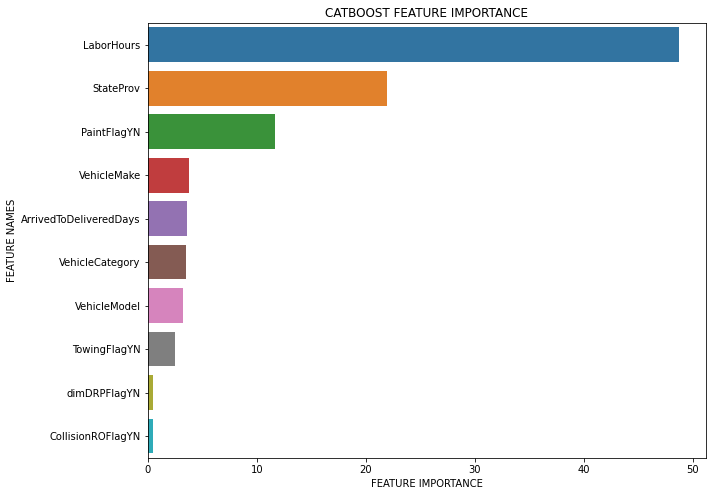

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names, model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)


    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
plot_feature_importance(model.get_feature_importance(),X_train.columns,'CATBOOST')